# 10 Years Of Kickstarter Crowdfunding - Data Exploration
**by Marie-Luise Klaus**

# Table of contents
1. [Introduction](#introduction)
2. [Preliminary Wrangling](#preliminarywrangling)
3. [Utilities](#utilities)
4. [Descriptive Statistics](#descriptivestatistics)
5. [Univariate Exploration](#univariateexploration)
6. [Bivariate Exploration](#bivariateexploration)
7. [Multivariate Exploration](#multivariateexploration)

# Introduction <a name="introduction"></a>

**Crowdfunding on Kickstarter**  
  
This notebook is dedicated to exploratory data analysis of the 10th anniversary of the crowdfunding platform Kickstarter. Crowdfunding is a rather new form of finance to fund project or ventures. On Internet platforms, typically small amounts of money are being raised by a large number of people. Kickstarter is one of the most popular crowdfunding websites in the Western world, which was launched in April 2009 in the USA. While there are many different platforms, they may fundamentally differ from their focus, audience and services. Kickstarter’s focus is mainly creative: According to their website _**“Kickstarter helps artists, musicians, filmmakers, designers, and other creators find the resources and support they need to make their ideas a reality.”**_

Project _**creators**_ choose a _**deadline**_ and a funding _**goal**_ and present their project on the platform to gather money from the public. People who back the project (_**backers**_) by _**pledging**_ money are assured tangible rewards, depending on the amount. Unlike other opportunities of investment, Kickstarter does not allow to distribute shares of a venture to supporters; nor do they claim any ownership over the projects. If the goal is not met, the funds will not be distributed. While Kickstarter is mainly open for project creators in the USA, Canada, UK, Australia, New Zealand, Mexico and parts of the EU, project support is allowed by people from all around the world. 

https://www.kickstarter.com/

**Kickstarter Data**  
 The Kickstarter data set was gathered in April 2019 from an automated web scraping service: web robots. They have been publishing monthly project data of all ongoing and completed Kickstarter projects and released it to the public. Due to a lack of documentation provided by the source, I interpreted the data to the best of my belief. Insofar, I cannot guarantee for validity and completeness of the data and take no liability for misinterpretation of the results due to a lack of documentation. On the positive side,  I did not encounter any inconsistencies during the wrangling and analysis processes and when collating data with Kickstarter’s project archive. Please refer to the data wrangling Jupyter Notebook to gain more information on the wrangling process. 

https://webrobots.io/kickstarter-datasets/


Throughout the course of this notebook I will have these two questions in mind. Based on the aforementioned data:

- How did the crowdfunding activities on Kickstarter develop over the past 10 years?
- What are predictors for successful project fundings?

To get started, let's import our libraries and set plots to be embedded inline.

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# uncomment the below settings to avoid collapsing of dataframes
from IPython.display import Markdown
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format # display execution times
sns.set_style("whitegrid")

# Preliminary Wrangling <a name="preliminarywrangling"></a>
To begin, I import my data from several files and combine them into a single data frame. Subsequently, I assess the dataset to clean it from remaining issues.

In [189]:
# read in 5 files and concatinate the data into a single data frame
file_name =  './data/kickstarter_master{}.csv'
master_df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1,5)])
master_df.reset_index(drop=True, inplace=True)

## Assessing and Cleaning the Data

In [190]:
# show amount of rows and features
master_df.shape

(182823, 32)

In [191]:
# inspect features, null values and data types
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182823 entries, 0 to 182822
Data columns (total 32 columns):
project_id                 182823 non-null int64
project_name               182823 non-null object
url                        182823 non-null object
blurb                      182823 non-null object
category                   182823 non-null object
subcategory                182823 non-null object
image                      182823 non-null object
slug                       182823 non-null object
created_at                 182823 non-null object
launched_at                182823 non-null object
deadline                   182823 non-null object
state_changed_at           182823 non-null object
last_update_at             182823 non-null object
status                     182823 non-null object
creator_id                 182823 non-null int64
creator_name               182822 non-null object
country                    182814 non-null object
city                       182823 non-nul

In [192]:
# inspect 10 examples of the data in the dataset
master_df.sample(10)

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,deadline,state_changed_at,last_update_at,status,creator_id,creator_name,country,city,state,displ_loc,loc_type,backers_count,featured,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
81077,2513540,Wedding Afro By Huguette Zola (Canceled),https://www.kickstarter.com/projects/1627209882/wedding-afro-by-huguette-zola,Je suis une jeune créatrice de mode.\nJ'ai le projet de créer une boutique de vêtement dédiée au mariage Afro.,Fashion,Couture,https://ksr-ugc.imgix.net/assets/012/451/155/b4fa11a402c7dad2b0722bfe6d3ffe09_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463761749&auto=format&frame=1&q=92&s=66b22d03d382a5f81373aa6ba3f2facf,wedding-afro-by-huguette-zola,2016-05-13 08:35:46,2016-05-18 07:39:14,2016-06-17 07:39:14,2016-05-23 19:51:33,2016-05-13 08:35:46,canceled,1627209882,Huguette Zola,FR,Paris,Ile-de-France,"Paris, France",Town,0,no support,EUR,"20,000.0","22,632.00000048161","22,508.00000099665",0.0,0.0,0.0,0.8837044892,0.8885729518000001
21172,3440469,ZINE: THE DE BROIZE CUSTOM DRUMS JOURNEY,https://www.kickstarter.com/projects/1520875105/zine-the-de-broize-custom-drums-journey,"A 12 page Zine filled with articles, reviews and stories all related with the De Broize Custom Drums journey.",Publishing,Zines,https://ksr-ugc.imgix.net/assets/022/120/727/60857698dbf96a0d656496b10eedab8b_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1533325538&auto=format&frame=1&q=92&s=6231d1af97daeeef24fa4bbb3170b58d,zine-the-de-broize-custom-drums-journey,2018-08-03 17:26:24,2018-08-12 19:28:02,2018-09-11 19:28:02,2018-09-11 19:28:03,2018-08-03 17:26:24,successful,1520875105,De Broize Custom Drums,GB,London,England,"London, UK",Town,17,spotlight,GBP,150.0,189.81269219630462,194.9184892532024,201.0,254.34900754304817,261.1907755992912,0.7902527395000001,0.7695524451000001
162439,634332,Frame by Frame,https://www.kickstarter.com/projects/framebyframe/frame-by-frame,A documentary exploring Afghanistan's recent revolution of photography through four local photojournalists.,Journalism,Photo,https://ksr-ugc.imgix.net/assets/011/550/915/49928b3dfa8430bce9d36aed9d03c4ed_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463684342&auto=format&frame=1&q=92&s=d6ec03ca3d40207acb0a0023ecdc268b,frame-by-frame,2013-07-16 16:15:30,2013-07-29 21:44:09,2013-08-28 21:44:09,2013-08-28 21:44:10,2018-04-01 23:33:08,successful,222592309,Alexandria Bombach & Mo Scarpelli,AF,Kabul,Kabul,"Kabul, Afghanistan",Town,1251,spotlight,USD,"40,000.0","40,000.0","40,000.0","70,301.35","70,301.35","70,301.35",1.0,1.0
29482,3353662,Silvertech 2.0 - The World's Most Advanced Underwear,https://www.kickstarter.com/projects/organicbasics/silvertech-20-comfortable-and-anti-microbial-under,"This Tech-Advanced Underwear is Durable, Comfortable, Odor-Killing, Affordable & Made from 100% Sustainable Materials.",Fashion,Apparel,https://ksr-ugc.imgix.net/assets/020/822/693/e8437795c633869eb2ec8c3683a0181b_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1524673620&auto=format&frame=1&q=92&s=4aa6e446b7c0a2ce3e8c0d0cb58edebc,silvertech-20-comfortable-and-anti-microbial-under,2018-04-09 07:37:51,2018-05-01 14:00:00,2018-06-02 05:59:00,2018-06-02 05:59:01,2018-06-02 07:11:50,successful,1298269302,Organic Basics,DK,Copenhagen,Hovedstaden,"Copenhagen, Denmark",Town,1197,full support,USD,"30,000.0","30,000.0","30,000.0","155,589.0","155,589.0","155,589.0",1.0,1.0
5752,3675111,Opaque Magazine: A Voice for Everyone,https://www.kickstarter.com/projects/pemmstephens/opaque-magazine-a-voice-for-everyone,Opaque Magazine is an online platform to give a voice to under privileged communities and minority groups.,Journalism,Web,https://ksr-ugc.imgix.net/assets/024/181/192/84b40f1fed4ce4a3388bbd5791724135_original.png?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=

**Null values**  
Notice one observation with an empty creator name. It shouldn't cause any problems in the analysis. Also missing states won't bother, since there are locations like New Zealand or Antarctica, where states as organisational territories don't exist.

However, there are empty values in _country_ of some observations. The assessment shows, the country Namibia, short "NA" was interpreted as a null value after we read in our csv files. Let's correct that. 

In [193]:
# there is one project without the name of creator
master_df[master_df.creator_name.isna()]

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,deadline,state_changed_at,last_update_at,status,creator_id,creator_name,country,city,state,displ_loc,loc_type,backers_count,featured,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
93242,2298709,Cannabis Colouring Book,https://www.kickstarter.com/projects/498969171/cannabis-colouring-book,"A Cannabis Colouring Book, 20 black and white prints by a Fine Artist",Art,Conceptual Art,https://ksr-ugc.imgix.net/assets/012/342/732/d13264538144cbd88347a1b50579e6e4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463756060&auto=format&frame=1&q=92&s=34c74564f1ce4b2795e93c1644d68674,cannabis-colouring-book,2015-12-31 05:21:47,2015-12-31 18:31:24,2016-01-30 18:31:24,2016-01-30 18:31:24,2015-12-31 05:21:47,failed,498969171,NaN,US,Chicago,IL,"Chicago, IL",Town,1,no support,USD,"2,500.0","2,500.0","2,500.0",4.2,4.2,4.2,1.0,1.0


In [194]:
# assess null values in state
master_df[master_df.state.isna()][['state','country', 'displ_loc', 'city']].sample(5)

,state,country,displ_loc,city
109079,NaN,AQ,Antarctica,Antarctica
110244,NaN,KI,"Bairiki, Kiribati",Bairiki
136162,NaN,AQ,Antarctica,Antarctica
123383,NaN,NZ,"Taihape, NZ",Taihape
46170,NaN,VA,"Vatican City, Vatican City",Vatican City


In [195]:
# several projects with missing country, which should be Namibia instead of NaN
master_df[master_df.country.isna()][['country', 'displ_loc']]

,country,displ_loc
11996,NaN,"Windhoek, Namibia"
35813,NaN,"Walvis Bay, Namibia"
54174,NaN,"Windhoek, Namibia"
70164,NaN,"Windhoek, Namibia"
81780,NaN,"Tsumkwe, Namibia"
96734,NaN,"Rundu, Namibia"
96796,NaN,"Okahandja, Namibia"
101341,NaN,"Windhoek, Namibia"
181774,NaN,"Walvis Bay, Namibia"


In [196]:
# replace NaN by "NA"
master_df.country.fillna("NA", inplace=True)

# test
master_df[master_df.country.isna()][['country', 'displ_loc']]

,country,displ_loc


In [197]:
# duplicates
master_df.duplicated().sum()

0

**Outliers**  

The descriptive statistics below reveal an extreme range of values for the number backers, project goals and the actual amount pledged. For example, the amount pledged varies between USD 0.00 to more than USD 81 mi. (converted to USD in their historic exchange rate). For my further analysis, I will need to pay extra attention to outliers and extreme values.

In [198]:
# show descriptive statistics of each numeric variable
master_df.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
count,"182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0"
mean,"2,134,008.0534013775","1,074,355,687.692052",133.19608036188006,"53,045.47494396218","43,610.41674456528","44,479.11088315567","15,576.358262472442","11,431.22118834541","11,564.410448010885",1.4719871868840078,1.4551578997548096
std,"1,067,350.4118824806","620,008,225.0301064",872.1391095687884,"1,253,273.100861694","1,140,903.3662680425","1,171,775.8831360221","276,843.9582965485","83,372.50657122987","83,809.367465106",4.538616102670615,4.643109675852995
min,19.0,3.0,0.0,0.01,0.01,0.01,0.0,0.0,0.0,0.7902527395000001,0.5826048629999999
25%,"1,316,340.0","537,632,655.5",3.0,"1,500.0","1,500.0","1,500.0",72.0,69.05895276617348,70.0,1.0,1.0
50%,"2,256,628.0","1,073,325,885.0",23.0,"5,000.0","5,000.0","5,000.0","1,252.0","1,218.0","1,243.026457903441",1.0,1.0
75%,"3,087,906.5","1,611,913,230.5",80.0,"15,000.0","13,579.200000288965","14,219.6926569536","6,061.145","5,755.0","5,853.187935164977",1.0,1.0
max,"3,713,426.0","2,147,483,434.0","105,857.0","100,000,000.0","126,541,794.79753642","150,099,318.94817606","81,030,744.0","10,441,174.430000003","10,441,174.430000003",107.4938140686,113.9401218152


**Time Variables and Project Duration**  

There are several time-related features to be converted to pandas date time format for analysis. 

The funding period of is one of the features a creator has to decide on before launching a project. I suppose it may affect the success of the campaign. I add the duration as a new feature as the difference of the time a project was launched from it's deadline.

In [199]:
# convert time data to date time format
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']] = master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']].apply(pd.to_datetime)

In [200]:
# engineer variable to asses funding duration
master_df['duration'] = master_df['deadline'] - master_df['launched_at']
master_df[['launched_at', 'deadline', 'duration']].sample(5)

,launched_at,deadline,duration
42612,2017-10-24 05:22:29,2017-11-23 15:36:00,30 days 10:13:31
75124,2016-08-05 20:08:50,2016-09-04 20:08:50,30 days 00:00:00
171448,2012-09-05 21:34:46,2012-10-05 21:34:46,30 days 00:00:00
9492,2019-01-10 04:38:34,2019-02-09 04:38:34,30 days 00:00:00
90854,2016-01-30 01:47:10,2016-03-15 00:47:10,44 days 23:00:00


In [201]:
# convert duration time delta to float of days
master_df['duration_days'] = (master_df['duration'].astype('timedelta64[h]') / 24)

In [202]:
# the first project ever launched
first_project = master_df.sort_values(by='launched_at', ascending=True).iloc[0, :]
first_project[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        New York Makes a Book!!                                                                                                                             
blurb               Let's make the world's first crowd-funded book! \r\n\r\nNew York Makes a Book will be entirely composed of submissions from 100 participants. 100...
url                 https://www.kickstarter.com/projects/nymab/new-york-makes-a-book                                                                                    
launched_at         2009-04-28 11:55:41                                                                                                                                 
deadline            2009-05-16 09:59:00                                                                                                                                 
duration            17 days 22:03:19                                                                                                                       

In [203]:
# the latest launched project
latest_project = master_df.sort_values(by='launched_at', ascending=False).iloc[0, :]
latest_project[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        Pobasso and the Cucumbers - Historical Musical for Schools                                                                           
blurb               School Musical, set 300 years ago, focusing on the cultural and relationship between the Aboriginal people and the Macassan Fishermen
url                 https://www.kickstarter.com/projects/pobasso/pobasso-and-the-cucumbers-historical-musical-for-s                                      
launched_at         2019-04-18 04:49:38                                                                                                                  
deadline            2019-06-02 04:49:38                                                                                                                  
duration            45 days 00:00:00                                                                                                                     
goal_hist_usd      2,406.722637170395                                       

The first project on Kickstarter was launched 04/28/2009 and the latest project in my data set was launched by 04/18/2019. We got almost 10 years of Kickstarter data to analyse ahead.

**Categories**  
There are project categories and subcategories in our dataset. A subcategory may have different parent categories. For example subcategory "Web" may be of category "Technology" or "Journalism". In order to be explicit about categories, I create combined categories for each project.

In [204]:
# show example of subcategory with multiple parent categories
master_df[master_df.subcategory == 'Web'][['category', 'subcategory']].sample(5)

,category,subcategory
111576,Technology,Web
101916,Journalism,Web
25039,Technology,Web
78988,Journalism,Web
72801,Technology,Web


In [205]:
# create combined category
master_df['comb_cat'] = master_df['category'] + "/" + master_df['subcategory']
master_df[['category', 'subcategory','comb_cat']].sample(5)

,category,subcategory,comb_cat
15002,Film & Video,Television,Film & Video/Television
114304,Technology,Software,Technology/Software
87318,Design,Architecture,Design/Architecture
90680,Art,Sculpture,Art/Sculpture
106282,Technology,3D Printing,Technology/3D Printing


**Project status**  
The value counts numbers of project statuses show a relatively small amount of unfinished projects. They were either canceled or suspended. By mid April 2019, there were an additional 3,945 projects currently open for pledges. As I am mostly interested in identifying success factors of Kickstarter campaigns, I'm going to focus on completed projects only. Completed project do either have a status "successful" or "failed".

In [206]:
# show possible state of projects 
master_df.status.value_counts()

successful    95451
failed        74210
canceled      8587 
live          3945 
suspended     630  
Name: status, dtype: int64

In [207]:
# create a separate data frame for completed projects only
ks_compl = master_df.query('(status == "successful") | (status == "failed")')
ks_compl.reset_index(drop=True, inplace=True)
ks_compl.status.value_counts()

successful    95451
failed        74210
Name: status, dtype: int64

**Data types**  
There are multiple variables left that should be of categorical data type. _Featured_ refers to the level of support Kickstarter applies to a project. Thus, I interpret _featured_ as an ordered category. 


In [208]:
# convert data types to category
ks_compl.loc[:,'country'] = ks_compl['country'].astype('category')
ks_compl.loc[:,'category'] = ks_compl['category'].astype('category')
ks_compl.loc[:,'subcategory'] = ks_compl['subcategory'].astype('category')
ks_compl.loc[:,'comb_cat'] = ks_compl['comb_cat'].astype('category')
ks_compl.loc[:,'status'] = ks_compl['status'].astype('category')

# convert featured to ordered category
featured_type = pd.CategoricalDtype(categories=['no support', 'Projects We Love', 'spotlight', 'full support'], ordered=True)
ks_compl.loc[:,'featured'] = ks_compl['featured'].astype(featured_type)

# show data types
ks_compl.dtypes

project_id                 int64          
project_name               object         
url                        object         
blurb                      object         
category                   category       
subcategory                category       
image                      object         
slug                       object         
created_at                 datetime64[ns] 
launched_at                datetime64[ns] 
deadline                   datetime64[ns] 
state_changed_at           datetime64[ns] 
last_update_at             datetime64[ns] 
status                     category       
creator_id                 int64          
creator_name               object         
country                    category       
city                       object         
state                      object         
displ_loc                  object         
loc_type                   object         
backers_count              int64          
featured                   category       
currency   

In [209]:
# remove columns that are irrelevant to our analysis to keep our dataframe neat
ks_compl = ks_compl.drop(labels=['slug', 'created_at', 'last_update_at', 'state_changed_at', 'displ_loc',
                                 'goal_real', 'goal_current_usd','pledged_real', 'pledged_current_usd', 
                                 'current_fx_rate(usd)', 'hist_exchange_rate(usd)'], axis=1)
ks_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169661 entries, 0 to 169660
Data columns (total 24 columns):
project_id          169661 non-null int64
project_name        169661 non-null object
url                 169661 non-null object
blurb               169661 non-null object
category            169661 non-null category
subcategory         169661 non-null category
image               169661 non-null object
launched_at         169661 non-null datetime64[ns]
deadline            169661 non-null datetime64[ns]
status              169661 non-null category
creator_id          169661 non-null int64
creator_name        169660 non-null object
country             169661 non-null category
city                169661 non-null object
state               169615 non-null object
loc_type            169661 non-null object
backers_count       169661 non-null int64
featured            169661 non-null category
currency            169661 non-null object
goal_hist_usd       169661 non-null float64
pledg

**The structure of the dataset**  
This cleaned dataset contains information on 10 years of Kickstarter projects; from Kickstarter's launch in 04/2009 to 04/18/2019. The main focus of my analysis are completed projects: projects that were either successfully funded or failed the funding. The dataset of completed projects is composed of 169,661 rows, each of which represents a project. 

As for the features of this dataset, there are 22 variables that have been selected. We got quantitative variables like goal or pledged, several time-related variables and qualitative data, like project categories, names and project states.  

_**Featured**_ are ordered categorical values. It describes to what extend Kickstarter supports a campaign. It is sorted in ascending order from no support to full support.   
Basically, Kickstarter has two ways of support. One possibility is that a project is awarded the badge "Projects We Love", meaning a project is being picked for recommendation by staff. The badge is shown on the project's description page.   
The second possibility of support refers to a project being highlighted in some way in different sections on their landing page. According to Kickstarter's guide, they may also advertise projects in their newsletters or social media channels. However, the data set does not provide any explanation or information how a project was spotlighted exactly. Obviously, projects may also be supported in both ways.

 - _no support:_ Kickstarter does not spotlight a project on their website, nor award the _Projects We Love_ badge, 
 - _Projects We Love:_ Kickstarter awards _Projects We Love_ badge without any further spotlighting
 - _spotlight:_ Kickstarter spotlights a project in any way on their landing page without awarding a badge
 - _full support:_ Kickstarter spotlight a project on their landing page and awards the _Projects We Love_ badge

_**Currencies**_  
To allow comparison of the project's financial features, I chose to convert all currencies to USD, using their historic exchange rates of the date of the deadline of their funding period. Please refer to the wrangle notebook for further information. 

**Main feature of interest**  
The main feature that I will explore is the _status_ of a project. It depicts whether the crowdfunding was **successful or failed**.

**Supporting features**  
Undoubtedly, there are many different factors that may affect the success or failure of a crowdfunding campaign. In the course of this data set, I expect the following factors may have an influence on the project:

- the amount of the initial funding goal: _goal hist usd_
- the support provided by Kickstarter: _featured_
- the project categories: _category, subcategory, comb cat_
- the dates of the project's launch and deadline: _launched at_, _deadline_
- the duration period of a funding: _duration_
- the location of a project: _country_, _loc type_.

To answer the question of how crowdfunding developed over the past 10 years, I will additionally analyse:

- the number of backers: _backers count_
- the amount pledged: _pledged hist usd_.


# Utilities <a name="utilities"></a>

In this section, I set up commonly used variables and functions that come in handy for my analysis. 

In [210]:
# Create separate data frames for successful and failed projects
ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_failed = ks_compl[ks_compl.status == "failed"]

In [211]:
# create dataframes containing yearly project counts
ks_year_count = ks_compl.copy()
ks_year_count = ks_year_count.groupby([ks_year_count.deadline.dt.year]).project_id.count()
ks_year_count = ks_year_count.reset_index(name='count_year')

# create dataframe containing monthly project counts
ks_month_count = ks_compl.copy()
ks_month_count = ks_month_count.groupby([ks_month_count.deadline.dt.month]).project_id.count()
ks_month_count = ks_month_count.reset_index(name='count_month')
ks_month_count.head()

# create dataframe containing monthly project counts each year
monthly_count = ks_compl.copy()
monthly_count = monthly_count.groupby([monthly_count.deadline.dt.year, 
                                      monthly_count.deadline.dt.month])\
                                      .project_id.count().values
ks_monthly_counts = pd.DataFrame({'date':np.arange('2009-05', '2019-05', dtype='datetime64[M]'), 
                                  'count_monthly': monthly_count})

ks_monthly_counts.sample(5)

,date,count_monthly
113,2018-10-01,2585
58,2014-03-01,1008
0,2009-05-01,2
15,2010-08-01,106
87,2016-08-01,2028


In [212]:
# set commonly used colors used during plotting 
cust_green = '#66cdaa'
cust_red = '#f08080'
cust_blue = '#43a2ca'
status_colors = [cust_blue, cust_green, cust_red]
cust_purple = sns.color_palette("Pastel1")[3]
cust_blues = sns.color_palette("Blues_r")[3]
feat_color = sns.color_palette("Set1")
fill_red = '#fee0d2'
fill_green = '#e0f3db'
goal_color =  sns.color_palette("Blues_r")[0]
pledged_color = "#c994c7"
backers_color = '#a6611a'
category_colors = ['#a6cee3','#e5c494', '#1f78b4', '#33a02c', '#fb9a99', '#b3b3b3', '#e31a1c','#fdbf6f', 
                   '#ff7f00', '#cab2d6', '#6a3d9a', '#b2df8a', '#984ea3', '#ffd92f', '#b15928']

In [213]:
# to improve readability of large numbers 
def format_num(num):
    num = round(float(num))
    formatted_num = str(num)
    str_length = len(formatted_num)
    cursor = str_length % 3
    if str_length > 3 and cursor > 0:
        formatted_num = formatted_num[0:cursor] + "," + formatted_num[cursor:] 
        cursor += 1
        str_length = str_length - cursor
    while str_length > 3:
        formatted_num = formatted_num[0:cursor+3] + "," + formatted_num[cursor+3:]
        cursor += 4
        str_length -= 3
    return formatted_num

In [214]:
# log transformation
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [215]:
# create timeline x-ticks
def timeline_ticks(df):    
    x_labels = np.arange('2009-05', '2019-05', 7, dtype='datetime64[M]')
    x_ticks = np.arange(0,len(df), 7)
    plt.xticks(x_ticks,x_labels, rotation=45, ha='right')
    plt.xlabel("")

In [216]:
# frequently used variables 
dates = np.arange('2009-05', '2019-05', dtype='datetime64[M]')
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September","October", "November", "December"]


# Descriptive Statistics <a name="descriptivestatistics"></a>
Let's start by computing descriptive statistics of the Kickstarter features.

**How many projects were completed by Kickstarter's 10th anniversary?**

In [217]:
n_compl_projects = ks_compl.project_id.nunique()
format_num(n_compl_projects)

'169,661'

**How many creators contributed by Kickstarter's 10th anniversary?**

In [218]:
creators_unique = ks_compl.creator_id.nunique()
format_num(creators_unique)

'147,269'

**What are the descriptive statistics of the numeric supporting features?**

In [219]:
# descriptive statistics of numeric values
ks_compl[['backers_count', 'goal_hist_usd', 'pledged_hist_usd', 'duration']].describe()

,backers_count,goal_hist_usd,pledged_hist_usd,duration
count,"169,661.0","169,661.0","169,661.0",169661
mean,139.4416453987658,"40,906.12771538828","12,072.580720515753",32 days 15:20:33.490142
std,878.2222230108724,"1,106,030.4164593664","82,701.06921244746",11 days 17:34:03.030301
min,0.0,0.01,0.0,1 days 00:00:00
25%,3.0,"1,500.0",100.0,29 days 23:00:00
50%,26.0,"5,000.0","1,471.0",30 days 00:00:00
75%,85.0,"13,193.87635772584","6,256.0",34 days 02:04:05
max,"105,857.0","150,099,318.94817606","8,596,474.58",93 days 02:32:04


In [220]:
print("USD", format_num(ks_compl_success['pledged_hist_usd'].sum()), " of funding was successfully collected.")
print("Independed from a project's success, USD", format_num(master_df['pledged_hist_usd'].sum()), " of funding was collected within 10 years.")

USD 1,966,961,619  of funding was successfully collected.
Independed from a project's success, USD 2,114,240,211  of funding was collected within 10 years.


**How many backers supported completed projects by Kickstarter's 10th anniversary?**

In [221]:
backers_sum = ks_compl.backers_count.sum()
format_num(backers_sum)

'23,657,809'

**What are the chances to complete projects successfully?**   
First, assess the success probabilities of all campaigns. Second, calculate the success probabilities for completed projects only. 

In [222]:
# calculate total counts of each status from the master data set
n_success = len(master_df[master_df.status == "successful"])
n_failed = len(master_df[master_df.status == "failed"])
n_live = len(master_df[master_df.status == "live"])
n_canceled = len(master_df[master_df.status == "canceled"])
n_suspended = len(master_df[master_df.status == "suspended"])
n_not_live = len(master_df[master_df.status != "live"])

print(format_num(n_success), "projects were successfully funded.")

95,451 projects were successfully funded.


In [223]:
# status probability of all projects that are currently not live
p_success = n_success / n_not_live
p_failed = n_failed / n_not_live
p_canceled = n_canceled / n_not_live
p_suspended = n_suspended / n_not_live
print("Currently open for pledges: {} projects.".format(format_num(n_live)))
print("Successful projects: {}%.".format(round(p_success*100,2)))
print("Failed projects: {}%.".format(round(p_failed*100, 2)))
print("Canceled projects: {}%.".format(round(p_canceled*100, 2))) 
print("Suspended projects: {}%.".format(round(p_suspended*100, 2))) 

Currently open for pledges: 3,945 projects.
Successful projects: 53.36%.
Failed projects: 41.49%.
Canceled projects: 4.8%.
Suspended projects: 0.35%.


In [224]:
# status probability of ordinarily completed projects
n_compl_success = len(ks_compl[ks_compl.status == "successful"])
n_compl_fail = len(ks_compl[ks_compl.status == "failed"])
p_compl_success = n_compl_success / n_compl_projects
p_compl_fail = n_compl_fail / n_compl_projects
print("Success: {}%.".format(round(p_compl_success*100,2)))
print("Failed: {}%.".format(round(p_compl_fail*100, 2)))

Success: 56.26%.
Failed: 43.74%.


**How many projects do creators usually run?**

In [225]:
# number of unique project creators
n_compl_creators_unique = ks_compl.creator_id.nunique()
format_num(n_compl_creators_unique)

'147,269'

In [226]:
# project counts per user
power_users = (ks_compl['creator_id'].value_counts()
        .reset_index()
        .rename(index=str, columns={"creator_id": "project_count"})['project_count']
        .value_counts()
        .reset_index()
        .rename(index=str, columns={"index": "project_count", "project_count": "creator_count"})
        .sort_values(by='project_count', ascending=False))

print(f"Proportion of users with 1 project: {round(power_users['creator_count'].values[-1] / n_compl_creators_unique,2)*100}%")
print(f"Proportion of users with 2 project: {round(power_users['creator_count'].values[-2] / n_compl_creators_unique,2)*100}%")
power_users

Proportion of users with 1 project: 91.0%
Proportion of users with 2 project: 6.0%


,project_count,creator_count
35,70,1
32,58,1
26,52,1
27,36,1
28,34,1
29,33,1
25,32,1
31,31,1
24,30,2
23,27,2


In [227]:
# What kind of projects do the most active user most active user launch?
creators_ordered = ks_compl.creator_id.value_counts().index
print(f"username: {ks_compl[ks_compl.creator_id == creators_ordered[0]]['creator_name'].iloc[0]}\n")
ks_compl[ks_compl.creator_id == creators_ordered[0]]

username: Collectable Playing Cards



,project_id,project_name,url,blurb,category,subcategory,image,launched_at,deadline,status,creator_id,creator_name,country,city,state,loc_type,backers_count,featured,currency,goal_hist_usd,pledged_hist_usd,duration,duration_days,comb_cat
7690,3504998,Bicycle Stained Glass Leviathan Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-stained-glass-leviathan-playing-cards,The Leviathan Sea Monster takes form as the 3rd edition in the Stained Glass Series.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/023/106/899/546300f9aaa4639b67d4f1c1fdf613c4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1541093879&auto=format&frame=1&q=92&s=1b23fe9f9f96f9682cc5cbe6b6d432e7,2018-11-26 19:35:05,2018-12-26 19:35:05,successful,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,634,spotlight,USD,"4,000.0","13,687.0",30 days 00:00:00,30.0,Games/Playing Cards
11684,3372265,BICYCLE MARBLE Playing Cards by Max,https://www.kickstarter.com/projects/2104052526/bicycle-marble-playing-cards-by-max,The NEW GENERATION of the TEXTURE SERIES by Max (Max Playing Cards),Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/478/957/e96e0d3d393a63dacfd7e344d129c6ef_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1528219862&auto=format&frame=1&q=92&s=6209fd92d37889a1b6fa54e1c2b2d4c3,2018-10-10 15:09:57,2018-11-09 16:09:57,failed,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,305,no support,USD,"13,000.0","10,612.0",30 days 01:00:00,30.041666666666668,Games/Playing Cards
13023,3460006,Bicycle Limited Edition Bald Eagle Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-bald-eagle-playing-cards,"The emblem bird of the United States The Bald Eagle, is now a limited edition Bicycle playing card deck. Only 1100 decks will printed.",Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/396/885/5ff1a0277e1888ba564c60ced85a6e79_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1535652459&auto=format&frame=1&q=92&s=2d6e0c095b7076b751b578a6e9c6a2b5,2018-09-25 18:01:14,2018-10-25 18:01:14,successful,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,111,spotlight,USD,"3,000.0","3,523.0",30 days 00:00:00,30.0,Games/Playing Cards
15224,3455599,Bicycle Explostar Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-cardistry-explostar-playing-cards,Collectable Playing Cards first Cardistry deck is ready and set to explode onto the scene!,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/434/593/3614340c9b7ee19263c6e965308a0a49_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1536003495&auto=format&frame=1&q=92&s=26a8eb63300ff6bfade972d51951e06a,2018-08-30 16:18:25,2018-09-29 16:18:25,successful,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,205,spotlight,USD,"4,000.0","4,755.0",30 days 00:00:00,30.0,Games/Playing Cards
16640,3427450,Bicycle Limited Edition Gyrfalcon Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-gyrfalcon-playing-cards,The largest falcon in the world now a limited edition Bicycle playing cards deck. Only 1100 decks will be printed.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/929/296/8d2e381918b619c18c29c95aa4b644fd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1533147729&auto=format&frame=1&q=92&s=70452f0ae9587e62d6e39ad6ca6452b3,2018-08-10 16:07:32,2018-09-09 16:07:32,successful,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,325,spotlight,USD,"2,500.0","9,533.0",30 days 00:00:00,30.0,Games/Playing Cards
21416,3393416,Bicycle Antiques Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-antiques-playing-cards,Travel back in time with the Bicycle Antiques Deck,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/410/331/381c47b3818858487e85c739bf52bce6_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1527704269&auto=format&frame=1&q=92&s=abf9a7ec8eb63b29cc414553a2bea5d9,2018-0

While the majority of users launched one project, the user with the name "Collectable Playing Cards" stands out. With 70 launched projects to finance bicycle-themed playing cards, they launched are the top of creators with the highest number of projects. 

**What are the projects with the highest goals?**  

In [228]:
# highest goal
highest_goal =  ks_compl.sort_values('goal_hist_usd')['goal_hist_usd'].index[-1]
# highest successful goal
highest_goal_s =  ks_compl_success.sort_values('goal_hist_usd')['goal_hist_usd'].index[-1]
# show
ks_compl.iloc[[highest_goal, highest_goal_s ]]

,project_id,project_name,url,blurb,category,subcategory,image,launched_at,deadline,status,creator_id,creator_name,country,city,state,loc_type,backers_count,featured,currency,goal_hist_usd,pledged_hist_usd,duration,duration_days,comb_cat
87802,2200338,A Celtic Lovestory,https://www.kickstarter.com/projects/245190432/a-celtic-lovestory,"A 2000 year old ""Romeo & Juliet"" love story, set amidst the dramatic changes that ripped through Celtic Britain when Rome invaded...",Film & Video,Drama,https://ksr-ugc.imgix.net/assets/012/292/886/67f8879c113e174e1f41465297cdd035_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463752126&auto=format&frame=1&q=92&s=de2553e2d761e5821f69e8612f6e34c1,2015-11-16 23:47:15,2015-11-30 22:01:00,failed,245190432,Joe,GB,Dorset,England,County,0,no support,GBP,"150,099,318.94817606",0.0,13 days 22:13:45,13.916666666666666,Film & Video/Drama
88429,2193016,Bring Back MYSTERY SCIENCE THEATER 3000,https://www.kickstarter.com/projects/mst3k/bringbackmst3k,"Almost there! MYSTERY SCIENCE THEATER 3000 will return... and if we can get to $5.9MM, we'll get THIRTEEN new episodes of MST3K!",Film & Video,Television,https://ksr-ugc.imgix.net/assets/012/289/124/ae6179e0455878652460b3f70d7550d0_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463751640&auto=format&frame=1&q=92&s=4ae4a3ae1624e155a466d650a2865b6d,2015-11-10 15:49:32,2015-12-12 06:00:00,successful,1587892087,Joel Hodgson,US,Minneapolis,MN,Town,48270,full support,USD,"2,000,000.0","5,764,229.38",31 days 14:10:28,31.583333333333332,Film & Video/Television


About USD 150 mi. was the highest funding ever asked for, which failed miserably in November 2015 with not one single backer. However, the highest funding goal ever accomplished was for another Video project: USD 2 mi. was successfully raised for the TV show "Bring Back MYSTERY SCIENCE THEATER 3000". By the end of the funding they collected USD 5.76 mi. from their 48,270 supporters in December 2015.

**What is the project with the highest amount ever pledged?**

In [229]:
highest_pledge =  ks_compl.sort_values('pledged_hist_usd')['pledged_hist_usd'].index[-1]
ks_compl.iloc[[highest_pledge]]

,project_id,project_name,url,blurb,category,subcategory,image,launched_at,deadline,status,creator_id,creator_name,country,city,state,loc_type,backers_count,featured,currency,goal_hist_usd,pledged_hist_usd,duration,duration_days,comb_cat
160085,188241,OUYA: A New Kind of Video Game Console,https://www.kickstarter.com/projects/ouya/ouya-a-new-kind-of-video-game-console,"Cracking open the last closed platform: the TV. A beautiful, affordable console -- built on Android, by the creator of Jambox.",Games,Gaming Hardware,https://ksr-ugc.imgix.net/assets/011/364/958/aa5f379413c838d66ce78eee5fae97ce_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463681578&auto=format&frame=1&q=92&s=fb71263f2a26e5e7848f4f3705916b55,2012-07-10 12:44:41,2012-08-09 05:00:00,successful,33844207,OUYA,US,Los Angeles,CA,Town,63416,full support,USD,"950,000.0","8,596,474.58",29 days 16:15:19,29.666666666666668,Games/Gaming Hardware


The project of the highest amount of funding collected is OUYA, a gaming console. By beginning of September 2012, they successfully pledged almost USD 8.6mi at an initial funding goal of 950tsd.

**What are the projects with the highest number of backers?**

In [230]:
most_backers =  ks_compl.sort_values('backers_count')['backers_count'].index[-1]
ks_compl.iloc[[most_backers]]

,project_id,project_name,url,blurb,category,subcategory,image,launched_at,deadline,status,creator_id,creator_name,country,city,state,loc_type,backers_count,featured,currency,goal_hist_usd,pledged_hist_usd,duration,duration_days,comb_cat
139199,988854,"Bring Reading Rainbow Back for Every Child, Everywhere!",https://www.kickstarter.com/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh,Bring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!,Technology,Web,https://ksr-ugc.imgix.net/assets/011/690/614/fcbacbc0924942075477a04a01adb20a_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463686848&auto=format&frame=1&q=92&s=6444b56320bf2b9978d7a5139811b516,2014-05-28 13:05:45,2014-07-02 19:00:00,successful,1038554387,LeVar Burton & Reading Rainbow,US,Los Angeles,CA,Town,105857,full support,USD,"1,000,000.0","5,408,916.95",35 days 05:54:15,35.208333333333336,Technology/Web


In July 2014 the project "Bring Reading Rainbow Back for Every Child, Everywhere!", a web tech project, won {{format_num(most_backers)}} supporters. While they initially asked for USD 1mi., they got 5.4 mi. by the end of their campaign.

**Where are Kickstarter projects being launched?** 

In [231]:
# globally
ks_compl.country.value_counts()

US    118813
GB    17446 
CA    7488  
AU    3686  
DE    2586  
FR    2112  
IT    1930  
MX    1886  
ES    1535  
NL    1354  
SE    1074  
NZ    783   
DK    712   
HK    689   
JP    554   
CH    519   
IE    505   
SG    469   
BE    398   
NO    393   
AT    381   
CN    271   
IN    173   
PL    134   
KR    133   
PR    124   
TH    122   
UA    121   
IL    109   
CO    106   
BR    102   
ZA    100   
RU    91    
CZ    90    
GR    88    
TW    84    
ID    83    
PE    79    
KE    75    
AR    74    
TR    64    
PH    60    
HU    60    
IS    58    
GH    55    
SI    53    
RO    50    
CR    49    
NP    49    
VN    48    
EC    47    
PT    47    
FI    46    
LT    45    
BG    44    
RS    43    
LU    43    
CL    43    
UG    41    
GT    41    
CU    38    
KH    33    
BA    29    
HT    29    
EG    29    
MY    28    
NI    28    
AE    27    
MA    26    
LV    26    
EE    26    
TZ    26    
AF    24    
NG    23    
BO    22    
HR    22    
SN    21    

In [232]:
# proportion of project countries - top 3 
for i in range(3):
    print(ks_compl.country.value_counts().index[i],  ks_compl.country.value_counts().values[i] / n_compl_projects)

US 0.7002964735560913
GB 0.10282858170115701
CA 0.044135069344162774


In [233]:
# states of the USA
ks_usa_compl = ks_compl[ks_compl.country == "US"]
ks_usa_compl.state.value_counts()

CA    22284
NY    14035
TX    7027 
FL    5808 
IL    4591 
WA    3989 
PA    3838 
MA    3426 
GA    3152 
OH    3141 
OR    3040 
CO    2843 
MI    2755 
NC    2728 
TN    2443 
VA    2354 
MN    2232 
AZ    2228 
UT    1949 
NJ    1914 
MO    1837 
MD    1689 
NV    1612 
WI    1558 
IN    1413 
DC    1259 
CT    1072 
LA    1061 
SC    944  
KY    882  
OK    820  
AL    761  
NM    717  
IA    635  
ME    622  
ID    584  
KS    569  
HI    541  
VT    530  
NH    503  
AR    493  
RI    452  
MT    437  
NE    389  
AK    340  
MS    329  
WV    288  
DE    260  
SD    153  
WY    143  
ND    143  
Name: state, dtype: int64

In [234]:
# proportion of project US federal states - top 3 
for i in range(3):
    print(ks_usa_compl.state.value_counts().index[i],  ks_compl.state.value_counts().values[i] / n_compl_projects)

CA 0.13134426886556133
NY 0.09120540371682355
TX 0.08272378448789056


In [235]:
ks_compl.country.nunique()

195

In [236]:
# evalutate location type
ks_compl.loc_type.value_counts()

Town             157326
County           6396  
Suburb           4308  
LocalAdmin       979   
Zip              407   
Island           209   
Country          17    
Miscellaneous    15    
Estate           4     
Name: loc_type, dtype: int64

In [237]:
# proportion most common location type
ks_compl.loc_type.value_counts().values[0] / n_compl_projects

0.9272961965330866

We find projects from 195 countries from all around the world. With 70% by far the most projects were launched in the USA. To be more specific, 13% of all completed US projects come from California and 9% from New York state. Globally, Great Britain follows the US with 10% of projects and Canada is at the third position with 4.4 % of all projects. The data is not only heavily biased towards US projects but also towards location type. Towns make up for 93% of location types. As the overall majority of projects is happening in US towns and there are not sufficient projects in other locations, I decided to not further investigate location as a predictor for this analysis.

**What are common project categories?**  

In [238]:
# values categories
ks_compl.category.value_counts()

Music           24600
Film & Video    23985
Art             18093
Technology      17846
Publishing      17087
Food            13407
Games           10775
Fashion         8929 
Comics          6438 
Design          5882 
Photography     5721 
Crafts          5480 
Theater         4725 
Journalism      3686 
Dance           3007 
Name: category, dtype: int64

In [239]:
# category count
ks_compl.category.nunique()

15

In [240]:
# values subcategories
ks_compl.subcategory.value_counts()

Web                   3599
Comedy                2561
Public Art            2382
Classical Music       2378
Mobile Games          2377
Webseries             2376
Hardware              2376
Indie Rock            2375
Mixed Media           2373
Rock                  2373
Hip-Hop               2372
Restaurants           2371
Animation             2370
Art Books             2368
Pop                   2367
Drinks                2367
Painting              2366
Country & Folk        2365
Software              2364
Narrative Film        2361
Shorts                2348
Gadgets               2346
Playing Cards         2344
Nonfiction            2342
Fiction               2330
Drama                 2325
Children's Books      2319
Documentary           2310
Apps                  2305
Illustration          2303
Comic Books           2298
Apparel               2291
Graphic Novels        2289
Accessories           2281
Video Games           2257
World Music           2104
Electronic Music      2097
P

In [241]:
# subcategory count
ks_compl.subcategory.nunique()

159

In [242]:
# values combined categories
ks_compl.comb_cat.value_counts()

Art/Public Art                  2382
Music/Classical Music           2378
Games/Mobile Games              2377
Film & Video/Webseries          2376
Technology/Hardware             2376
Music/Indie Rock                2375
Music/Rock                      2373
Art/Mixed Media                 2373
Music/Hip-Hop                   2372
Food/Restaurants                2371
Film & Video/Animation          2370
Technology/Web                  2370
Publishing/Art Books            2368
Food/Drinks                     2367
Music/Pop                       2367
Art/Painting                    2366
Music/Country & Folk            2365
Technology/Software             2364
Film & Video/Narrative Film     2361
Film & Video/Shorts             2348
Technology/Gadgets              2346
Games/Playing Cards             2344
Publishing/Nonfiction           2342
Publishing/Fiction              2330
Film & Video/Drama              2325
Publishing/Children's Books     2319
Film & Video/Documentary        2310
T

In [243]:
# comb category count
ks_compl.comb_cat.nunique()

169

Music, Film & Video and Art are the most common among the 15 main project categories. Looking at subcategories, we find Web, Comedy and Public Art among the top 3. Assessing the combined category, which considers the parent category, we find 169 possible combinations of categories. Most mainstream combined categories are Art/Public Art, Music/Classical Music and Games/Mobile Games. Looking at the number of projects associated with one category, does not make one category stand out significantly. In fact, there are many categories at the top of the ranking with similar project counts of plus 2000. At the bottom of the ranking, we find the categories Music/Comedy, Music/Chiptune and Crafts/Taxidermy to be rather uncommon.

**What is the usual project duration?**   

In [244]:
# show descriptive statistics
ks_compl.duration.describe()

count    169661                 
mean     32 days 15:20:33.490142
std      11 days 17:34:03.030301
min      1 days 00:00:00        
25%      29 days 23:00:00       
50%      30 days 00:00:00       
75%      34 days 02:04:05       
max      93 days 02:32:04       
Name: duration, dtype: object

The project duration typically ranges around 30 days. The interquartile range is between 29 to 34 days. The minimum funding period only lasted one day and the longest period was 93 days.  

### Numeric Variables and Outliers
As aforementioned, we find extreme values in goals, pledged and backers. Thus, I'll take a more detailed look on quantiles of each those data points to evaluate how to deal with outliers. 
Because of the extremes, I'm going to use the median as a measure of mean. Using averages would only make the numbers seem unlikely high.  

**Goals**  

In [245]:
# get quantiles of goals, converted to USD 
goal_min = ks_compl.goal_hist_usd.min()
goal_25 = ks_compl.goal_hist_usd.quantile(q=0.25)
goal_50 = ks_compl.goal_hist_usd.quantile(q=0.5)
goal_75 = ks_compl.goal_hist_usd.quantile(q=0.75)
goal_95 = ks_compl.goal_hist_usd.quantile(q=0.95)
goal_975 = ks_compl.goal_hist_usd.quantile(q=0.975)
goal_outliers = ks_compl.goal_hist_usd.quantile(q=0.9999)
goal_max = ks_compl.goal_hist_usd.max()

print(f"\
    GOALS: \n\
    - Min. goal: {goal_min} USD,\n\
    - 25% quantile - low goals: < {format_num(goal_25)} USD,\n\
    - 50% quantile - medium goals: < {format_num(goal_50)} USD,\n\
    - 75% quantile - moderately high goals: < {format_num(goal_75)} USD,\n\
    - 95% quantile - high goals < {format_num(goal_95)} USD,\n\
    - 97.5% quantile - very high goals: < {format_num(goal_975)} USD,\n\
    - 99.99% quantile - extreme goals: < {format_num(goal_outliers)} USD,\n\
    - Max.goal <= {format_num(goal_max)} USD")

    GOALS: 
    - Min. goal: 0.01 USD,
    - 25% quantile - low goals: < 1,500 USD,
    - 50% quantile - medium goals: < 5,000 USD,
    - 75% quantile - moderately high goals: < 13,194 USD,
    - 95% quantile - high goals < 65,064 USD,
    - 97.5% quantile - very high goals: < 113,630 USD,
    - 99.99% quantile - extreme goals: < 55,170,000 USD,
    - Max.goal <= 150,099,319 USD


Goals cover a long range between USD 0, up to USD {{format_num(goal_max)}}. By using quantiles of 25%, 50%, 75%, 95%, 97.5%, 99.99%, I sectioned my data into categories of low, medium, moderately high goals, high goals, very high goals, extreme goals and outliers. The median goals are at a USD 5 k mark. 95% of projects stay below goals of USD {{format_num(goal_95)}}. Funding goals make a huge jump into the millions above the 97.5% quantile. But, only very few projects rocket very high in the range of several million.

**Pledged**  

In [246]:
# get quantiles of pledged amounts 
pledged_min = ks_compl.pledged_hist_usd.min()
pledged_25 = ks_compl.pledged_hist_usd.quantile(q=0.25)
pledged_50 = ks_compl.pledged_hist_usd.quantile(q=0.5)
pledged_75 = ks_compl.pledged_hist_usd.quantile(q=0.75)
pledged_95 = ks_compl.pledged_hist_usd.quantile(q=0.95)
pledged_975 = ks_compl.pledged_hist_usd.quantile(q=0.975)
pledged_outliers = ks_compl.pledged_hist_usd.quantile(q=0.9999)
pledged_max = ks_compl.pledged_hist_usd.max()

print(f"\
    PLEDGED AMOUNT: \n\
    - Min. pledged: {pledged_min} USD,\n\
    - 25% quantile - low amount pledged: < {format_num(pledged_25)} USD,\n\
    - 50% quantile - medium amount pledged: < {format_num(pledged_50)} USD,\n\
    - 75% quantile - moderately high amount pledged: < {format_num(pledged_75)} USD,\n\
    - 95% quantile - high amount pledgeds < {format_num(pledged_95)} USD,\n\
    - 97.5% quantile - very high amount pledged: < {format_num(pledged_975)} USD,\n\
    - 99.99% quantile - extreme amount pledged: < {format_num(pledged_outliers)} USD,\n\
    - Max. pledged {format_num(pledged_max)} USD") 

    PLEDGED AMOUNT: 
    - Min. pledged: 0.0 USD,
    - 25% quantile - low amount pledged: < 100 USD,
    - 50% quantile - medium amount pledged: < 1,471 USD,
    - 75% quantile - moderately high amount pledged: < 6,256 USD,
    - 95% quantile - high amount pledgeds < 38,124 USD,
    - 97.5% quantile - very high amount pledged: < 74,842 USD,
    - 99.99% quantile - extreme amount pledged: < 3,205,803 USD,
    - Max. pledged 8,596,475 USD


The amount pledged by supporters range between USD 0 and {{format_num(pledged_max)[:-5]}} mi. Similar to goals, there are extreme outliers, albeit not as severe. For pledged amounts, I inspected 25%, 50%, 75%, 95%, 97.5%, 99.99% quantiles. I sectioned my data into categories of low, medium, moderately high, high, very high, extreme and outlier pledges. The median pledged amount per project is USD {{format_num(pledged_50)}}. This is less than a third of the median goal of USD {{format_num(goal_50)}} asked by creators. It may indicate either a high number of failed projects or a tendency for successful projects having very low funding goals.   
Extremely high pledged fundings are very unlikely. Only a small number of projects of under 0.1% successfully pledge more than USD 1 mi.

**Backers**  

In [247]:
# get quantiles of backers
backers_min = ks_compl.backers_count.min()
backers_25 = ks_compl.backers_count.quantile(q=0.25)
backers_50 = ks_compl.backers_count.quantile(q=0.5)
backers_75 = ks_compl.backers_count.quantile(q=0.75)
backers_95 = ks_compl.backers_count.quantile(q=0.95)
backers_975 = ks_compl.backers_count.quantile(q=0.975)
backers_outliers = ks_compl.backers_count.quantile(q=0.9999)
backers_max = ks_compl.backers_count.max()

print(f"\
    BACKERS: \n\
    - Min. backers: {backers_min},\n\
    - 25% quantile - low amount backers: < {format_num(backers_25)},\n\
    - 50% quantile - medium amount backers: < {format_num(backers_50)},\n\
    - 75% quantile - moderately high amount backers: < {format_num(backers_75)},\n\
    - 95% quantile - high amount backers < {format_num(backers_95)},\n\
    - 97.5% quantile - very high amount backers: < {format_num(backers_975)},\n\
    - 99.99% quantile - extreme amount backers: < {format_num(backers_outliers)},\n\
    - Max. backers {format_num(backers_max)}") 

    BACKERS: 
    - Min. backers: 0,
    - 25% quantile - low amount backers: < 3,
    - 50% quantile - medium amount backers: < 26,
    - 75% quantile - moderately high amount backers: < 85,
    - 95% quantile - high amount backers < 458,
    - 97.5% quantile - very high amount backers: < 893,
    - 99.99% quantile - extreme amount backers: < 35,592,
    - Max. backers 105,857


Just as for _goals_ and the amount _pledged_, I calculated the quantiles of the number of backers per project. Similarly, the distribution of backers is heavily skewed. A quarter of all projects are completed with 3 or less backers. The median number of backers per project is 26. 
Only 5% of the projects end with more than 458 backers. As before with _goals_ and _pledged_, the number of project supporter takes a steep rise after the 97.5% quantile and ultimately peaks in a maximum of {{format_num(backers_max)}} backers.

As a consequence of the wide range of goals, pledges and backers counts, it will be complicated to plot those data points. The above analysis shows that observation with numeric values under the 95% quantile may provide a more realistic impression on Kickstarter crowdfunding campaigns. Thus, I will treat values beyond the 95% interval like outliers. Eliminating very high values in backers, goals and pledged will improve the readability of the plots. In preparation for the visual analysis, I'm going to create separate data frames considering the lower 95% interval of values.  

In [248]:
# remove outliers
ks_compl_95 = ks_compl.copy()
print("Projects completed : ", format_num(len(ks_compl_95)))

# collect all projects that stay below the 95% quantiles in goal, pledged and backers 
ks_compl_95 = ks_compl_95.query('(goal_hist_usd < @goal_95) & \
                                  (pledged_hist_usd < @pledged_95) & \
                                  (backers_count < @backers_95)')

ks_compl_95.reset_index(drop=True, inplace=True)
print("After removal of outliers: ", format_num(len(ks_compl_95)))

# create separate data frames with outliers removed for each, successful and failed projects
ks_success_95 = ks_compl_95[ks_compl_95.status == 'successful']
ks_fail_95= ks_compl_95[ks_compl_95.status == 'failed']
print("No. success projects 95%.: ", format_num(len(ks_success_95)) , \
      "\nNo. failed projects 95%.:", format_num(len(ks_fail_95)))

Projects completed :  169,661
After removal of outliers:  151,754
No. success projects 95%.:  84,581 
No. failed projects 95%.: 67,173


In [249]:
creators_unique



147269

## Summary Descriptive Statistics

With the main focus being on completed project at the moment of Kickstarter's 10 year anniversary, I found a number of {{format_num(n_compl_projects)}} completed projects, that were initiated by {{format_num(n_compl_creators_unique)}} different creators. There were another {{format_num(n_live)}} projects open for funding at the time of the anniversary. If a project reaches its deadline ordinarily, meaning it was neither canceled nor suspended, the probability of success is 56.26%; simultaneously the failure rate of projects is 43.74%. About 23.7 mi. supporters pledged for all completed projects.  

Although we find projects from 195 countries from all around the world, 70% were of the projects were launched in the USA. To be more specific, 13% of all completed projects come from California and 9% from New York state. Globally, Great Britain follows the US with 10% of projects and Canada comes on third with 4.4 % of all projects. Towns make up for 93% of location types. I suppose the uneven proportion of locations may not result in meaningful result. Therefore I'm going to prioritize the remaining data points as predictors over location and location type. 

91% of users have not returned to funding after launching a project. Another 6% of users created 2 projects. _Music_, _Film & Video_ and _Art_ are most common among the 15 main project categories. Out of 169 combined categories, we find _Art/Public Art_, _Music/Classical Music_ and _Games/Mobile Games_ at the top of the most popular categories. However, many categories seem to be distributed very closely together. The categories at the bottom of the category ranking are _Music/Comedy_, _Music/Chiptune_ and last _Crafts/Taxidermy_.

**Duration**  
The typical project duration is typically around 30 days. The interquartile ranges between 29 to 34 days. The minimum funding period only lasted one day and the longest period was 93 days.   

**Goals**  
Funding goals range between USD 0 to 150,099,319. The median goals are at a 5k mark. 95% of projects stay below goals of USD {{format_num(goal_95)}}. However, goals raise into the millions above the 97.5% mark. But only a very few projects rocket very high in the range of several million. 

**Pledged**  
The money contributed by supporters ranges between USD 0 to 8.6 mi. The median pledged amount is USD {{format_num(pledged_50)}}. Comparing it to the median goal of USD {{format_num(goal_50)}} may be an indicator of either many failed projects or a tendency for the success of projects with very low funding goals. Only a very small number of projects of under 0.1% of projects successfully pledge more than USD 1 mi.

**Backers**  
A quarter of all projects are completed with 3 or less backers. The median number of backers is 26. Only 5% of all completed projects have more than 458 supporters. Similar to goals and pledged, the number of backers raises high after passing the 97.5% quantile and reaches a maximum count of 105,857 backers.

**Highlights**  

- **The most number of projects: 70**

The creator with the name _Collectable Playing Cards_ stands out. All 70 projects were related to crowdsource bicycle-themed playing cards.

e.g. https://www.kickstarter.com/projects/2104052526/bicycle-stained-glass-leviathan-playing-cards  

- **The highest funding goal ever asked for: USD 150 mi.**

The venture was created to finance a drama movie production: _A Celtic Lovestory_. The goal of USD 150 mi. was the highest ever asked for. However, it failed miserably in November 2015 with not one single backer. 

https://www.kickstarter.com/projects/245190432/a-celtic-lovestory  

- **The highest successful funding goal: USD 2 mi.**   

USD 2 mi. were successfully raised for the TV show "_ring Back MYSTERY SCIENCE THEATER 3000_ in December 2015. By the end of the funding they collected USD 5.76 mi. from 48,270 supporters.

https://www.kickstarter.com/projects/mst3k/bringbackmst3k

- **The highest number of supporters: 105,857**

In July 2014 the project _Bring Reading Rainbow Back for Every Child, Everywhere!_, a web tech project, won 105,857 supporters. While they initially asked for USD 1 mi, they got 5.4 mi. by the end of their campaign.

https://www.kickstarter.com/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh  

- **The highest amount pledged: USD 8.6 mi.**  

The venture with the highest sum ever funded is _OUYA_, a gaming console. By beginning of September 2012, they successfully pledged almost USD 8.6 mi at an initial funding goal of 950 tsd.

https://www.kickstarter.com/projects/ouya/ouya-a-new-kind-of-video-game-console

**Outliers**  
The above highlight projects mostly fall under the category extreme. They by far not represent the average crowdfunding campaign on Kickstarter. The descriptive statistics reveal extreme outlier projects in regard to their goal, amount pledged and backers count. Thus, to keep plots readable and to not further distort our data, I'm going to work with projects fitting the lower 95% quantile intervals of aforementioned values. According to the statistics, I expect even within the 95% quantiles an extremely long tail to the right. In order to best reflect the measure of mean, I'm going to apply the median instead of the average.

# Univariate Exploration <a name='univariateexploration'></a>

In this section, we explore the relevant features one by one visually. Univariate plots allow a general understanding about our potential predictors and what might make a Kickstarter campaign successful.  

Let's start our exploration by looking at the main domain of interest: status. 

### Project status

**What is the current status of all campaigns?**

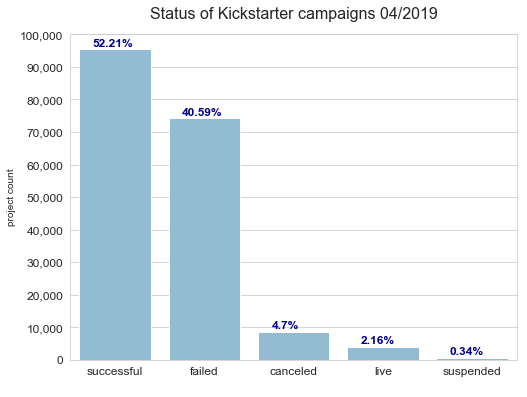

In [250]:
# style
plt.figure(figsize=[8,6])

# create ordering
order = master_df.status.value_counts().index

# plot bar chart for catergorical data
ax = sns.countplot(data=master_df, x='status', color=cust_blues, order=order);

# annotate proportions 
for p in ax.patches:
    ax.text(p.get_x()+0.15, 
            p.get_height()+1000, 
            str(round((p.get_height() / len(master_df))*100,2)) + '%', 
            fontsize=12, color='darkblue', weight='bold')

# labels and ticks
plt.title("Status of Kickstarter campaigns 04/2019", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.xlabel(" ")
y_ticks = np.arange(0, master_df.status.value_counts().values.max()+10000, 10000)
y_labels = [format_num(y_tick) for y_tick in y_ticks ]
plt.yticks(y_ticks, y_labels, fontsize=12)
plt.ylabel("project count")
plt.show()

Here we see that since the launch of Kickstarter in 2009, most campaigns ended in success (52.21%). 40.59% of all projects failed. There is also a small amount of projects that were canceled or suspended. Surprisingly, there is a relatively high number of nearly 4,000 projects currently live and open for funding. 

**How may projects succeeded or failed out of all completed projects?**

Below we are going to plot the success and failure counts of projects that were completed ordinarily.

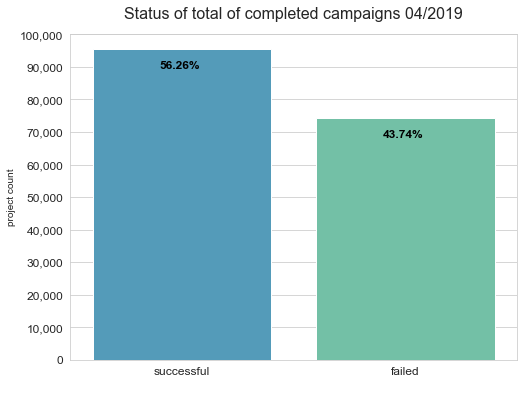

In [251]:
# settings
plt.figure(figsize=[8,6])

# plot bar plor of completed projects only
ax = sns.countplot(data=ks_compl, x='status', 
                   color=sns.set_palette(status_colors), 
                   order=ks_compl.status.value_counts().index);

# annotate proportion
for p in ax.patches:
    ax.text(p.get_x()+0.3, p.get_height()-6000, 
            str(round((p.get_height()/ len(ks_compl))*100,2)) + '%', 
            fontsize=12, color='black', weight='bold')

# labels and ticks
plt.title("Status of total of completed campaigns 04/2019", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.xlabel(" ")
y_ticks = np.arange(0, ks_compl.status.value_counts().values.max()+10000, 10000)
y_labels = [format_num(y_tick) for y_tick in y_ticks ]
plt.yticks(y_ticks, y_labels, fontsize=12)
plt.ylabel("project count")
plt.show()

Out of all completed projects by Kickstarter's 10th anniversary, there were {{format_num(n_compl_success)}} successfully funded projects in our data frame. More than half of all completed campaigns were successful since Kickstarter's beginning. Meanwhile, {{format_num(n_compl_fail)}} of all completed projects ended in failure.

### Categories and Subcategories

**What kind of categories, subcategories and combined categories are common?**

To analyze project categories, I will start by visualizing the distribution of the parent categories, before I go more into detail by plotting subcategories and combined categories. 

**Parent category**  

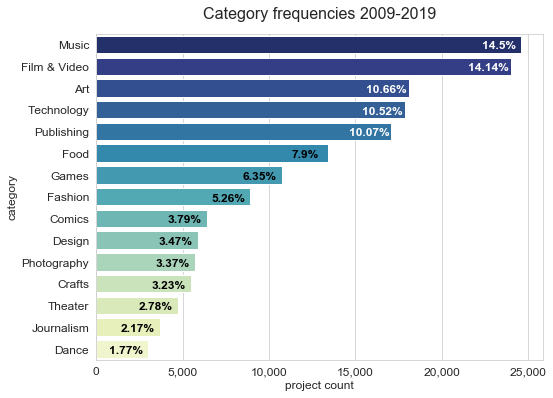

In [252]:
# settings
plt.figure(figsize=[8,6])

# plot horizontal bars of main categories
ax = sns.countplot(data=ks_compl, y='category', palette="YlGnBu_r", 
                   order=ks_compl.category.value_counts().index);

# annotate proportions
cat_counts = ks_compl.category.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    # white annotation for top categories
    if count > 15000:
        plt.text(count-1300, loc+0.2, cat_rate, ha='center', color="white", fontsize=12, fontweight='bold')
     # black annotations for lower categories
    else:
        plt.text(count-1300, loc+0.2, cat_rate, ha='center', color="black", fontsize=12, fontweight='bold')
    
# labels and ticks
plt.title("Category frequencies 2009-2019", fontsize=16, pad=15);

plt.yticks(fontsize=12)
plt.ylabel("category", fontsize=12)

x_ticks = np.arange(0, ks_compl.category.value_counts().values.max()+5000, 5000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)
plt.xlabel("project count", fontsize=12)
plt.show()

**Subcategories**  
Let's now go into detail of categories. As subcategories can appear under several parent categories, I'm going to depict the distribution of combined categories, which considers the parent category and subcategory. 

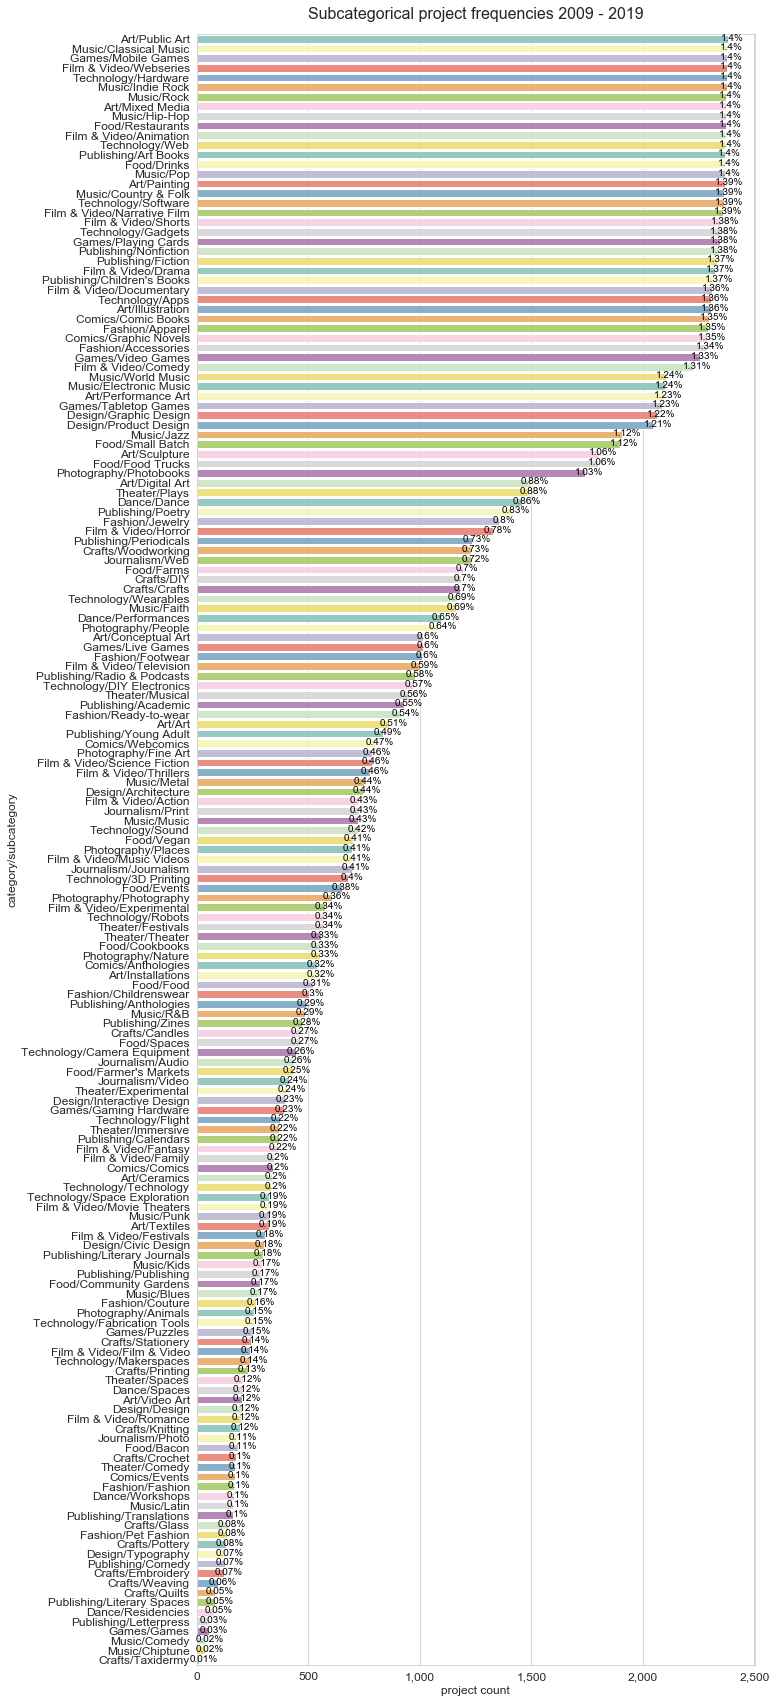

In [253]:
# settings
plt.figure(figsize=[10,30])

# plot horizontal bars of main categories
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="Set3",
                   order=ks_compl.comb_cat.value_counts().index);

# annotate proportions
cat_counts = ks_compl.comb_cat.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+20, loc+0.15, cat_rate, ha='center', color="black")
    
    
# labels and ticks
plt.title("Subcategorical project frequencies 2009 - 2019", fontsize=16, pad=15);

plt.yticks(fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)

x_ticks = np.arange(0, ks_compl.comb_cat.value_counts().values.max()+500, 500)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)
plt.xlabel("project count", fontsize=12)
plt.show()    

**Best of categories/subcategories**  
Since there are so many subcategories, I'm going to plot the top and bottom 10 proportion of combined categories.

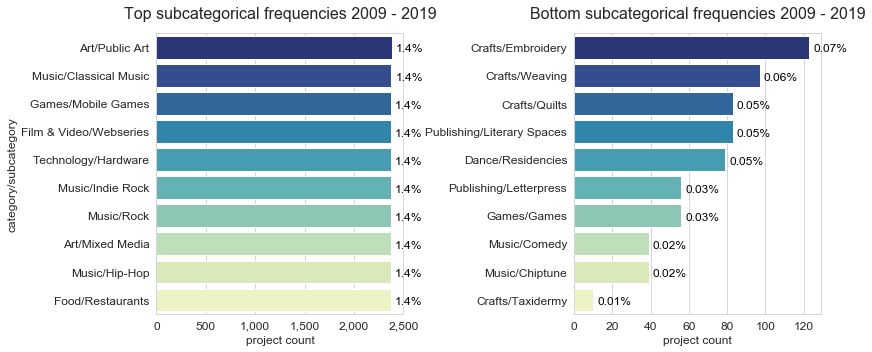

In [254]:
# save 10 most popular combined categories
pop_subcats = ks_compl.comb_cat.value_counts().index[:10]

# save 10 most uncommon combined categories
unpop_subcats = ks_compl.comb_cat.value_counts().index[-10:]

# settings
plt.figure(figsize=[12,5])

# left plot: top subcategorical count as horizontal bars
plt.subplot(1,2,1)
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="YlGnBu_r",
                   order=pop_subcats);

# annotate proportions
cat_counts = ks_compl.comb_cat.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+180, loc+0.15, cat_rate, ha='center', color="black", fontsize=12)

# labels and ticks
plt.yticks(fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
plt.title("Top subcategorical frequencies 2009 - 2019", fontsize=16, pad=15); 
x_ticks = np.arange(0, ks_compl.comb_cat.value_counts().values.max()+500, 500)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)
plt.xlabel("project count", fontsize=12)


# right plot: top subcategorical count as horizontal bars
plt.subplot(1,2,2)
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="YlGnBu_r",
                   order=unpop_subcats);
plt.title("Bottom subcategorical frequencies 2009 - 2019", fontsize=16, pad=15);


# annotate proportions
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+11, loc+0.15, cat_rate, ha='center', color="black", fontsize=12)
      
# labels and ticks
plt.tight_layout()
plt.yticks(fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
x_ticks = np.arange(0, 130, 20)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)
plt.xlabel("project count", fontsize=12)
plt.ylabel("")
plt.show()    

#### Subplots of subcategories of most popular categories

Let's take a look on the 6 most common categories in depth. By separating the top 6 categories into subplots to evaluate respective top 10 subcategories, I hope to shed light what kind of projects are typically being crowdfunded on Kickstarter. 

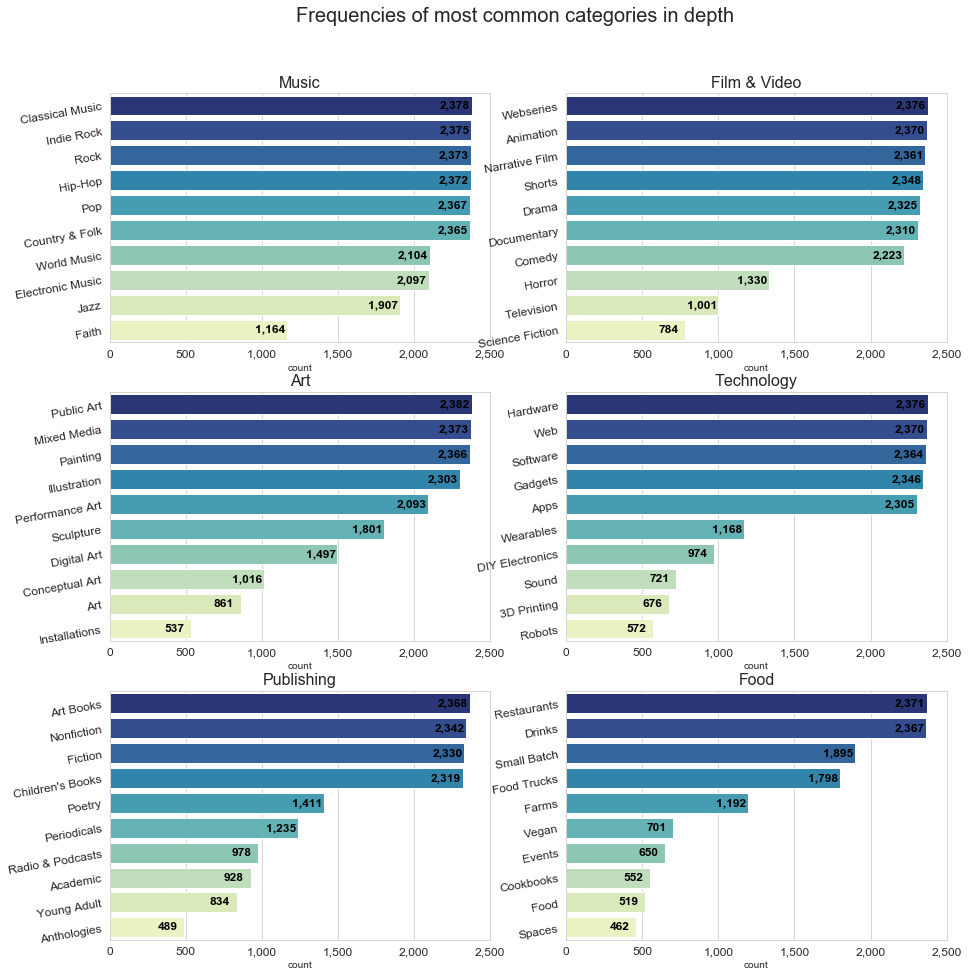

In [255]:
# settings
plt.figure(figsize=[15,12])


# subplots
for i, cat in enumerate(ks_compl.category.value_counts().index[:6]):
        # filter dataframe by category
        ks_compl_cat = ks_compl.query('category == @cat')
        
        plt.subplot(3, 2, i+1)
        # plot horizontal bars
        ax = sns.countplot(data=ks_compl_cat, y='subcategory', palette='YlGnBu_r',  
                           order=ks_compl_cat.subcategory.value_counts()[:10].index);
        
        plt.yticks(rotation=10, fontsize=12)
        plt.ylabel("")
        plt.subplots_adjust(bottom=-0.1)
        x_ticks = np.arange(0, ks_compl_cat.subcategory.value_counts().max()+500, 500)
        x_labels = [format_num(x_tick) for x_tick in x_ticks]
        plt.xticks(x_ticks, x_labels, fontsize=12)
        
        # annotate
        cat_counts = ks_compl_cat.subcategory.value_counts()
        plt.title(f"{cat}", fontsize=16)
        locs, labels = plt.yticks()
        for loc, label in zip(locs, labels):
            count = cat_counts[label.get_text()]
            plt.text(count-110, loc+0.1, format_num(count), ha='center', 
                     color="black", fontsize=12, fontweight='bold')
plt.suptitle("Frequencies of most common categories in depth", fontsize=20)
plt.show()

The above plots of project categories confirm that _Music_, _Film & Video_ and _Art_ are among the most frequent project categories. By taking a more detailed look on subcategories, we find _Public Art_, _Classical Music_ and _Mobile Games_ at the top. The proportion of those subcategories is 1.4% each. Notice that the relative distribution of subcategories is relatively even. About one third of all subcategories range between relative shares of 1.4% to 1% of all projects. We do not find outstanding dominant subcategories.

Generally, we clearly recognize a focus on creative disciplines on Kickstarter. At the top of most categories we find ventures like Public Art, Classical Music, Art Books and Web Series. From a business perspective without knowing the details, such kind of projects are usually not known to speak to the public mainstream; nor do they promise high commercial incomes. However, there are some top categories that may infer to a higher commercial potential, e.g. tech projects, Food/Restaurants and Food/Drinks.

## Featured
**How did Kickstarter support campaigns?**  

As a next step, I'm going to investigate how Kickstarter supported projects. Let's start by plotting the value counts of the data point _featured_.

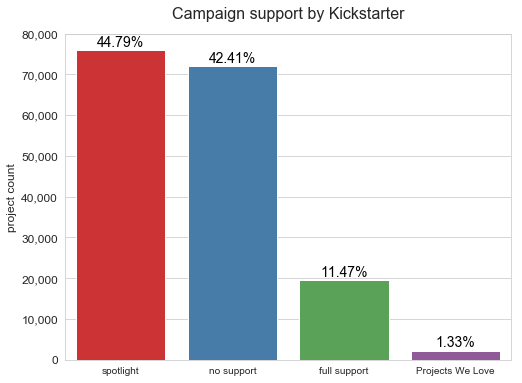

In [256]:
# settings
plt.figure(figsize=[8,6])

# order
feat_order = ks_compl.featured.value_counts().index

# plot vertical bars
ax = sns.countplot(data=ks_compl, x='featured', color=sns.set_palette(feat_color),
                   order=feat_order)

# annotate percentages
for i, feat in enumerate(feat_order):
    rate = (ks_compl.featured.value_counts().values[i] / n_compl_projects) * 100
    plt.text(i, ks_compl.featured.value_counts().values[i]+1000, str(round(rate, 2)) + "%", 
             ha='center', fontsize=14, color="black")

# ticks and labels
plt.xlabel("", fontsize=12)
locs, labels = plt.yticks()
labels = [str(format_num(loc)) for loc in locs]
plt.yticks(locs, labels, fontsize=12)
plt.ylabel("project count", fontsize=12)
plt.title("Campaign support by Kickstarter", fontsize=16, pad=15);
plt.show();

44.8% of all projects were spotlighted by Kickstarter on their landing page. Nearly the same amount of projects didn't get the chance of any support by Kickstarter. A bit than every 10th project got fully featured by Kickstarter. To be precise, 11.47% of all completed projects were featured on the landing page and were additionally picked by staff for a Projects We Love badge. Only a very small amount of project were awarded the badge, but didn't get any further support. Overall, more than every second project got some kind of support by Kickstarter. 

### Duration
I expect the funding duration to influence the probability success and failure of project. Thus, I visually assess duration next.

**How is funding duration distributed across projects?**

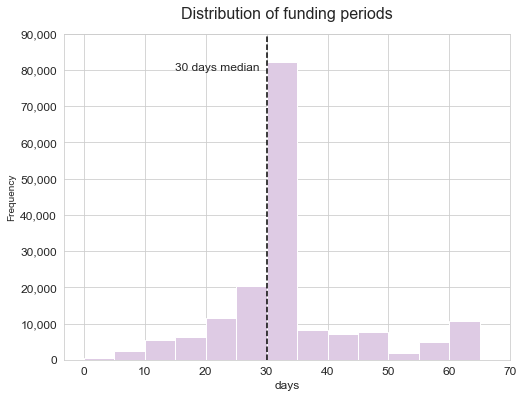

In [257]:
# settings
plt.figure(figsize=[8,6])

# plot histogram of project duration
ks_compl['duration_days'].plot.hist(color=cust_purple, bins=np.arange(0, 70,5))

# annotate median duration
plt.axvline(ks_compl['duration_days'].median(), color='black', linestyle='--')

# labels and titles
plt.title("Distribution of funding periods", fontsize=16, pad=15 );
plt.text(15, 80000, str(ks_compl['duration_days'].median())[:-2] + " days median", fontsize=12)

ylocs, xlabels = plt.yticks()
ylabels = [str(format_num(yloc)) for yloc in ylocs]
plt.yticks(ylocs, ylabels, fontsize=12)

x_ticks = np.arange(0, 80, 10)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)

plt.xlabel("days", fontsize=12)
plt.show()

The above normally distributed plot of funding periods shows that durations around a median of 30 days strongly dominate. There is second modal peak in durations between 60-65 days.

## Goals

I assume that goals are one of the main predictors on whether a project succeeds or fails. From the above statistical assessment, I expect my visuals to be extremely skewed to the right. In order to make the plots readable, I will use different techniques. Aside from using the 95% quantile data frame, I will use log scales and I will group the data in multiple goal levels. 

**How are goals distributed across completed campaigns?**

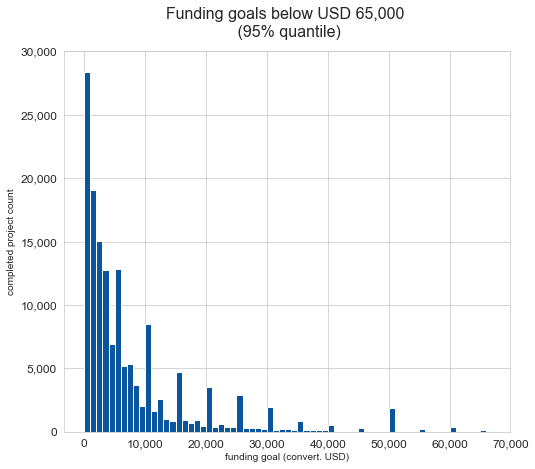

In [258]:
# # style
plt.figure(figsize=[8,7])

# Create bins
bin_edges = np.arange(0, ks_compl_95.goal_hist_usd.max()+1000, 1000)

# plot bars of 95% quantile data
plt.hist(data = ks_compl_95, x = 'goal_hist_usd', bins = bin_edges, color=goal_color);

# labels and titles
plt.title("Funding goals below USD 65,000 \n (95% quantile)", fontsize=16, pad=15)

x_ticks = np.arange(0, goal_95+5000, 10000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)
plt.xlabel("funding goal (convert. USD)")

y_ticks = np.arange(0, 30000+1, 5000)
y_labels = [format_num(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels, fontsize=12)

plt.ylabel("completed project count")
plt.show()

The visualization above depicts the distribution funding goals of the 95% quantile of all completed projects. Be aware that funding goals are cut at USD 65,000 in this visualization. Plotting the actually goals up to {{format_num(goal_max)}} would skew the curve further, thus, result in an unreadable plot. Notice the accumulation of low funding goals and the long right tail of the plot. Characteristic for the above distribution are the multimodal peaks of funding goals that seem to occur on a regular frequency. 

To better understand the distribution of funding goals, I will again plot the goal distribution of all completed project; this time using a logarithmic scale. 

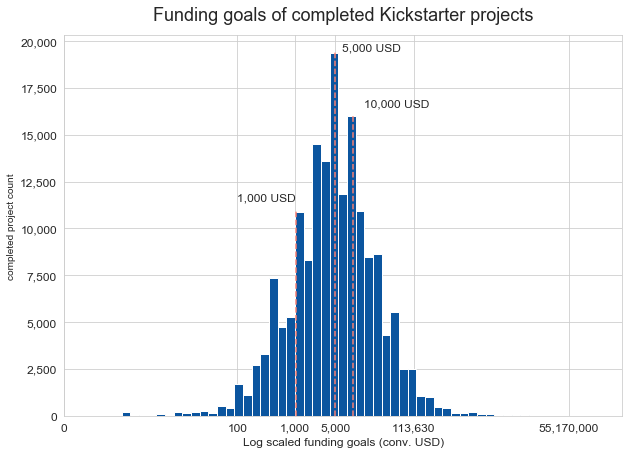

In [259]:
# settings
plt.figure(figsize=[10,7])
base_color = sns.color_palette("Blues_r")[0]

# create log scale and bin data 
log_data = np.log10(ks_compl.goal_hist_usd)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotations

# calculate peaks
peaks = ks_compl.goal_hist_usd.value_counts().index[:3]
log_peaks = [np.log10(peak) for peak in peaks]
texts = [format_num(peak) + " USD" for peak in peaks]
ax = plt.gca()

# 5000 peak
ax.axvline(x=log_peaks[0], color='salmon', ymax=0.96, linestyle="dashed")
ax.annotate(texts[0], xy=(log_peaks[0]+0.11, 19500),fontsize=12)

# 10 000 peak
ax.axvline(x=log_peaks[1], color='salmon', ymax=0.79, linestyle="dashed")
ax.annotate(texts[1], xy=(log_peaks[0]+0.5, 16500),fontsize=12)

# 1000 peak
ax.axvline(x=log_peaks[2]+0.01999, color='salmon', ymax=0.539, linestyle="dashed")
ax.annotate(texts[2], xy=(log_peaks[2]-1, 11500),fontsize=12)

# labels and ticks
plt.title("Funding goals of completed Kickstarter projects", fontsize=18, pad=15)

y_ticks = np.arange(0, 20000+2500, 2500)
y_labels = [format_num(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels, fontsize=12)
plt.ylabel("completed project count")

x_ticks = [0.1, 100, 1000, goal_50,  round(goal_975,2), round(goal_outliers,2) ]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels, fontsize=12)
plt.xlabel('Log scaled funding goals (conv. USD)', fontsize=12)

plt.show()

In contrast to the previous plot, this plot uses the full range of funding goals, including extremes and outliers. Using a log scale on the x-axis results in an rather symmetrical normal distribution of goals: the highest peak is at the median of USD 5,000, the second highest peak is at USD 10,000. However, by using a log scale, the above visualization hides the extremely skewed nature of funding goals and may lead to misinterpretation. Moreover, the local maxima of funding goals are not as obvious. To bring the analysis of goals to the next level, I'm going to split goals into groups based on their aforementioned quantiles.   

In [260]:
# Bin observations into ordinal goal categories
bin_edges = [goal_min, goal_25, goal_50, goal_75, goal_95, goal_975, goal_outliers, goal_max]
bin_names = ['low', 'medium', 'moderately high', 'high', 'very high', 'extreme', 'outliers']

# Creates goal_level column 
pd.set_option('mode.chained_assignment', None)
ks_compl['goal_level'] = pd.cut(ks_compl['goal_hist_usd'], bin_edges, labels=bin_names)

# show counts per goal level
ks_compl.goal_level.value_counts()

medium             48853
low                43541
moderately high    34852
high               33931
very high          4242 
extreme            4224 
outliers           17   
Name: goal_level, dtype: int64

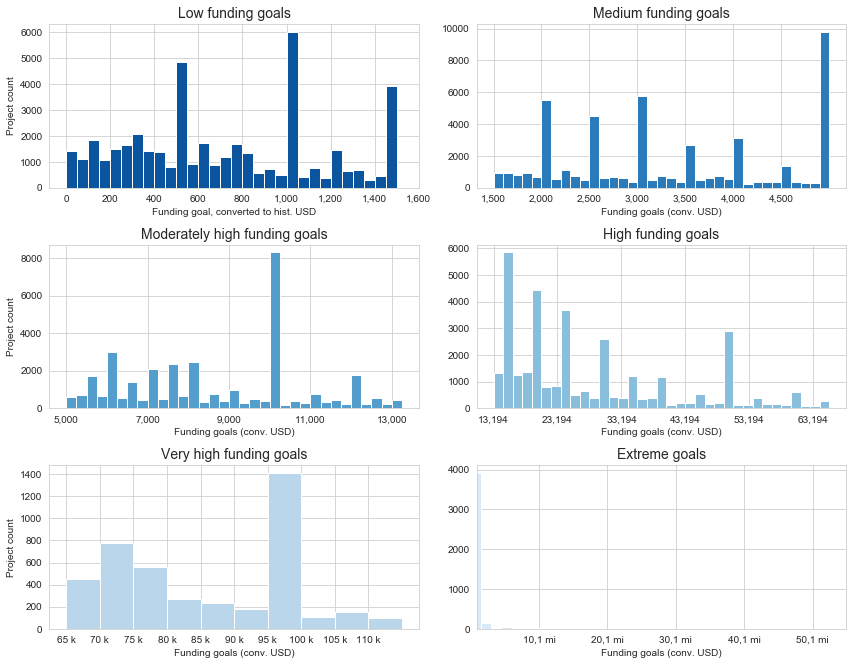

In [261]:
# style
plt.figure(figsize=[12,12])
base_color = sns.color_palette("Blues_r")

# # low goal projects
plt.subplot(4, 2, 1)
ks_compl_goal_low = ks_compl[ks_compl.goal_level == "low"]
bin_edges_leveled = np.arange(0, ks_compl_goal_low.goal_hist_usd.max()+50, 50)
plt.hist(data = ks_compl_goal_low, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[0])
plt.title("Low funding goals", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
x_ticks = np.arange(0, goal_25+200, 200)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.3)

# medium goal projects
plt.subplot(4, 2, 2)
ks_compl_goal_medium = ks_compl[ks_compl.goal_level == "medium"]
bin_edges_leveled = np.arange(goal_25, ks_compl_goal_medium.goal_hist_usd.max()+100, 100)
plt.hist(data = ks_compl_goal_medium, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[1])
plt.title("Medium funding goals", fontsize=14)
plt.xlabel("Funding goals (conv. USD)")
plt.ylabel("")
x_ticks = np.arange(goal_25, goal_50, 500)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.3)

# moderately high goal projects
plt.subplot(4, 2, 3)
ks_compl_goal_moderate = ks_compl[ks_compl.goal_level == "moderately high"]
bin_edges_leveled = np.arange(goal_50, ks_compl_goal_moderate.goal_hist_usd.max()+250, 250)
plt.hist(data = ks_compl_goal_moderate, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[2])
plt.title("Moderately high funding goals", fontsize=14)
plt.xlabel("Funding goals (conv. USD)")
plt.ylabel("Project count")
x_ticks = np.arange(goal_50, goal_75, 2000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.5)

# high goal projects
plt.subplot(4, 2, 4)
ks_compl_goal_high = ks_compl[ks_compl.goal_level == "high"]
bin_edges_leveled = np.arange(goal_75, ks_compl_goal_high.goal_hist_usd.max()+1500, 1500)
plt.hist(data = ks_compl_goal_high, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[3])
plt.title("High funding goals", fontsize=14)
plt.xlabel("Funding goals (conv. USD)")
plt.ylabel("")
x_ticks = np.arange(goal_75, goal_95, 10000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.5)

# # very high goal projects
plt.subplot(4, 2, 5)
ks_compl_goal_very_high = ks_compl[ks_compl.goal_level == "very high"]
bin_edges_leveled = np.arange(goal_95, ks_compl_goal_very_high.goal_hist_usd.max()+5000, 5000)
plt.hist(data = ks_compl_goal_very_high, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[4])
plt.title("Very high funding goals", fontsize=14)
plt.xlabel("Funding goals (conv. USD)")
plt.ylabel("Project count")
x_ticks = np.arange(goal_95, goal_975+1, 5000)
x_labels = [format_num(x_tick)[:-4] + " k" for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.5)

# extreme goal projects
plt.subplot(4, 2, 6)
ks_compl_goal_extreme = ks_compl[ks_compl.goal_level == "extreme"]
bin_edges_leveled = np.arange(goal_975, ks_compl_goal_extreme.goal_hist_usd.max()+1500000, 1500000)
plt.hist(data = ks_compl_goal_extreme, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[5])
plt.title("Extreme goals", fontsize=14)
plt.xlabel("Funding goals (conv. USD)")
plt.ylabel("")
plt.subplots_adjust(bottom=-0.5)
x_ticks = np.arange(goal_975, goal_outliers, 10000000)
x_labels = [format_num(x_tick)[:-6] + " mi" for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.xlim(1000000, 55000000) # treat values above 55,000,000 like outliers

plt.tight_layout()
plt.show()

Here, goals were plotted leveled by their quantiles to guide the attention towards its multi-modal peaks. Due to long right tail and to improve readability of the above graphs, I limited the graphs to goals under USD 55 mi. 
We experience strong outliers at the upper end of funding goals that are not easily to depict in a plot. In spite of splitting goals into levels, the trend of lower goals in each category is still noticeable; yet there are remarkable peaks in each plot that seem to march to a different drummer. To name a few common goals: USD 500, 1000, 1500, 5,000, 10,000 and 100,000. Below, I will programmatically calculate the most important modes by goal level.  

In [262]:
# find local peaks
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

# print summary
for name, df in zip(bin_names, ks_goal_leveled):
    frequencies = df.goal_hist_usd.value_counts().index[:5]
    freq_counts = df.goal_hist_usd.value_counts().values[:5]
    print(f"\nFrequency peaks of {name} goal projects:")
    for i in range(5): print(f"USD {format_num(frequencies[i])}, count: {format_num(freq_counts[i])}")


Frequency peaks of low goal projects:
USD 1,000, count: 5,735
USD 500, count: 4,275
USD 1,500, count: 3,592
USD 300, count: 1,288
USD 1,200, count: 1,134

Frequency peaks of medium goal projects:
USD 5,000, count: 9,534
USD 3,000, count: 5,338
USD 2,000, count: 5,112
USD 2,500, count: 4,062
USD 4,000, count: 2,854

Frequency peaks of moderately high goal projects:
USD 10,000, count: 8,080
USD 6,000, count: 2,508
USD 8,000, count: 2,093
USD 7,000, count: 1,628
USD 7,500, count: 1,621

Frequency peaks of high goal projects:
USD 15,000, count: 4,426
USD 20,000, count: 3,826
USD 25,000, count: 3,165
USD 50,000, count: 2,782
USD 30,000, count: 2,301

Frequency peaks of very high goal projects:
USD 100,000, count: 1,266
USD 75,000, count: 585
USD 80,000, count: 255
USD 70,000, count: 201
USD 85,000, count: 110

Frequency peaks of extreme goal projects:
USD 150,000, count: 410
USD 250,000, count: 319
USD 200,000, count: 277
USD 500,000, count: 206
USD 300,000, count: 149


There is a wide range of funding goals. Generally speaking, lower funding goals under ~15,000 are more common. We experience strong outliers at the high end of funding goals that go up into several millions. Our plots show a right-skewed goal distribution across all goal levels with multimodal peaks. Typically, there are peaks around whole numbers. The most frequent goals are: USD 5,000, USD 10,000, USD 1,000 and USD 3,000. 

### Pledged

**How is the amount of funding distributed across completed projects?**

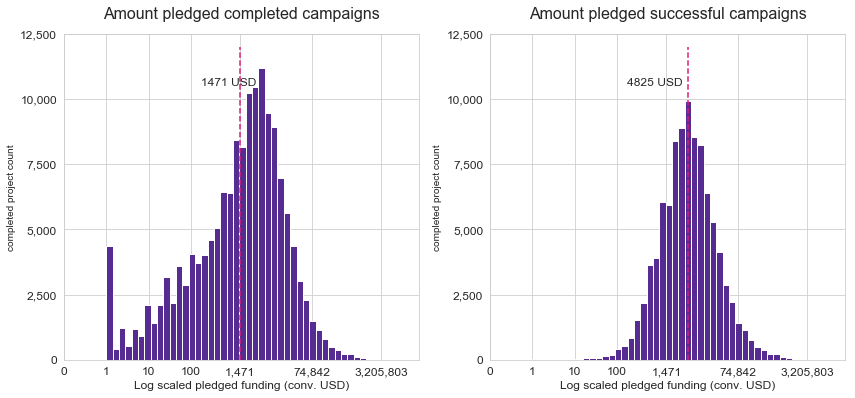

In [263]:
# settings
plt.figure(figsize=[14,6])
base_color = sns.color_palette("Purples_r")[0]

# left plot: pledged amount all completed projects
plt.subplot(1,2,1)
# create log scale and bin data 
df = ks_compl.pledged_hist_usd.replace(0, 0.01) # to avoid zero division error for log scale 
log_data = np.log10(df)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotate median
ax = plt.gca()
ax.axvline(x=np.log10(pledged_50), color='#dd1c77', ymax=0.96, linestyle="dashed")
ax.annotate(str(int(pledged_50)) + " USD", xy=(np.log10(pledged_50-1300), 10500),fontsize=12)

# labels and ticks
plt.title("Amount pledged completed campaigns", fontsize=16, pad=15)

y_ticks = np.arange(0, 14000, 2500)
y_labels = [format_num(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels, fontsize=12)
plt.ylabel("completed project count")

x_ticks = [0.1, 1, 10, 100, pledged_50,  round(pledged_975,2), round(pledged_outliers,2) ]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels, fontsize=12)
plt.xlabel('Log scaled pledged funding (conv. USD)', fontsize=12)

# right plot: pledged amount all completed projects
plt.subplot(1,2,2)

# create log scale and bin data 
df = ks_compl_success.pledged_hist_usd.replace(0, 0.01) # to avoid zero division error for log scale 
log_data = np.log10(df)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotate median
ax = plt.gca()
ax.axvline(x=np.log10(df.median()), color='#dd1c77', ymax=0.96, linestyle="dashed")
ax.annotate(str(int(df.median())) + " USD", xy=(np.log10(pledged_50-1300), 10500),fontsize=12)

# labels and ticks
plt.title("Amount pledged successful campaigns", fontsize=16, pad=15)

y_ticks = np.arange(0, 14000, 2500)
y_labels = [format_num(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels, fontsize=12)
plt.ylabel("completed project count")

x_ticks = [0.1, 1, 10, 100, pledged_50,  round(pledged_975,2), round(pledged_outliers,2) ]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels, fontsize=12)
plt.xlabel('Log scaled pledged funding (conv. USD)', fontsize=12)

plt.show()

Above, I depicted the log scaled distribution of pledges. First of all for completed projects, and second of successful projects only. 

In contrast to the distribution of goals, the bell curve of the pledged amounts of all completed projects is non-symmetrical. The top of the curve is right of the median of USD 1,471. Despite of the right-skewed character of pledges, very low amounts of pledges are common on completion of the funding period. A remarkable number of ventures actually ends a campaign with no funding at all. Please note, that due to the log scale used, all zero pledges are counted into the first bin of our histogram.

This result doesn't surprise if we take a look at the plot on the right. Only considering successful projects forms a symmetrical normally distributed curve. The axial shift towards very low pledges is gone and median earnings of pledges increased to USD 4,825.

### Backers

Let's move our attention to the number of people supporting projects. By plotting the distribution of backer's of completed projects, I hope to find answers to the question: How many backers does a projects usually achieve? And what number does it usually take to end a campaign in success? 

**How is the number of supporters distributed across projects?**

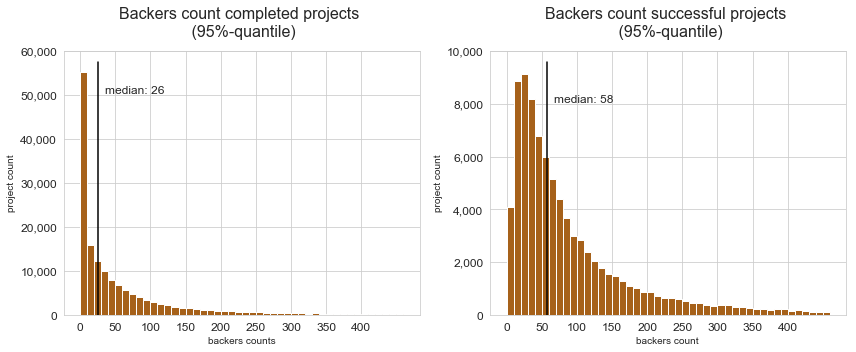

In [264]:
# to depict distribution of backers, use 95 quantile dataframe
plt.figure(figsize=[12,5])
bin_edges = np.arange(0, ks_compl_95['backers_count'].max()+10, 10)

# left plot: total distribution of backers of all completed projects
plt.subplot(1,2,1)
plt.hist(data = ks_compl_95, x = 'backers_count', bins= bin_edges, color=backers_color);

# labels and titles
plt.title("Backers count completed projects \n (95%-quantile)", fontsize=16, pad=15)

x_ticks = np.arange(0,401, 50)
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_tick_labels, fontsize=12)
plt.xlabel("backers counts")

plt.ylabel("project count")
y_ticks = np.arange(0, 60000+1, 10000)
y_labels = [format_num(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels, fontsize=12)

# annotate median
ax = plt.gca()
ax.axvline(x=backers_50, color='black', ymax=0.96)
ax.annotate("median: " + str(int(backers_50)), xy=(backers_50+10, 50500),fontsize=12)

# right plot: total distribution of backers of successful projects
plt.subplot(1,2,2)
ks_compl_95_s = ks_compl_95[ks_compl_95.status == 'successful']
plt.hist(data = ks_compl_95_s, x = 'backers_count', bins=bin_edges, color=backers_color);

# annotate median
ax = plt.gca()
backers_50_s = ks_compl_95_s.backers_count.median()
ax.axvline(x=backers_50_s, color='black', ymax=0.96)
ax.annotate("median: " + str(int(backers_50_s)), 
            xy=(backers_50_s+10, 8050),fontsize=12)

#labels and titles
plt.title("Backers count successful projects \n (95%-quantile)", fontsize=16, pad=15)

y_ticks = np.arange(0, 12000, 2000)
y_labels = [format_num(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels, fontsize=12)
plt.ylabel("project count")

plt.xticks(x_ticks, x_tick_labels, fontsize=12)
plt.xlabel("backers count ")

plt.tight_layout()
plt.show()

The above plots describe the distribution of the number of backers per project. On the left side, I took all completed projects into account, whereas the right plot considers successful projects only. In order to improve readability, I renounced very high and extreme backers counts by working with the 95 quantile data frame.    

The distribution of the number of supporters across all completed projects demonstrates the dominance of a low number of backers. More than a quarter of all completed ventures win less than 10 supporters. Our plot describes a steep decline after the 10 backers mark. The number of occurrences decreases smoothly thereafter; with a higher number of supporters becoming less and less common.  

If we draw our attention to the plot on the right, we find a different picture. The right plot visualizes successful campaigns only. In contrast to the median of 26 backers count of all completed projects, the median of successful projects is much higher with 58 supporters. The count of supporters peaks between 20-30 with roughly 9 tsd occurrences during 10 years. There is a smooth decline thereafter with a high number of backer becoming gradually less common up until the 450 backers mark. 

To improve interpretation, I'm going to try a log scale approach below for the 95 quantile of successful projects.

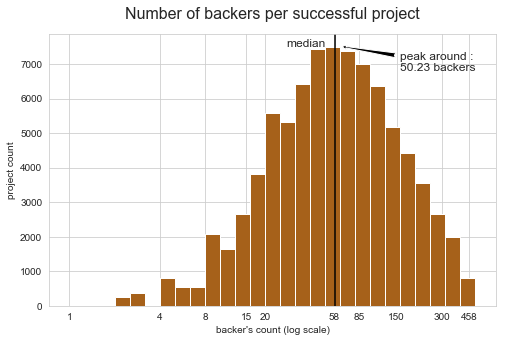

In [265]:
# plot using log scale
plt.figure(figsize=[8,5])

# log transform data 
log_data = np.log10(ks_success_95['backers_count']) 
log_bin_edges = np.arange(0.001, log_data.max()+0.1, 0.1)

# plot
y,x, _ = plt.hist(log_data, bins = log_bin_edges, color=backers_color)

# find the x-axis position of our binned peak by iterating over our y axis  
bin_max = np.where(y == y.max())
bin_max = x[bin_max][0]

# annotate median
ax = plt.gca()
ax.axvline(x=np.log10(backers_50_s), color='black')
ax.annotate("median", xy=(np.log10(backers_50_s)-0.32, 7500),fontsize=12)

# annotate binned peak
ax.annotate("peak around :\n" + str(round(log_trans(bin_max, inverse=True), 2)) + " backers", fontsize=12,
            xy=(bin_max +0.1,y.max()+20), xytext=(bin_max+0.5,y.max()-700),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
tick_locs = [1, 4, 8, 15, 20, int(round(backers_50_s)), int(round(backers_75)), 150, 300, int(round(backers_95))]
plt.xticks(np.log10(tick_locs),tick_locs)
plt.xlabel("backer's count (log scale)")
plt.ylabel("project count")
plt.title("Number of backers per successful project", fontsize=16, pad=15)

plt.show()

The above visualization shows the distribution of backers counts of successful projects using a log scale of data to offset the long right tail. The log-scale approach reveals a non-symmetrical bell shape of backers, with a peak of projects with roughly 50.23 backers. In contrast to the relatively smoothly decreasing curve on the right side, the low side of backers counts describe a more irregularly shaped curve with individual peaks at a little over 4, 8 and 20 backers per project. 50% of all successful campaigns stay below a number of {{backers_50_s}} supporters, whereas the upper half of the data can go up to rougly 460 backers. At this point, I'd like to remind the reader that we depicted the 95% interval of data above. The de facto highest number of successful projects is {{format_num(ks_compl_success.backers_count.max())}} supporters.

After analysing each data point individually, I gained a general understanding about my data set. In the following section, I'm going to try variables against each other. The relationship of the variables will allow to answer my research questions:

1) With the hype of entrepreuneurs launching crowdfunding campaigns, is it still worth it to finance your venture on Kickstarter? 

2) Whether any of our features of interest make campaigns more likely to succeed.

## With crowdfunding becoming mainstream, is it still worth it to finance your project on Kickstarter?

The statistics above are quite impressive. In spite of this data set being incomplete due to the cleaning, we recorded nearly USD 2 billion of successfully raised funding distributed across {{format_num(n_success)}} projects. 

However, crowdfunding became mainstream in the recent years. Platforms with special focuses and types of crowdsourcing evolved globally. With the rise of competitors, campaign creators likely face a bigger challenge courting for attention and investment. 

There certainly is a high chance to fail: {{round(p_compl_fail*100)}} % of projects do not make it. Due to Kickstarter's approach to only distribute the collected investment once the funding goal was met, creators end with all or nothing. Because of failure, creators may have to deal with unnecessary loss of reputation. 
Crowdfunding is usually considered as an early-stage investment. The early exposure of product details may be a risk for IP theft and plagiarism, as studies indicate. Recent news reports and public legal trials of creators abusing the collected investment may additionally have put off the public investor audience. 

The obvious doubts about crowdfunding inspired me to investigate how crowdfunding as an opportunity of finance has evolved over time. To be precise, I'm curious how the chances to successfully fund a Kickstarter campaign have been developing. How exactly have campaign characteristics changed on Kickstarter's 10th anniversary compared to previous years? Eventually, measuring the status of today against previous years, will help to answer the question whether its still worth it to launch your project on Kickstarter. 

This research topic clearly implies a time component. So, I'm going to depict the most relevant characteristics of our data set on a time line. First of all, let's dig into Kickstarter's historical prosperity.  

**Do creators have to fear a higher risk of failure since crowdfunding became mainstream?**

To plot the absolute counts of projects across a 10 year period, I'm going to group completed projects by year and month of its campaign deadline and store the data in a separate dataframe. Due to zero counts in some of the months, I will manually create a monthly index and add zero values to missing months. 

In [266]:
# create dataframe
df_project_counts = pd.DataFrame(data={'total': [0.0]*120, 
                              'success':  [0.0]*120, 
                              'failed':  [0.0]*120, 
                              'date': dates})

# fill data frame with absolute project counts per month
for df, label in [(ks_compl, 'total'), (ks_compl_success, 'success'), (ks_compl_failed, 'failed')]:
    # calculate monthly abs. project counts
    counts = df.groupby([df.deadline.dt.year, df.deadline.dt.month])\
                        .count()['project_id']
    # the above grouping ignores months with zero counts, so we manually add zero values
    # re-create a new multi-index, this time including all 12 months per year
    levels = [counts.index.levels[0].values, range(1,13)]
    new_index = pd.MultiIndex.from_product(levels, names=['year', 'month'])
    # re-index counts and fill empty values with zero
    counts = counts.reindex(new_index, fill_value=0).values
    # remove months Jan-April 2014 and, May-Dec 2019 
    counts = counts[4:-8]
    # add to dataframe
    df_project_counts[label] = counts
    
df_project_counts.tail(5)

,total,success,failed,date
115,2396,1582,814,2018-12-01
116,1577,959,618,2019-01-01
117,1894,1323,571,2019-02-01
118,2604,1916,688,2019-03-01
119,1478,1061,417,2019-04-01


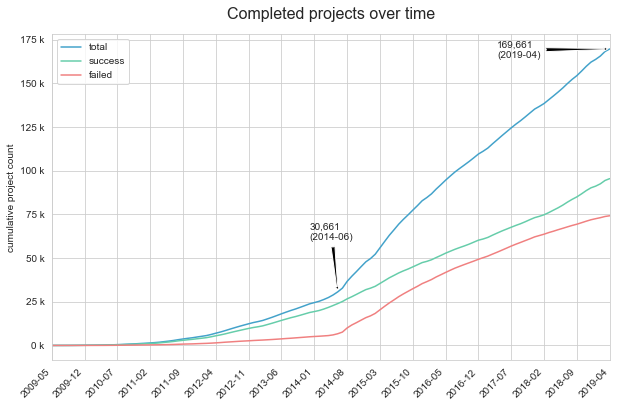

In [267]:
# settings
plt.figure(figsize=[10,6])

# plot cumulative sum of project month after month of completed projects
for i, col in enumerate(df_project_counts.columns[:-1]):
    # calculate cumulative sum and plot
    ax = df_project_counts[col].cumsum().plot(color=status_colors[i])

# annotate June 2014
ax.annotate(format_num(df_project_counts.total.cumsum().values[61]) + "\n(2014-06)", 
            xy=(61, df_project_counts.total.cumsum().values[61]), 
            xytext=(55,df_project_counts.total.cumsum().values[61] + 30000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# annotate current number of projects 
ax.annotate(format_num(df_project_counts.total.cumsum().values[-1])+ "\n(2019-04)", 
            xy=(119, df_project_counts.total.cumsum().values[-1]), 
            xytext=(95,df_project_counts.total.cumsum().values[-1]- 5000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))    
    
# labels and titles
plt.title("Completed projects over time", fontsize=16, pad=15)
plt.xlabel('campaign deadline (year, month)')

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel('cumulative project count')

# improve readability of y ticks
timeline_ticks(df_project_counts)

plt.legend()
plt.show()

After Kickstarter's start in April 2009, it took about 3 years until the platform gained momentum. By 2012, the number of projects started picking up speed slowly. Yet, it took another two years for Kickstarter to thrive. Suddenly, by mid 2014, the number of projects took a sharp turn upwards. Ever since, project counts have been linearly increasing. By June 2014, we recorded a number of {{format_num(df_project_counts.total.cumsum().values[61])}} completed campaigns. In the following five years the absolute count had risen by a factor of six up to {{format_num(df_project_counts.total.cumsum().values[-1])}} projects. 

Interestingly, the absolute counts of failed and successful campaigns performed differently. Successful projects have been growing smoothly since mid 2012. In contrary, failed campaigns kept at a low rate up until Kickstarter's boom in mid 2014. Notice the sudden bend in the red line above. Thereafter, failed campaigns became more common and got closest to the number of successful projects in the years 2016 and 2017. Yet, they never exceeded the number of successful campaigns. 

In the recent one and a half years however, the number of successful and failed projects is diverging. The good news for potential creators: counts of failed campaigns have been in a slight recession recently. 

Instead of visualizing cumulative project counts, I'm going to analyze the number of campaigns being completed month-by-month over the past 10 years.   

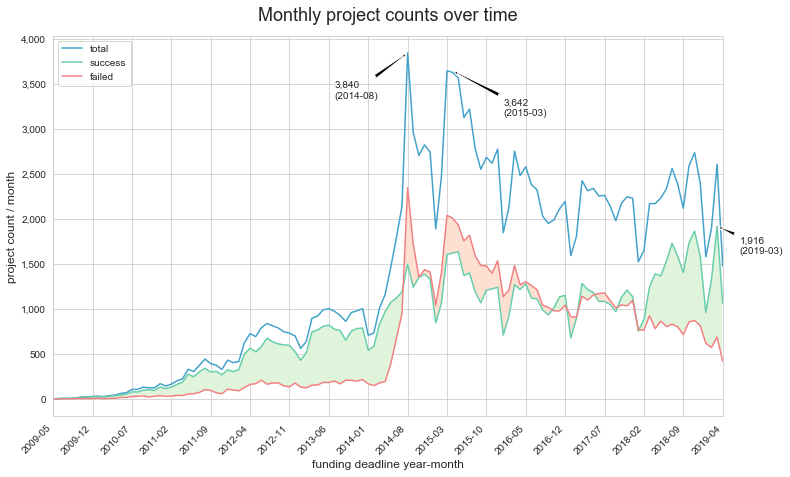

In [268]:
# settings
plt.figure(figsize=[12,7])

# plot monthly counts of projects of completed projects by month over time
for i, col in enumerate(df_project_counts.columns[:-1]):
    ax = df_project_counts[col].plot(color=status_colors[i])

# annotate peaks
ymax_1  = max(df_project_counts.total)
xmax_1 = str(df_project_counts[df_project_counts.total == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1) + "\n(" + str(xmax_1) + ")", xy=(63, ymax_1), 
            xytext=(50, ymax_1-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_2  = df_project_counts.total.sort_values().values[-2]
xmax_2 = str(df_project_counts[df_project_counts.total == ymax_2].date.values[0])[:7]
ax.annotate(format_num(ymax_2) + "\n(" + str(xmax_2) +")", xy=(71, ymax_2), 
            xytext=(80, ymax_2-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_3  = max(df_project_counts.success)
xmax_3 = str(df_project_counts[df_project_counts.success == ymax_3].date.values[0])[:7]
ax.annotate(format_num(ymax_3) + "\n(" + str(xmax_3)+")", xy=(118, ymax_3), 
            xytext=(122, ymax_3-300),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))


# highlight differences
ax.fill_between(np.arange(0,120), df_project_counts.success, df_project_counts.failed , 
                where=df_project_counts.failed >= df_project_counts.success, 
                facecolor=fill_red, interpolate=True)
ax.fill_between(np.arange(0,120), df_project_counts.success, df_project_counts.failed, 
                where=df_project_counts.success >= df_project_counts.failed, 
                facecolor=fill_green, interpolate=True)

# # labels and titles
plt.title("Monthly project counts over time", fontsize=18, pad=15)

ylabels = ['{:,.0f}'.format(ytick) for ytick in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.ylabel('project count / month', fontsize=12)

timeline_ticks(df_project_counts)
plt.xlabel('funding deadline year-month', fontsize=12)

plt.legend(loc=2)
plt.show()

The blue plot of projects ending each month over Kickstarter's lifespan allows more detailed insights how it developed as a tool of investment over the past years.

During the first 4 years, the platform's campaign activities increased at a slow but steady rate. Then, by the beginning of 2014, suddenly Kickstarter's performance exploded. Within a few months the number of campaigns rocketed and reached an all time high in August 2014 with {{format_num(ymax_1)}} projects. Over the following months the project count dropped significantly; yet staying on a far higher level than before the hype occurred. Shortly after, there was a second very high peak by March/April 2015.  
In the following five years, the number of projects settled down, fluctuating roughly around 2,000 projects ending monthly. There has been a slight upward trend since 2018.   

Over the entire time, there have been remarkable activity drops on a cyclic basis. I suppose, the season or time of a year may be an explanation. I'm going to explore this topic later on as it may be one factor contributing to success.  

If we turn our attention to the green and red lines of failed and successful projects, we notice an interesting pattern. Until the hype in August 2014, there were always more successful projects than failed projects, growing at a steady rate. 
When Kickstarter became popular, the number of failed ventures suddenly peaked and exceeded successful projects. Only by the end of 2016 successful and failed projects seemed to have balanced out. Then, beginning of 2018, Kickstarter turned success and failed projects upside down. Ever since, campaigns ending in success have become more likely while flops have been declining notably. Actually, the highest number of successful campaigns ever was recorded only recently, in March 2019.

To fully understand, Kickstarter's lifecycle, let's plot monthly growth rates. 

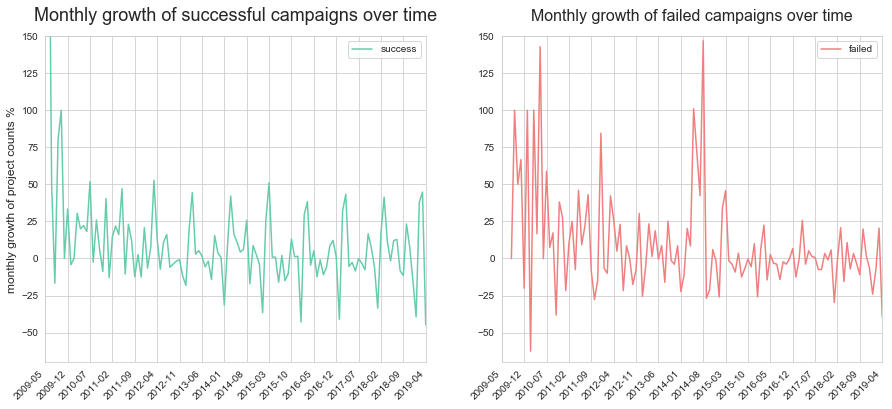

In [269]:
# settings
plt.figure(figsize=[15,6])
    
# calculate monthly growth rates of successful and black projects
success_r = df_project_counts['success'].pct_change()*100
failure_r = df_project_counts['failed'].pct_change()*100

# # left plot: monthly growth successful campaigns
plt.subplot(1,2,1)
ax = success_r.plot(color=cust_green)
plt.ylim(-70, 150) # limit yaxis to remove initial fluctuation
plt.legend()

# labels and titles
plt.title("Monthly growth of successful campaigns over time", fontsize=18, pad=15)
plt.ylabel('monthly growth of project counts %', fontsize=12)
timeline_ticks(df_project_counts)

plt.subplot(1,2,2)
ax = failure_r.plot(color=cust_red)   
plt.ylim(-70, 150) # limit yaxis to remove initial fluctuation

plt.title("Monthly growth of failed campaigns over time", fontsize=16, pad=15)
plt.ylabel('')
timeline_ticks(df_project_counts)

plt.legend()
plt.show()


The above plots depict monthly growth of successful and failed campaigns. The initial years, until the Kickstarter hype started, growth rates show stronger, irregular amplitudes, especially in failed campaigns. Growth seems to fall slightly until the hype year 2014. Then, failed campaigns skyrocketed. In contrast, growth of successful campaigns has been following a relatively regular 'heartbeat' since 2010. Growth rates of successful campaigns are clearly subject to seasonal fluctuations cycling around zero growth. Less so in failed campaigns.  

To conclude, according to our visualizations of project counts on a time line, we only see a strong amplitude of failed campaigns in 2014. During the hype year the chances to fail were certainly higher due to the strong growth rates. Ever since, we observed a falling trend of flop campaigns. Finally, by the beginning of 2018, chances of raising successfully have been increasing, while failed campaigns became less common. At the same time, Kickstarter recorded a stronger gain in project numbers compared to previous years. While more competition certainly impacted the hype year of 2014, we cannot confirm the above thesis, that due to more competition today, there is less of a chance to win a campaign. On the contrary, chances to succeed have never been better.

It is remarkable that in contrast to failed campaigns, the recent increase of successful campaigns was not affected by higher competition. In fact, growth rates of successful campaigns kept constant and have been increasing since 2018. They seem to be detached from the mainstream effect of increased competition.     

To decide whether it's worth it to run a campaign in times of mainstream, a creator may consider success factors tight to the desired product itself, the platform environment and the time of the year.

**Did funding goals decrease since crowdfunding became mainstream?**  

As we found that creators have higher chances nowadays, detractors may argue that there was a trade-off between the amount raised and success rates. After all, to spread the total financial capacity available on additional successful campaigns, may end in less funding for an individual creator.   

Thus, I'm going to plot the monthly median goals of completed projects on a time line. In order to avoid extreme values distorting the plot, I'm going to use the 95% quantile data frame. I'm going to add a second plot to cluster completed projects in states of successful and failed.

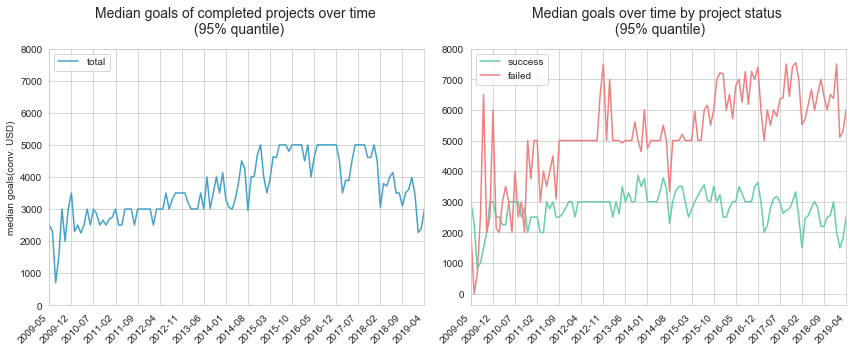

In [270]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median goals of completed projects of 95 quantile data frame
# total
goals_grouped = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month]).median()['goal_hist_usd'].values
# success
goals_grouped_s = ks_compl_95_s.groupby([ks_compl_95_s.deadline.dt.year, 
                                    ks_compl_95_s.deadline.dt.month]).median()['goal_hist_usd'].values
# failed
ks_compl_95_f = ks_compl_95[ks_compl_95.status == 'failed']
goals_grouped_f= ks_compl_95_f.groupby([ks_compl_95_f.deadline.dt.year, 
                                    ks_compl_95_f.deadline.dt.month]).median()['goal_hist_usd'].values
# insert 0 occurence for 2009-6
goals_grouped_f = np.insert(goals_grouped_f,1,0) 

# create dataframe
df_goals = pd.DataFrame(data={'total':goals_grouped, 
                              'success':goals_grouped_s, 
                              'failed': goals_grouped_f, 
                              'date': dates})

# left plot: line plot of monthly median goals of all completed projects
plt.subplot(1,2,1)
ax = df_goals.total.plot(color=cust_blue);

# ticks and labels
plt.xlabel("")
timeline_ticks(goals_grouped)
plt.tight_layout()
plt.yticks(np.arange(0, 8000+1, 1000))
plt.ylabel("median goals(conv. USD)")
plt.title("Median goals of completed projects over time \n (95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plot of monthly median goals of successful anf failed projects
plt.subplot(1,2,2)
ax = df_goals.success.plot(color=cust_green);
ax = df_goals.failed.plot(color=cust_red);

# ticks and labels
plt.xlabel("")
timeline_ticks(goals_grouped)
plt.yticks(np.arange(0, 8000+1, 1000))
plt.ylabel("")
plt.title("Median goals over time by project status \n (95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()

plt.show()

The course of the line plots reminds me of a second degree polynomial curve. I find the seasonal fluctuations make the plot difficult to read. To draw a clearer picture, I'm trying a scatterplot approach, fitting a polynomial regression line. 

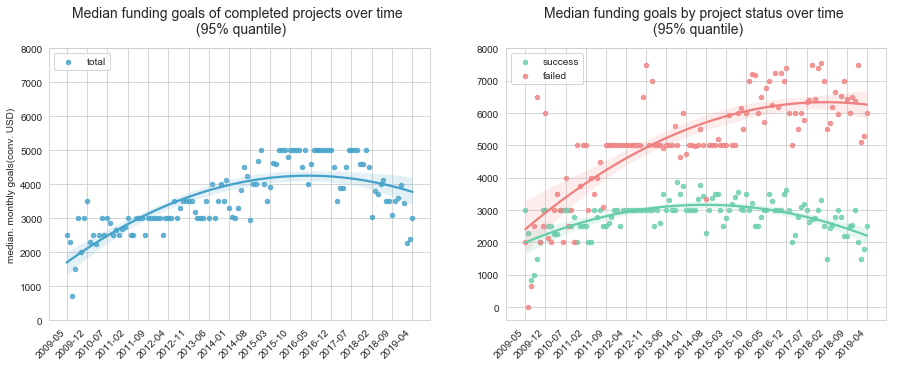

In [288]:
# scatterplots of monthly means and fit a polynomial regression of 2nd degree

# settings
plt.figure(figsize=[15,5])

# we got 120 months, so we chuck our x axis into 120 ticks
df_goals['date'] = np.arange(0, len(goals_grouped), 1)

# left plot: median goals of all completed projects
plt.subplot(1,2,1)
ax = sns.regplot(x=df_goals['date'].values, y=df_goals['total'], 
                 color=cust_blue,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True, label="total");

timeline_ticks(df_goals)
plt.yticks(np.arange(0, 8000+1, 1000))
plt.ylabel("median. monthly goals(conv. USD)")
plt.title("Median funding goals of completed projects over time \n (95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# # right plot: median goals of successful and failed projects
plt.subplot(1,2,2)
ax = sns.regplot(x=df_goals['date'], y=df_goals['success'],
                 color=cust_green,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True, label="success");
ax = sns.regplot(x=df_goals['date'], y=df_goals['failed'],
                 color=cust_red,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True, label="failed");

# ticks and labels
timeline_ticks(df_goals)
plt.yticks(np.arange(0, 8000+1, 1000))
plt.ylabel("")
plt.title("Median funding goals by project status over time \n (95% quantile)", fontsize=14, pad=15)
plt.legend()
plt.show()

To find out how funding goals compare over time, I depicted monthly median values. First, I used a line plot, but found the plot difficult to read because of strong seasonal fluctuations. Instead, I tried a scatterplot and fitted a second degree polynomial regression line to depict the relationship.  

In the early years funding goals were usually chosen around USD 2,000-3,000. They gradually rose and were highest in the years 2015-2017, when creators usually asked for USD 4,000-5,000. In the latest two years, goals have been falling to levels of earlier years. Project creators generally tend to take less optimistic goals in the recent years.

If we separate projects by their status into successful and failed campaigns, we notice an interesting behavior: successful campaigns generally have lower set funding goals compared to failed campaigns, and the gap between them has been developing further apart. 

Failed project goals were on the rise during the entire 10-year period and only show a slight decline toward the end of 2018. On the other hand, success goals have risen modestly during the hype years 2014 to early 2016, generally staying under median goals of USD 4,000. Since then, they have been declining. Today, median goals are almost at the level of the initial situation, close to USD 2,000. In comparison, failed goals were between USD 6000-7000 by April 2019.

In general, the widening of the gap suggests that not only the behaviour of project creators to set goals changed over time. I additionally suspect the willingness of supporters to pledge may has been decreasing concurrently. 

Thus, it is true, with Kickstarter becoming mainstream, successful funding goals have become lower in recent years. However, at this stage, we can't explain the decline solely by competition.  

A funding on Kickstarter does not end with a campaign reaching its goal. Creators can collect the surplus generated until the end of the funding period. Let's turn our attention to the actual amount pledged now.  

**How did the funding capacity develop, compared to goals over time?**  

To start with, I'm going to plot the monthly totals of project fundings on a 10 year monthly time line. Again, I'm going to work on the 95% quantile data frame to avoid distortion of pledges and goals. 

In [272]:
# assess monthly sum of fundings 
ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                    ks_compl_95.deadline.dt.month])['pledged_hist_usd'].sum().sort_values()

deadline  deadline
2009      5          3,354.0             
          6          11,566.48           
          8          14,829.470000000001 
          7          22,156.79           
          9          26,072.8            
          10         56,225.549999999996 
          11         85,538.90999999999  
2010      1          99,412.70999999999  
          3          109,432.06000000001 
          2          112,723.91          
2009      12         123,912.96999999999 
2010      4          190,511.56          
          5          208,593.24          
          6          256,623.92          
          11         365,861.37          
          7          382,823.57          
          8          387,223.06999999995 
          9          408,103.64          
2011      1          439,447.57999999996 
2010      10         478,213.6699999999  
2011      2          549,230.9099999999  
          3          638,044.7000000001  
2010      12         643,897.68          
2011      4    

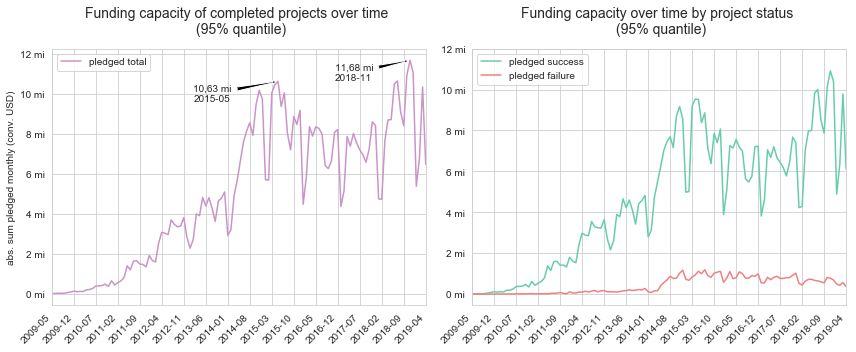

In [273]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median pledges of completed projects of 95 quantile data frame
# total
pledged_grouped_sum = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['pledged_hist_usd'].sum().values
# success
pledged_grouped_sum_s = ks_compl_95_s.groupby([ks_compl_95_s.deadline.dt.year, 
                                    ks_compl_95_s.deadline.dt.month])['pledged_hist_usd'].sum().values
# failed
pledged_grouped_sum_f= ks_compl_95_f.groupby([ks_compl_95_f.deadline.dt.year, 
                                    ks_compl_95_f.deadline.dt.month])['pledged_hist_usd'].sum().values
# insert 0 occurence for 2009-6
pledged_grouped_sum_f = np.insert(pledged_grouped_sum_f,1,0) 

# create dataframe
df_pledged_sum = pd.DataFrame(data={'total':pledged_grouped_sum, 
                                'success':pledged_grouped_sum_s, 
                                'failed': pledged_grouped_sum_f, 
                                'date': dates})

# left plot: line plot of monthly median pledges of all completed projects
plt.subplot(1,2,1)
ax = df_pledged_sum.total.plot(color=pledged_color, label='pledged total');

# annotate peaks
ymax_1  = max(pledged_grouped_sum)
xmax_1 = str( df_pledged_sum[df_pledged_sum.total == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1)[:5] + " mi" + "\n" + str(xmax_1), xy=(114, ymax_1), 
            xytext=(90, ymax_1- 1000000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_2  = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['pledged_hist_usd']\
                              .sum().sort_values().values[-5]
xmax_2 = str(df_pledged_sum[df_pledged_sum.total == ymax_2].date.values[0])[:7]
ax.annotate(format_num(ymax_2)[:5] + " mi" + "\n" + str(xmax_2), xy=(72, ymax_2), 
            xytext=(45, ymax_2- 1000000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_sum)

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' mi' for ytick in ax.get_yticks() / 1000000]
ax.set_yticklabels(ylabels)
plt.ylabel("abs. sum pledged monthly (conv. USD)")
plt.title("Funding capacity of completed projects over time \n (95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plot of monthly median pledges of successful anf failed projects
plt.subplot(1,2,2)
ax = df_pledged_sum.success.plot(color=cust_green, label="pledged success");
ax = df_pledged_sum.failed.plot(color=cust_red, label="pledged failure");

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_sum)
plt.yticks(np.arange(0, 12000000+1, 2000000))
ylabels = ['{:,.0f}'.format(ytick) + ' mi' for ytick in ax.get_yticks() / 1000000]
ax.set_yticklabels(ylabels)
plt.ylabel("")
plt.title("Funding capacity over time by project status \n (95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

In the beginning years, before the hype, monthly collected financial backing increased from zero to plus USD 4 mi. Then, by the beginning of 2014 the available funding skyrocketed. We recorded the 5th highest funding capacity of USD {{format_num(ymax_2)}} in {{xmax_2}}. From 2015-2017 the total amount of pledges fell into a recession. However, by late 2017 pledges started to recover. Ultimately, 2018 was the year with highest recorded funding capacity. In November, there was a record of USD {{format_num(ymax_1)}} financial backing available for all projects. 

On the right side, I divided pledged fundings into two plots: one for successful and one for failed projects. The curve of successful campaigns is remarkably similar to the plot on the left depicting the total amount pledged. Considering this, it doesn't surprise that the red curve of failed pledges stayed on a low level across the entire 10 years of recording. By beginning of 2015 "wasted" pledges started to rise a little bit to a level of roughly 1 mi. They have been decreasing slowly since 2016. As we know, the chance to win or lose a campaign nowadays is nearly 60:40. Apparently, the amount of "lost" investments has never been a significant problem. The overwhelming majority of funding flows in successful campaigns.

This suggests that there is usually no close race towards reaching a funding goal. There doesn't seem to be much ambiguity to whether a campaign appeals to the backer audience and whether it will end in success or failure. However, this is a matter, we're going to explore within our second research question further. 

The above plots should tune creators more optimistic to run a campaign nowadays. In Kickstarter's history, there has never been more funding available. However, comparing the plots of funding capacity to goals is entirely contradicting. 

We found that goals peaked during the years 2015-2017. At the same time, pledges fell into a recession. Then 2018 was a record year of funding capacity, yet goals have been decreasing. Higher competition would be an explanation to it, so let's consider project numbers and plot pledges and goals relative to project counts. In the case of a continuous ratio between funding and projects, we'd expect a horizontal line. 

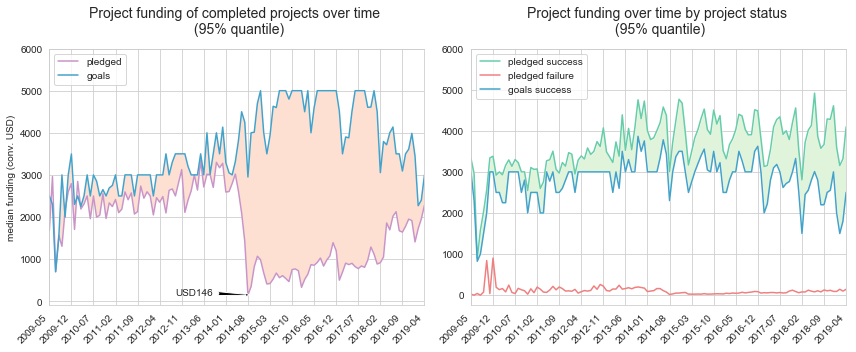

In [286]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median pledges of completed projects of 95 quantile data frame
# total
pledged_median = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month]).median()['pledged_hist_usd'].values
# success
pledged_median_s = ks_compl_95_s.groupby([ks_compl_95_s.deadline.dt.year, 
                                    ks_compl_95_s.deadline.dt.month]).median()['pledged_hist_usd'].values
# failed
pledged_median_f= ks_compl_95_f.groupby([ks_compl_95_f.deadline.dt.year, 
                                    ks_compl_95_f.deadline.dt.month]).median()['pledged_hist_usd'].values
# insert 0 occurence for 2009-6
pledged_median_f = np.insert(pledged_median_f,1,0) 

# create dataframe
df_pledged_median = pd.DataFrame(data={'total':pledged_median, 
                                'success':pledged_median_s, 
                                'failed': pledged_median_f, 
                                'date': dates})

# # left plot: line plot of monthly median pledges of all completed projects
plt.subplot(1,2,1)
ax = df_pledged_median.total.plot(color=pledged_color, label='pledged');
ax = df_goals.total.plot(color=cust_blue, label='goals');

# highlight negative differences
ax.fill_between(np.arange(0,120), pledged_median, df_goals.total , 
                where=df_goals.total >= pledged_median, 
                facecolor=fill_red, interpolate=True)

# annotate minima
ymin  = min(pledged_median)
xmin = str(df_pledged_median[df_pledged_median.total == ymin].date.values[0])[:7]
ax.annotate("USD" + format_num(ymin), xy=(64, ymin), 
            xytext=(40, ymin),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(pledged_median)
plt.tight_layout()
plt.yticks(np.arange(0, 6000+1, 1000))
plt.ylabel("median funding (conv. USD)")
plt.title("Project funding of completed projects over time \n (95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plots of monthly median pledged of successful anf failed projects
plt.subplot(1,2,2)
ax = df_pledged_median.success.plot(color=cust_green, label="pledged success");
ax = df_pledged_median.failed.plot(color=cust_red, label="pledged failure");
# add goals successfull achieved to compare
ax = df_goals.success.plot(color=cust_blue, label='goals success');

# highlight overhead
ax.fill_between(np.arange(0,120), df_pledged_median.success, df_goals.success , where=df_pledged_median.success >= df_goals.success, facecolor=fill_green, interpolate=True)

# ticks and labels
plt.xlabel("")
timeline_ticks(pledged_median)
plt.yticks(np.arange(0, 6000+1, 1000))
plt.ylabel("")
plt.title("Project funding over time by project status \n (95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

Let's turn our attention first to the left plot. This time, I depicted the relative median amount pledges and added a line of monthly median project goals. Over a period of 10 years, there has always been a little negative gap between the median goals and the median funding pledged. 

Most obviously, the funding capacity dropped dramatically by mid 2014. From more than USD 3,000 in 2013 ending, the pledged fund available per project decreased to only USD 146 by August 2014. This event fell into the same time when the number of projects on Kickstarter exploded and the platform experienced a significant rise of funding in absolute numbers. This may indicate, that the number of creators and campaigns grew much faster than the count of backers actively supporting projects. In the light of this, competition likely was a main driver for failed campaigns in 2014. 

Since Kickstarter's hype year 2014, the funding gap remained. The good news is: it has been recovering since 2018 significantly. The overhead between funding available and goals converged to the level of before 2014. Today, creators can expect investments of above USD 2,000 on average for their completed campaign. 

Comparing the purple line on the left to the green line on the right changes our perspective. The course of successful pledges draws a comparably horizontal line. Eliminating seasonal fluctuations, the successful amount pledged has been relatively stable at a median of USD 4,000 per project since mid 2013.

In the hype year, a rise of successful pledges was recorded. At the same time the relative funding capacity went through the floor. In spite of this, creators of successful campaigns did not have to fear losses in funding opportunities. At the same time, failed campaigns were attributed insignificant amounts of funding. Once again, I suspect the backers audience to have univocal objectives when they take the decision to invest. One theory may be that the additional projects available were not appealing to the audience, not fitting crowdfunding as a strategy of investment or were of low quality.      

The green area of the right plot depicts the surplus of pledges exceeding success goals. On average, creators have been able to raise more than they had asked for once the campaign was successful. Since 2017 the positive gap of pledges has even been widening, in spite of declining goals. In the year 2014 USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2014]['pledged_hist_usd'].sum())}} was collected successfully. The amount doubled in 2018, when Kickstarter was able to distribute USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]['pledged_hist_usd'].sum())}} to successful campaigns. In the light of this, we cannot affirm losses in funding potential due to Kickstarter becoming mainstream.

On the contrary, when Kickstarter became mainstream, likely not only additional business founders were attracted, but new private investors. We've already seen that the funding capacity increased tremendously. But, can we attribute the increase to additional investors or to the supporter's willingness to pledge higher amounts? In the latter case, creators would likely need to put up higher efforts into their campaign's success.

**Do creators have to convince more backers to win a campaigns today?**   

To start with, let's plot the absolute numbers of backers participating in a campaign on a time line.

In [275]:
# assess backers counts monthly over 10 years
ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                    ks_compl_95.deadline.dt.month])['backers_count']\
                    .sum().sort_values()

deadline  deadline
2009      5           111   
          7           181   
          6           268   
          9           442   
          8           597   
          10          1008  
2010      2           1417  
          1           1425  
2009      11          1441  
2010      3           1543  
2009      12          2102  
2010      4           2752  
          5           2899  
          6           3831  
          11          5613  
          7           5703  
          8           6030  
          9           6039  
2011      1           6479  
2010      10          6565  
          12          8845  
2011      2           8927  
          3           9311  
          4           11523 
          6           16174 
          9           18179 
          11          18676 
          10          19274 
          5           19336 
          7           20066 
2012      2           22493 
2011      8           22653 
2012      1           23365 
2011      12          25

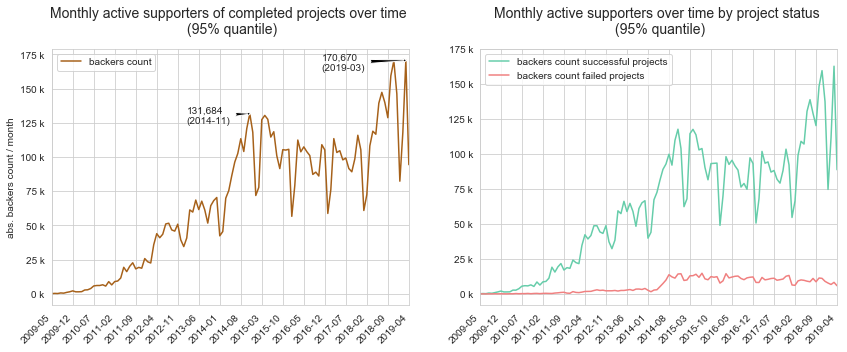

In [276]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly sum of backers counts of 95 quantile data frame
# total
backers_grouped_sum = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['backers_count'].sum().values
# success
backers_grouped_sum_s = ks_compl_95_s.groupby([ks_compl_95_s.deadline.dt.year, 
                                    ks_compl_95_s.deadline.dt.month])['backers_count'].sum().values
# failed
backers_grouped_sum_f= ks_compl_95_f.groupby([ks_compl_95_f.deadline.dt.year, 
                                    ks_compl_95_f.deadline.dt.month])['backers_count'].sum().values
# insert 0 occurence for 2009-6
backers_grouped_sum_f = np.insert(backers_grouped_sum_f,1,0) 

# create dataframe
df_backers_sum = pd.DataFrame(data={'total':backers_grouped_sum, 
                                'success':backers_grouped_sum_s, 
                                'failed': backers_grouped_sum_f, 
                                'date': dates})

# left plot: line plot of backers counts of all completed projects
plt.subplot(1,2,1)
ax = df_backers_sum.total.plot(color=backers_color, label='backers count');

# annotate peaks
# all time max
ymax_1  = max(backers_grouped_sum)
xmax_1 = str( df_backers_sum[df_backers_sum.total == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1)+ "\n(" + str(xmax_1)+")", xy=(119, ymax_1), 
            xytext=(90, ymax_1-7000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# first peak ever in 11/2014
ymax_2  = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['backers_count']\
                              .sum().sort_values().values[-8]
xmax_2 = str(df_backers_sum[df_backers_sum.total == ymax_2].date.values[0])[:7]
ax.annotate(format_num(ymax_2)  + "\n(" + str(xmax_2) +")", xy=(67, ymax_2), 
            xytext=(45, ymax_2-7000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_sum)

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel("abs. backers count / month")
plt.title("Monthly active supporters of completed projects over time \n (95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plots of backers counts of successful anf failed projects
plt.subplot(1,2,2)
ax = df_backers_sum.success.plot(color=cust_green, label="backers count successful projects");
ax = df_backers_sum.failed.plot(color=cust_red, label="backers count failed projects");

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_sum)
plt.yticks(np.arange(0, 175000+1, 25000))
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel("")
plt.title("Monthly active supporters over time by project status \n (95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

The course of monthly absolute backers counts over time reminds of the monthly aggregated sum of pledges. The number of supporters grew steady, then, exploded in 2014, peaking {{format_num(ymax_2)}} in {{xmax_2}}. One year earlier there were only 68,125 backers offering financial funding, meaning the number of backers doubled within a year. 

Late 2015 to 2017, backers counts relapsed, staying above 100,000 backers in peak times. Since 2018 the growth of backers counts has been recovering, counting record after record. Ultimately, in March 2019, the month before Kickstarter's anniversary, there was the highest number of financial supporters ever recorded: peaking at {{format_num(ymax_1)}}. 

Like project counts, goals and pledges, the number of active supporters is subject to heavy cyclic recessions. 

Visualizing backers counts of successful projects only (green line, right plot), primarily mirrors the total amount of active supporters from the plot on the left. And again, considering the low red line, supporters betting on the wrong horse seem to be a minority. According to these plots Kickstarter becoming mainstream attracted more project supporters. This counts towards a plus of Kickstarter becoming more valuable to creators.   

The increasing number of backers may be an explanation for stable investments over time. To proof this, we are going to depict the ratio of backers to creators. 

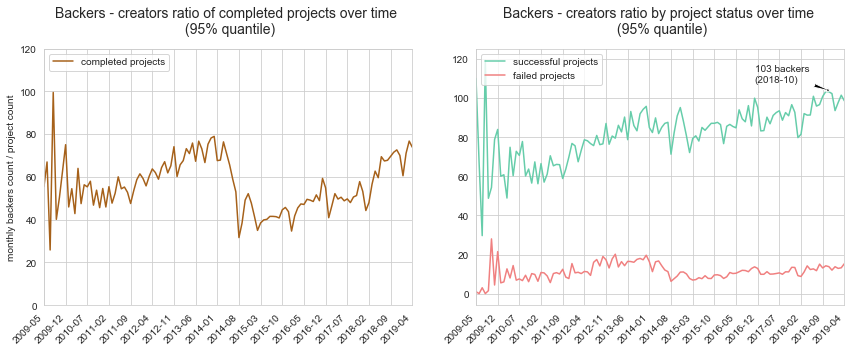

In [277]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly sum of backers counts of 95 quantile data frame
# total
backers_grouped_r = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['backers_count'].mean().values
# success
backers_grouped_s_r = ks_compl_95_s.groupby([ks_compl_95_s.deadline.dt.year, 
                                    ks_compl_95_s.deadline.dt.month])['backers_count'].mean().values
# failed
backers_grouped_f_r= ks_compl_95_f.groupby([ks_compl_95_f.deadline.dt.year, 
                                    ks_compl_95_f.deadline.dt.month])['backers_count'].mean().values
# insert 0 occurence for 2009-6
backers_grouped_f_r = np.insert(backers_grouped_f_r,1,0) 

# create dataframe
df_backers_r = pd.DataFrame(data={'total':backers_grouped_r, 
                                'success':backers_grouped_s_r, 
                                'failed': backers_grouped_f_r, 
                                'date': dates})

# left plot: line plot of avg backers by completed projects
plt.subplot(1,2,1)
ax = df_backers_r.total.plot(color=backers_color, label='completed projects');

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_r)
plt.yticks(np.arange(0, 121, 20))

plt.ylabel("monthly backers count / project count")
plt.title("Backers - creators ratio of completed projects over time \n (95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plots of avg backers by successful or failed project
plt.subplot(1,2,2)
ax = df_backers_r.success.plot(color=cust_green, label="successful projects");
ax = df_backers_r.failed.plot(color=cust_red, label="failed projects");

# annotate recent maximum
ymax_1  = df_backers_r.success.sort_values().values[-3]
xmax_1 = str(df_backers_r[df_backers_r.success == ymax_1].date.values[0])[:7]
ax.annotate(format_num(ymax_1)+ " backers\n(" + str(xmax_1)+")", xy=(115, ymax_1), 
            xytext=(90, ymax_1+5),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_backers_r)
plt.yticks(np.arange(0, 121, 20))
plt.ylabel("")
plt.title("Backers - creators ratio by project status over time \n (95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend(loc=2)
plt.show()

The average number of backers per project over time explains the phenomenon of the overall stable success funding rates and the recent increase in pledges. Note that the average number of backers per successful project has been increasing over time (right plot, green line). In October 2018, there was a record of a mean of 103 backers supporting each project. Therefore, we can conclude that growth of active supporter counts compensated for increased competition among creators.

On the left, the sharp drop of backers of completed projects in August 2018 doesn't come with a surprise. Apparently, the number of campaigns grew faster than the audience of backers. Since then, the average number of supporters almost doubled and is now almost on the level as before the crash. 
At the same time, it is puzzling that this dent and the remarkable growth is hardly notable in successful campaigns. It seems like supporters have been making better decisions. 

Compared to the crash of relative investments, the anomaly of average backers in August 2014 seems to be more discreet. Thus, we got to ask, how did the financial funding overhead in August 2014 came to be? One assumption is, that users were hesitant to invest and contributed with rather small pledges. To proof my hypothesis, I'm going to depict the relative amount each supporter pledged.

In [278]:
# add the average amount pledged per supporter to each campaign
for df in [ks_compl_95, ks_compl_95_s, ks_compl_95_f]:
    df['pledged_rate'] = (df['pledged_hist_usd'] / df['backers_count']).fillna(0)

# assess the average amount pledged per user / project each month.
# I'm using average here, since the individual amount pledges is less skewed
ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                    ks_compl_95.deadline.dt.month])['pledged_rate']\
                    .mean().sort_values()

deadline  deadline
2009      8          25.592927606219806
          5          27.631818181818183
2014      8          47.74795678696713 
2009      9          49.534867846568616
          6          54.81850706311233 
2015      3          55.39190910930031 
2010      8          55.41239695789137 
2015      2          56.01756409386433 
2014      9          56.59637341258144 
2016      1          57.980307086976765
          3          58.392237180462594
2019      2          58.457375666216386
2010      11         59.07579121996007 
2016      2          59.259079353753926
2019      3          59.366194127283116
2016      4          59.609748879756005
2018      2          59.63710257245408 
2016      5          59.68397383660999 
2019      1          60.03268684117145 
2014      10         60.237184677298906
2015      8          60.44029797643552 
          9          61.1374519407428  
2018      8          61.22095819388202 
2017      4          61.468703060017624
2009      12         

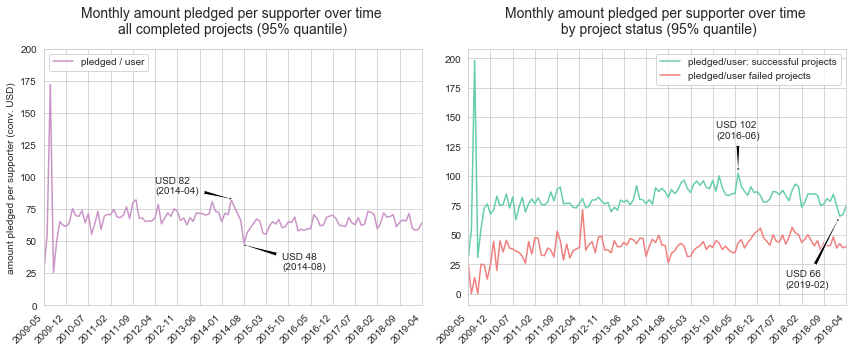

In [279]:
# settings
plt.figure(figsize=[12,5])

# calculate monthly median pledges of completed projects of 95 quantile data frame
# total
pledged_rate_grouped = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                                    ks_compl_95.deadline.dt.month])['pledged_rate'].mean().values
# success
pledged_rate_grouped_s = ks_compl_95_s.groupby([ks_compl_95_s.deadline.dt.year, 
                                    ks_compl_95_s.deadline.dt.month])['pledged_rate'].mean().values
# failed
pledged_rate_grouped_f= ks_compl_95_f.groupby([ks_compl_95_f.deadline.dt.year, 
                                    ks_compl_95_f.deadline.dt.month])['pledged_rate'].mean().values
# insert 0 occurence for 2009-6
pledged_rate_grouped_f = np.insert(pledged_rate_grouped_f,1,0) 

# create dataframe
df_pledged_rate = pd.DataFrame(data={'total': pledged_rate_grouped, 
                                'success': pledged_rate_grouped_s, 
                                'failed': pledged_rate_grouped_f, 
                                'date': dates})

# # left plot: line plot of monthly relative pledges for all completed projects
plt.subplot(1,2,1)
ax = df_pledged_rate.total.plot(color=pledged_color, label='pledged / user');

# annotate peaks
# peak in 4/2014
ymax_1  = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['pledged_rate']\
                              .mean().sort_values().values[-2]
xmax_1 = str(df_pledged_rate[df_pledged_rate.total == ymax_1].date.values[0])[:7]
ax.annotate("USD " + format_num(ymax_1)  + "\n(" + str(xmax_1) +")", xy=(60, ymax_1), 
            xytext=(35, ymax_1+5),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# low in 08/2014
ymin = ks_compl_95.groupby([ks_compl_95.deadline.dt.year, 
                            ks_compl_95.deadline.dt.month])['pledged_rate']\
                            .mean().sort_values().values[2]
xmin = str(df_pledged_rate[df_pledged_rate.total == ymin].date.values[0])[:7]
ax.annotate("USD " + format_num(ymin)  + "\n(" + str(xmin) +")", xy=(62, ymin), 
            xytext=(75, ymin-20),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_rate)

# improve readability of y ticks
plt.yticks(np.arange(0, 201, 25))
plt.ylabel("amount pledged per supporter (conv. USD)")
plt.title("Monthly amount pledged per supporter over time \nall completed projects (95% quantile)", fontsize=14, pad=15)
plt.legend(loc=2)

# right plot: line plot of onthly relative pledges, divided into successful anf failed projects
plt.subplot(1,2,2)
ax = df_pledged_rate.success.plot(color=cust_green, label="pledged/user: successful projects");
ax = df_pledged_rate.failed.plot(color=cust_red, label="pledged/user failed projects");

# annotate peaks
# peak in 6/2016
ymax_3  = ks_compl_95_s.groupby([ks_compl_95_s.deadline.dt.year, 
                              ks_compl_95_s.deadline.dt.month])['pledged_rate']\
                              .mean().sort_values().values[-2]
xmax_3 = str(df_pledged_rate[df_pledged_rate.success == ymax_3].date.values[0])[:7]
ax.annotate("USD " + format_num(ymax_3)  + "\n(" + str(xmax_3) +")", xy=(85, ymax_3), 
            xytext=(78, ymax_3+30),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# low in 08/2014
ymin_2 = ks_compl_95_s.groupby([ks_compl_95.deadline.dt.year, 
                              ks_compl_95.deadline.dt.month])['pledged_rate']\
                              .mean().sort_values().values[5]
xmin_2 = str(df_pledged_rate[df_pledged_rate.success == ymin_2].date.values[0])[:7]
ax.annotate("USD " + format_num(ymin_2)  + "\n(" + str(xmin_2) +")", xy=(117, ymin_2), 
            xytext=(100, ymin_2-60),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
plt.xlabel("")
timeline_ticks(df_pledged_rate)
plt.ylabel("")
plt.yticks(np.arange(0, 201, 25))
plt.title("Monthly amount pledged per supporter over time \n by project status (95% quantile)", fontsize=14, pad=15)
plt.tight_layout()
plt.legend()
plt.show()

The mean amount pledged by supporter was comparatively constant over the past 10 years. It roughly fluctuated around a mean of USD {{format_num(df_pledged_rate.total.mean())}} per backer.

The relative investment spent on projects dropped from an all time high in April to an all time low in August 2014. The rate recovered in the following years but has been little lower compared to the initial years. 

For campaigns ending in success, creators can expect on average USD {{format_num(df_pledged_rate.success.mean())}}.

Turning our attention to the plot on the right, reveals that the drop in relative pledges per project did not affect successful projects. On the contrary: users were willing to spent a little more in between 2015-2017 and a little less on failed projects. This may have contributed to balance the investment's stability during the recession years.

Since late 2018, we observe that the amount pledged per individual has been declining. In order to make up for the loss, creators have to compete for more investors to raise the same amount of funding as in previous years. In 2018, successful projects had to expect on average USD {{format_num(ks_compl_95_s[ks_compl_95_s.deadline.dt.year == 2016]['pledged_rate'].mean() - ks_compl_95_s[ks_compl_95_s.deadline.dt.year == 2018]['pledged_rate'].mean())}} less per backer than in the record year 2016.

The question is whether we can attribute the recent negative development to more competition. On the one hand, we can argue that due to an increased number of projects, supporters tend to diversify their investment across multiple projects or became more risk averse. On the other hand, creators themselves may have chosen lower amounts of fixed incentives to attract a greater number of supporters. Unfortunately, we lack the data to gain deeper understanding about this question.    

In general, supporters seem to be hesitant to invest in projects that eventually fail. On average they invested a mean of only USD {{format_num(df_pledged_rate.failed.mean())}}. This may be an indication for supporters being able to determine the value, quality and chances of success of campaigns, in spite of a greater choice of projects on the platform. 

As we will see in my second research topic, Kickstarter as a platform has quite some power over success and failure rates of projects. As a main actor of making crowdfunding mainstream, Kickstarter should have the potential power and tools to drive competition and engagement. Presumably, one of Kickstarter's main objective is to successfully fund as many projects as possible. One of their main tools to support campaigns is by featuring projects on their landing page and on multiple social media channels and the "Projects We Love" badge. With increased competition, do creators nowadays have less of a chance to gain Kickstarter's support?

**Do creators nowadays have to fear less of a chance to be supported by Kickstarter?**  

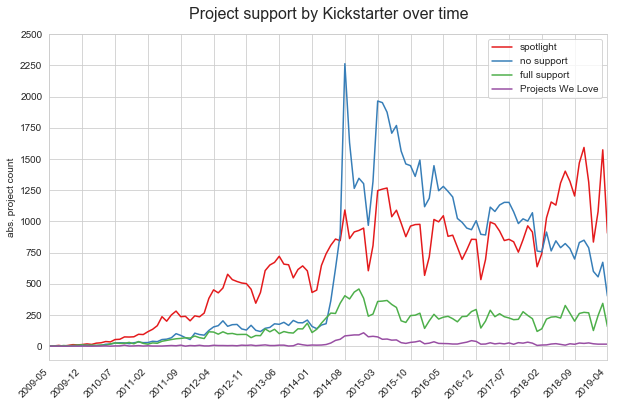

In [280]:
# Visualize how Kickstarter supported projects over time absolute values
fig, ax = plt.subplots(figsize=(10,6))

# create empty dataframe
df_featured = pd.DataFrame(data={'no support': [0.0]*120,
                                'Projects We Love': [0.0]*120, 
                                'spotlight': [0.0]*120, 
                                'full support': [0.0]*120, 
                                'date': dates})

# fill data frame with absolute project counts
for label, df in ks_compl.groupby([ks_compl.featured]):
    # calculate monthly abs. project counts
    counts = ks_compl[ks_compl.featured == label].groupby([ks_compl.deadline.dt.year, 
                                                                  ks_compl.deadline.dt.month]).size()
    # the above grouping ignores months with zero counts, so we manually add zero values
    # re-create a new multi-index, this time including all 12 months per year
    levels = [counts.index.levels[0].values, range(1,13)]
    new_index = pd.MultiIndex.from_product(levels, names=['year', 'month'])
    # re-index counts and fill empty values with zero
    counts = counts.reindex(new_index, fill_value=0).values
    # remove months Jan-April 2014 and, May-Dec 2019 
    counts = counts[4:-8]
    # add to dataframe
    df_featured[label] = counts

# plot each featured value on a line 
for label in ks_compl.featured.value_counts().index:
    ax = df_featured[label].plot(label=label);
    
# ticks and labels
timeline_ticks(df_featured)
plt.xlabel("")

plt.yticks(np.arange(0, 2501, 250))
plt.ylabel("abs. project count");

plt.title("Project support by Kickstarter over time", fontsize=16, pad=15);
plt.legend()
plt.show();

Investigating the absolute numbers of the support offered by Kickstarter reveals that campaigns only receiving the badge "Projects We Love" has been constanly low, almost irrelevant.

The same is true for projects being fully featured. Except for a modest rise in the hype year 2014, the absolute count of fully supported projects was relatively constantly ranging around 250 each month. 

More interesting is the course of projects being spotlighted or not backed by Kickstarter.
Non-featured projects, depicted by the blue line, were minor in comparison to spotlighted projects until mid 2014. While the number of spotlighted projects was smoothly rising during May 2009 to early 2015, counts of non-supported projects exploded in August 2018 and reached a second peak March/April 2015. Since then, projects that have been denied support has been smoothly declining and reached a surprisingly low number of only number 401 in April, 2019.

In contrast, considering the entire 10 year period, spotlighted projects have been growing at a steady rate. There was a dent of stagnation during th recession years late 2015 to 2017. Apart from that, especially spotlighted projects have been subject to seasonal fluctuations.

Before concluding about Kickstarter's project support strategy, let's look at the relative numbers of project support. We are almost certain, the obvious peak in the hype year, the latest increase in supported projects and the seasonal fluctuations can be partly explained by the number of projects on the platform.

In [281]:
# calculate relative project support by dividing featured project counts by monthly project counts
for label in ks_compl.featured.value_counts().index:
    df_featured[label] = (df_featured[label] / df_project_counts['total'])*100

In [282]:
# assess featured proportions
df_featured

,no support,Projects We Love,spotlight,full support,date
0,50.0,0.0,0.0,50.0,2009-05-01
1,0.0,0.0,50.0,50.0,2009-06-01
2,14.285714285714285,0.0,85.71428571428571,0.0,2009-07-01
3,16.666666666666664,0.0,0.0,83.33333333333334,2009-08-01
4,18.181818181818183,0.0,54.54545454545454,27.27272727272727,2009-09-01
5,9.523809523809524,4.761904761904762,57.14285714285714,28.57142857142857,2009-10-01
6,21.73913043478261,0.0,43.47826086956522,34.78260869565217,2009-11-01
7,10.714285714285714,3.571428571428571,46.42857142857143,39.285714285714285,2009-12-01
8,25.806451612903224,0.0,58.06451612903226,16.129032258064516,2010-01-01
9,11.538461538461538,0.0,53.84615384615385,34.61538461538461,2010-02-01


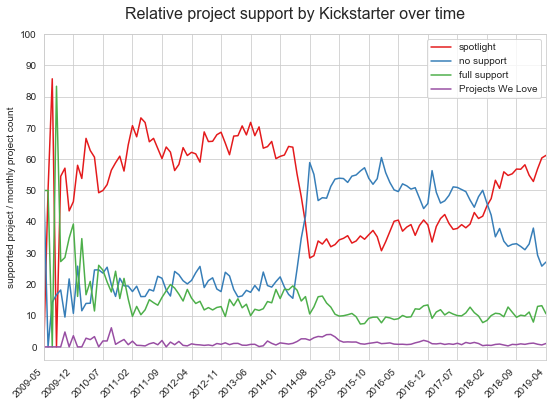

In [283]:
# Visualize how Kickstarter supported projects over time relative values
# settings
plt.figure(figsize=[9,6])

# plot each featured value on a line 
for label in ks_compl.featured.value_counts().index:
    ax = df_featured[label].plot(label=label);
    
# ticks and labels
timeline_ticks(df_featured)
plt.xlabel("")

plt.yticks(np.arange(0, 101, 10))
plt.ylabel("supported project / monthly project count");

plt.title("Relative project support by Kickstarter over time", fontsize=16, pad=15);
plt.legend()
plt.show();

Investigation of relative values of project support, shows a different picture. While campaigns being awarded the "Projects We Love" badge has been remaining constantly at an insignificant level, fully backed projects have been fluctuating roughly around 10% of all projects since mid 2015.

The proportions of spotlighted and non-supported campaigns has been changing significantly. The proportion turned around in the hype year 2014. With the rise of competing projects, the number of not supported project rose from 20% to roughly 55%. At the same time, the proportion of projects being featured on the landing page fell dramatically. From plus 60%, the proportion dropped to under 30% in August 2014. This certainly wasn't the easiest time to succeed with your crowdfunding campaign due to the high competition.

However, the chances of support became more promising. The proportion of spotlighted campaigns have been gradually growing, while projects receiving no backing by Kickstarter have been falling, until, in early 2018 the proportion rolled back. Today, more than 60% of all crowdfundings are spotlighted and only around 27% of campaigns do not gain any support by Kickstarter. As we will see further down, the chances to success are much higher once Kickstarter selected a campaign to be featured.  

This development is surprising. We know that recently creators have been more actively looking for funding on Kickstarter. The competition for creators has risen, yet the chances of support have not been as promising since 2014. Obviously, Kickstarter must have adapted their strategy or website tools to actively feature projects. This may be one of the main drivers of recently more campaigns being successful.  

### Summary: 
**With crowdfunding becoming mainstream, is it still worth it to finance your project on Kickstarter?**

Kickstarter became mainstream in the year 2014. The number of campaigns literally exploded. With the increase in project counts, we found an abnormal high percentage of projects failing in August 2014 , when {{format_num(max(df_project_counts.failed)*100 / df_project_counts[df_project_counts.failed == max(df_project_counts.failed)]['total'].values[0])}} % flopped. During the years of settlement between 2015-2017 project counts were in recession, but remained at a high level. In those times the likelihood to fail minimally exceeded success rates {{format_num(ks_compl_failed[ks_compl_failed.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count() *100 / ks_compl[ks_compl.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count()) }}:{{format_num(ks_compl_success[ks_compl_success.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count() *100 / ks_compl[ks_compl.deadline.dt.year.isin([2014, 2015, 2016, 2017])]['project_id'].count())}}%.

Nevertheless, the overall percentage of successful campaigns has been relatively stable, in 2014 and up until today. Higher competition on Kickstarter primarily affected those campaigns deemed to fail. 

By the beginning of 2018, Kickstarter turned success and failure rates upside down. Ever since, campaigns ending in success have become more likely, while flops have been declining notably. Actually, the highest monthly count of successful campaigns ever recorded was only recently, in March 2019. Chances to win were {{format_num(max(df_project_counts.success)*100 / df_project_counts[df_project_counts.success == max(df_project_counts.success)]['total'].values[0])}}%.

The current trend of higher funding seems as promising. We would expect the recent increase in competing projects, lower funding goals and the latest tendency to pledge greedier investments of supporter to negatively impact campaigns. Yet, the overall financial backing per project has been relatively constant since 2014. On average creators were able to raise a median of USD {{format_num(ks_compl_success['pledged_hist_usd'].median())}} in case of a campaign ending in success. Fortunately, in 2018, creators were able to expect a median of USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]['pledged_hist_usd'].median())}}.

We found the backer-project ratio to be the most obvious explanation to balance higher competition. Clearly, in 2014, there was a huge overhead between investment supply and demand caused by a lack of potential supporters. This gap has been progressively closing. In the light of this, crowdfunding to become mainstream benefited business founders.

The tendency of individuals to pledge higher during the recession years 2015-2017 for successful campaigns may have contributed to keep the financial potential of crowdfunding stable. However, since late 2018, the amount pledged per individual has been declining. In order to make up for the loss, creators have to compete for more investors to raise the same amount of funding as in previous years. In 2018, successful projects had to expect on average USD {{format_num(ks_compl_95_s[ks_compl_95_s.deadline.dt.year == 2016]['pledged_rate'].mean() - ks_compl_95_s[ks_compl_95_s.deadline.dt.year == 2018]['pledged_rate'].mean())}} less per backer than in the record year 2016.

The question is whether we can attribute the recent negative development to competition and popularity. On the one hand, we can argue that due to an increased number of projects, supporters are able to diversify their investment across multiple projects or they became more risk averse. On the other hand, creators themselves may have chosen lower amounts of fixed incentives to attract a greater number of supporters. Unfortunately, we lack the data to gain deeper understanding about this question.    

In general, supporters seem to be more and more hesitant to invest in projects that eventually fail. In spite of a greater choice of projects available, supporters seem to take more univocal, presumably risk averse decisions. Their ability to determine the value, quality and chances of success of campaigns may have improved. One possibility to support this is Kickstarter's increasing role in the promotion of campaigns.

The proportions of spotlighted and non-supported campaigns has been changing over time significantly.  With the rise of competing projects in the hype year 2014, the rate of projects without promotion increased dramatically from 20% to roughly 55%. Only 30% were featured in August 2014. This certainly wasn't the easiest time to succeed with a crowdfunding campaign due to the high competition.

Since the hype year, the proportion of spotlighted campaigns has been gradually growing while the number of projects receiving no promotion have been decreasing. Ultimately, since early 2018 projects being featured overturned the project counts receiving no support. Today, more than 60% of all crowdfundings are spotlighted on Kickstarter's channels and only around 27% of campaigns do not gain any support. As we will see further down, the chances to success are much higher once Kickstarter selected a campaign to be featured. 

In the light of this, Kickstarter must have adapted their strategy or website tools to actively filter and promote projects. This may be one of the main drivers of recently more campaigns being successful in spite of increasing competition.  

Although creators tend to set their goals lower today than in previous years, it doesn't seem to affect the actual funding raised. The amount pledged was surprisingly stable for successful projects over time. 
On average, creators have been able to raise more than they had asked for once the campaign was successful. In spite of declining goals, the surplus of pledges has been widening since 2017. In the year 2014 USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2014]['pledged_hist_usd'].sum())}} was collected successfully. The amount doubled in 2018, when Kickstarter was able to distribute USD {{format_num(ks_compl_success[ks_compl_success.deadline.dt.year == 2018]['pledged_hist_usd'].sum())}} to successful campaigns. We suspect lower funding goals to be connected with Kickstarter's all-or-nothing approach. Creator's setting lower goals may be perceived as less greedy, may reach their funding earlier and eventually benefit from success affirmation effects. In the light of this, we cannot affirm losses in funding potential due to Kickstarter becoming mainstream.

In conclusion, we cannot directly attribute Kickstarter becoming mainstream for crowdfunding to be less valuable for business starters. Clearly, creators have to compete with a higher number of other campaigns. At the same time, there is more potential investment available. The proportion of projects being funded successfully has been increasing lately, and so has the median amount pledged per project and the chance to be promoted by Kickstarter. On the downside, creators may expect a little lower investments per capita. 

The overall positive mainstream effects did not contribute to a closer race between successful and failed campaigns. The collected pledges and number of backers of failed campaigns underperformed significantly. On the contrary, the gap of investment between each status has been widening. 

It seems like the characteristics of what makes a campaign likely to succeed have become clearer. I suppose due to crowdfunding becoming mainstream, project creators, the backers audience and the Kickstarter platform itself benefited from learning effects. Today, stakeholders may have a better mutual understanding about what type of projects are particularly suited for crowdfunding. Additionally, they may have better insights about a campaign's features to eventually make a trusted decision. We are going to look at possible characteristics connected to success in our second research question.


## What makes a crowdfunding on Kickstarter successful?

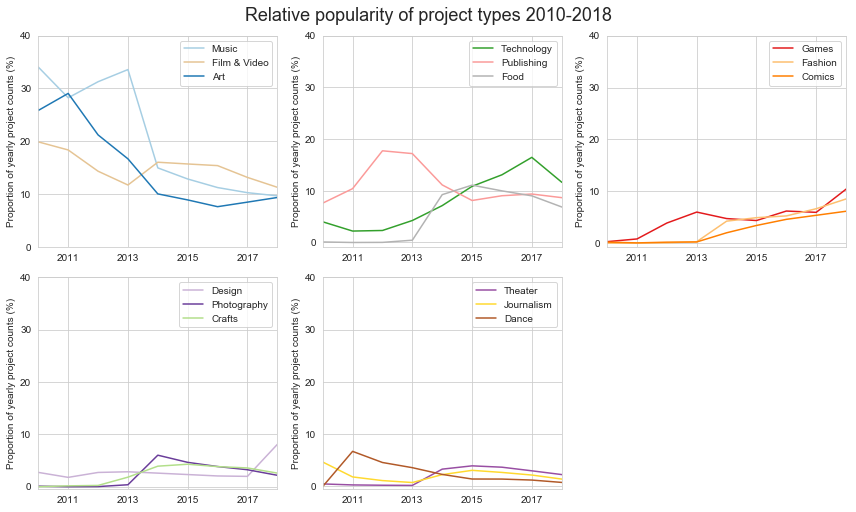

In [88]:
# settings
fig = plt.figure(figsize=[12,10])
j = 0
g_count = 0

# create 5 suplots
for i in range(1,6):
    plt.subplot(3, 3, i)
    
    # take 3 categories per loop, in descending order 
    for cat in ks_compl.category.value_counts()[j:j+3].index:
        # extract observations by category and group by year
        ks_compl_cat = ks_compl[ks_compl.category == cat]
        ks_compl_cat = ks_compl_cat.project_id.groupby([ks_compl_cat.deadline.dt.year]).count().reset_index(name="cat_count")
        
        # as zero occurences are not counted, I add them manually 
        df = pd.DataFrame(data={'year': np.arange(2009,2020)}) # create df with years years 2009 - 2019 
        # join both tables based on year and fill up missing values by zero.
        df = df.merge(ks_compl_cat, how='left', left_on='year', right_on='deadline').fillna(0).drop(columns=['deadline'])
        
        # calculate proportion based on yearly counts
        df['rate'] = round(df['cat_count']*100 / ks_year_count['count_year'], 2)
    
        # plot
        df.rate.plot(color=category_colors[g_count], label=cat);
        
        # labels and ticks
        g_count+=1
        plt.tight_layout()
        plt.yticks(np.arange(0, 40+1, 10))
        plt.xticks(np.arange(0, 11, 2), np.arange(2009, 2020,2))
        plt.xlim(1,9) # limit plot to full years 2010-2018
        plt.xlabel("")
        plt.ylabel("Proportion of yearly project counts (%)")
        plt.legend()
    j+=3

plt.suptitle("Relative popularity of project types 2010-2018", fontsize=18, y=1.02)
plt.show()

Next, I'm going to explore what sort of projects were popular over Kickstarter's lifespan.

**Were there any changes in the popularity of the type of projects?**  

Below, I'm going to plot the relative project counts of a each category per year. As there are 15 categories and plotting all of them makes the timeline difficult to interpret, I will facet categories into 3 lines per plot.    

In [ ]:
# settings
fig = plt.figure(figsize=[12,15])
j = 0
g_count = 0
base_color = sns.set_palette("Set1")

# create 5 suplots
for i in range(1,15):
    plt.subplot(5, 3, i)
    
    # take 3 categories per loop, in descending order 
    for cat in ks_compl.comb_cat.value_counts()[j:j+3].index:
        # extract observations by category and group by year
        ks_compl_cat = ks_compl[ks_compl.comb_cat == cat]
        ks_compl_cat = ks_compl_cat.project_id.groupby([ks_compl_cat.deadline.dt.year]).count().reset_index(name="cat_count")
        
        # as zero occurences are not counted, I add them manually 
        df = pd.DataFrame(data={'year': np.arange(2009,2020)}) # create df with years years 2009 - 2019 
        # join both tables based on year and fill up missing values by zero.
        df = df.merge(ks_compl_cat, how='left', left_on='year', right_on='deadline').fillna(0).drop(columns=['deadline'])
        
        # calculate proportion based on yearly counts
        df['rate'] = round(df['cat_count']*100 / ks_year_count['count_year'], 2)
    
        # plot
        df.rate.plot(color=base_color, label=cat);
        
        # labels and ticks
        g_count+=1
        plt.tight_layout()
        plt.yticks(np.arange(0, 10+1, 1))
        plt.xticks(np.arange(0, 11, 2), np.arange(2009, 2020,2))
        plt.xlim(1,9) # limit plot to full years 2010-2018
        plt.xlabel("")
        plt.ylabel("Proportion of yearly project counts (%)")
        plt.legend()
    j+=3

plt.suptitle("Relative popularity of project types 2010-2018", fontsize=18, y=1.02)
plt.show()

The faceted relative project counts by category and year reveal that the popularity of the type of project changed over time. While Music and Art projects dominated in the beginning years, they have lost its dominance in the recent years. Yet they still remain popular.   
The occurrences of Film & Video projects have been continuously at a high rate. Publishing was also quite popular in the beginning years, but has lost its momentum.   
Technology ventures got the biggest boost in popularity, but have been declining since 2017. Interesting is the development of projects in Games, Fashion and Comics. They have been gradually gaining popularity in the recent years.   

Let's move on to the next data point to answer our question: funding goals. I'm curious whether the behaviour of creators to set up funding goals changed over time.  



**How did project duration evolve over time?**  

Because duration is not as heavily skewed, I'm going to depict 100% of our data.   



In [ ]:
# scatterplot of median duration over days

# calculate monthly median duration of completed projects
# total
duration_grouped = ks_compl.groupby([ks_compl.deadline.dt.year, 
                                    ks_compl.deadline.dt.month])['duration_days'].median().values
# success
duration_grouped_s = ks_compl_success.groupby([ks_compl_success.deadline.dt.year, 
                                    ks_compl_success.deadline.dt.month])['duration_days'].median().values
# failed
duration_grouped_f= ks_compl_failed.groupby([ks_compl_failed.deadline.dt.year, 
                                    ks_compl_failed.deadline.dt.month])['duration_days'].median().values
# insert 0 occurence for 2009-6
duration_grouped_f = np.insert(duration_grouped_f,1,0) 

# create dataframe
df_duration = pd.DataFrame(data={'total': duration_grouped, 
                                'success':duration_grouped_s, 
                                'failed': duration_grouped_f, 
                                'date': np.arange(0, len(duration_grouped), 1)})
# settings
plt.figure(figsize=[10,5])

ax = sns.scatterplot(x=df_duration['date'], y=df_duration['total'], 
                     color='#5e3c99');

# ticks and labels
timeline_ticks(df_duration)
plt.ylabel("funding duration (days)")
plt.title("Median funding duration over time", fontsize=16, pad=15)
plt.xlabel("")

plt.show()

Obviously, there was not much discripancy of the funding duration over time. Only in the first two years the median creators were experimenting with the length of funding durations. Soon, it became general practise to set the period of funding to a median of 30 days. 

In that sense, I can exclude changes in the funding duration being a major driver for of widening of the the gap between successful and failed project goals.   

### Summary: 
**With the hype of entrepreuneurs launching crowdfunding campaigns, is it still worth it to finance your project on Kickstarter?**

There is no evidence the supporter's willingness to invest changed over time. What changed is the number of campaigns and the number of active supporters available on Kickstarter. 
The type of projects may have an influence. 

Since the gap of pledges and backers of successful projects has been strongy widening compared to failed projects.  
I see indication for supporters being able to determine the value, quality and chances of success of campaigns beforehand recently. 


Creators lowered their goals in the recent years.

In [ ]:
# find out what project categories are success predictors
plt.figure(figsize=[15,9])
cust_color = ["#f08080", "#66cdaa"]
# clustered bar chart qualitative vs qualitative

# seaborn countplot
ax = sns.countplot(data = ks_compl, x = 'category', hue = 'status', color = sns.set_palette(cust_color), order=ks_compl.category.value_counts().index[:-2])

# reset legend to avoid overlap
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'status')

# annotate
plt.title("How successful were projects by category?", fontsize=16);
plt.legend(("failed", "successful"))
plt.show()

As we visualize absolute values above, we may misinterpret the actual success rates. In the graph below, we calculate relative frequencies for each category.  

In [ ]:
pop_cats = ks_compl.category.value_counts().index
cat_counts = ks_compl.category.value_counts()

# calculate success and failure rates
def calc_rate(category, status):
    cat_df = ks_compl[ks_compl.category == category]
    cat_len = len(cat_df)
    cat_status_len = len(cat_df[cat_df.status == status])
    return (cat_status_len / cat_len) * 100 

cat_success = [calc_rate(cat,"successful") for cat in pop_cats]
cat_failed = [calc_rate(cat,"failed") for cat in pop_cats]

# create a new dataframe based success and failure rates
df = pd.DataFrame({'failed': cat_failed, 'success': cat_success,}, index=pop_cats)

# order by success rates
df.sort_values(by=['success'], ascending=False, inplace=True)

# plot
ax = df.plot.bar(rot=30, figsize=(10,8));

# plot means
plt.axhline(p_compl_success*100, color='g')
plt.axhline(p_compl_fail*100, color='r')

# annotate
plt.title("Success and failure rates by category", fontsize=16);
plt.text(14.7, p_compl_success*100+1, "avg. success")
plt.text(14.7, p_compl_fail*100+1, "avg. failure")
plt.ylabel("rate(%)")
plt.xlabel("category")
plt.show()

violin plot for project status (categorical )vs. goal (quantitative). I may try a faceted approach for our different categories.

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
# plot

df = ks_compl[ks_compl.goal_hist_usd < goal_95]
ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
                    order=['successful', 'failed'], color = color, 
                    inner='quartile')
#annotate
plt.title("Project goals below 95 quartile", fontsize=14 )
plt.ylabel('Funding goals(conv. USD)')
plt.subplots_adjust(bottom=-0.3)
plt.show()

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])

# ks_compl_goal_extreme = ks_compl_goal_extreme
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

# low goal projects
texts = ["Low", "Medium", "Moderately high", "High", "Very High", "Extreme"]
for i, df in enumerate(ks_goal_leveled):
    # plot
    plt.subplot(3, 2, i+1)
    ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
               order=['successful', 'failed'], color = color, inner='quartile')
    # calculate success rates
    p_failed_goal = len(df[df.status == "failed"])* 100 / len(df)
    p_success_goal = 100 - p_failed_goal
    
    #annotate
    ax.annotate(str(round(p_failed_goal,2)) + "%", xy=(1.19, df.goal_hist_usd.max()*1.04), fontsize=12)
    ax.annotate(str(round(p_success_goal,2)) + "%", xy=(-0.47, df.goal_hist_usd.max()*1.04), fontsize=12)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.ylabel('Funding goals(conv. USD)')
    plt.subplots_adjust(bottom=-0.3)
plt.show()

In [ ]:
plt.figure(figsize=[15,7])

ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_fail = ks_compl[ks_compl.status == "failed"]
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
ks_compl_fail_95 = ks_compl_fail[ks_compl_fail.goal_hist_usd < goal_95]

plt.subplot(1, 2, 1)
sns.regplot(ks_compl_success_95.goal_hist_usd, ks_compl_success_95.pledged_hist_usd, 
            scatter_kws = {'alpha' : 1/5}, fit_reg=False);
plt.ylim(0, 500000)
plt.title("Successful projects goal vs. pledged", fontsize=14)
plt.ylabel("Amount pledged (conv. USD)")
plt.xlabel("Project goal (conv. USD)")


plt.subplot(1, 2, 2)
sns.regplot(ks_compl_fail_95.goal_hist_usd, ks_compl_fail_95.pledged_hist_usd, 
            scatter_kws = {'alpha' : 1/5}, color="#f08080", fit_reg=False);
plt.title("Failed projects goal vs. pledged", fontsize=14)
plt.ylabel("Amount pledged (conv. USD)")
plt.xlabel("Project goal (conv. USD)")

plt.show()


In [ ]:
# calculate differences between goal and pledged
ks_compl['goal_pledged_diff_r'] = abs((ks_compl['pledged_hist_usd'] - ks_compl['goal_hist_usd'])*100 / ks_compl['goal_hist_usd'])
ks_compl[['goal_pledged_diff_r','pledged_hist_usd','goal_hist_usd', 'status']].sample(10)

In [ ]:
# goal vs. pledged
plt.figure(figsize=[12,8])

ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95 ]
sns.regplot(ks_compl_success_95.goal_hist_usd, ks_compl_success_95.goal_pledged_diff_r.apply(log_trans), 
            scatter_kws = {'alpha' : 1/3}, fit_reg=False);
over_goal_r = round(log_trans(ks_compl_success_95.goal_pledged_diff_r.median()),2)
plt.axhline(over_goal_r, color='green')

tick_locs = [0.01, 0.01, 0.1, 10, 100, 1000, 10000, 100000]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.title("Above goal funding rates", fontsize=14)
plt.text(70000, over_goal_r, str(round(log_trans(over_goal_r, inverse=True),2)) + "% median")
plt.xlabel("Project goal (conv. USD)")
plt.ylabel("Funding rate above goal (%)")


plt.show()

In [ ]:
# goal vs. pledged
plt.figure(figsize=[12,8])

ks_compl_fail = ks_compl[ks_compl.status == "failed"]
ks_compl_fail_95 = ks_compl_fail[ks_compl_fail.goal_hist_usd < goal_95 ]
sns.regplot(ks_compl_fail_95.goal_hist_usd, ks_compl_fail_95.goal_pledged_diff_r, 
            scatter_kws = {'alpha' : 1/3}, fit_reg=False, color="#f08080");
below_goal_r = round(ks_compl_fail_95.goal_pledged_diff_r.median(),2)

plt.axhline(below_goal_r, color='maroon')

plt.title("Funding below goal of failed projects", fontsize=14)
plt.text(70000, below_goal_r, str(below_goal_r) + "% median")
plt.xlabel("Project goal (conv. USD)")
plt.ylabel("Funding rate below goal (%)")
plt.show()

In [ ]:
# test success rates by level of project goal
# style
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])


for i, level in enumerate(['low', 'medium', 'moderately high', 'high']):
    
    # plot
    df = ks_compl_success_95[ks_compl_success_95.goal_level == level]
    plt.subplot(3, 2, i+1)
    ax = sns.regplot(data=df, y=df.goal_pledged_diff_r.apply(log_trans), x= df.goal_hist_usd,
            scatter_kws = {'alpha' : 1/3}, fit_reg=False);
    above_goal_r = round(log_trans(df.goal_pledged_diff_r.median()),2)
    plt.axhline(above_goal_r, color='green')
    plt.subplots_adjust(bottom=-0.5)
    
    #annotate
    tick_locs = [0.01, 0.01, 0.1, 10, 100, 1000, 10000, 100000]
    plt.yticks(log_trans(tick_locs), tick_locs)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.text(df.goal_hist_usd.max()-(df.goal_hist_usd.max()*.3), above_goal_r+0.3, str(round(log_trans(above_goal_r, inverse=True),2)) + "% median") 
    plt.ylabel("Funding rate above goal (%)")
    plt.xlabel("goal (conv. USD)")

plt.show()


Noticed periodic lows, after 2012

In [ ]:
plt.figure(figsize=[10,6])
# count projects ending by month
df = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count()
ax = df.plot(color=cust_blue)

#zoom into year 
plt.xlim(50, 120)

# find minima
ymins = [df.xs(year).values.min() for year in range (2014, 2020)]
xmins = [df.iloc[df.values == ymin].index[0] for ymin in ymins]

# annotate minima
ax.annotate(format_num(ymins[0]) + "\n" + str(xmins[0]), xy=(56, ymins[0]), 
            xytext=(53,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[1]) + "\n" + str(xmins[1]), xy=(68, ymins[1]-10), 
            xytext=(65,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[2]) + "\n" + str(xmins[2]), xy=(80, ymins[2]-10), 
            xytext=(77,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[3]) + "\n" + str(xmins[3]), xy=(92, ymins[3]-10), 
            xytext=(89,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[4]) + "\n" + str(xmins[4]), xy=(104, ymins[4]-10), 
            xytext=(101,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[5]) + "\n" + str(xmins[5]), xy=(119, ymins[5]-10), 
            xytext=(110,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# labels and titles
plt.title("Monthly completed projects, 2014-2019", fontsize=16, pad=15)
plt.xlabel('project deadline (year, month)')
# turn off ticks
plt.tick_params(
    axis='x',         
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)


Pledges seem to regress less serverely than goals. The gap between goal and actual funding increased over time.

### Duration

**Does the duration of the funding period have an impact on a project's success?**

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)

ax = sns.violinplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                    order=['successful', 'failed'], color = color, 
                    inner='quartile')
# annotate
plt.title("The effect of project duration on project success", fontsize=14 )
plt.ylabel('duration(days)')
plt.show()

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)

ax = sns.boxplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)

# calculate medians
dur_med_fail  = (ks_compl[ks_compl.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
dur_med_success  = (ks_compl[ks_compl.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 

# annotate
plt.title("The effect of project duration on project success", fontsize=14 )
plt.ylabel('duration (days)')
ax.annotate(str(round(dur_med_fail, 2)) + "d", xy=(1.19, 90), fontsize=12)
ax.annotate(str(round(dur_med_success, 2)) + "d", xy=(-0.47, 90), fontsize=12)
plt.show()

#### by goal level

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])

# ks_compl_goal_extreme = ks_compl_goal_extreme
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high]

# low goal projects
texts = ["Low", "Medium", "Moderately high", "High", "Very High", "Extreme"]
for i, df in enumerate(ks_goal_leveled):
    # plot
    plt.subplot(3, 2, i+1)
    ax = sns.boxplot(df.status, (df.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)
    # calculate medians
    dur_med_fail  = (df[df.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
    dur_med_success  = (df[df.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 
    
    #annotate
    ax.annotate(str(round(dur_med_fail, 2))+ "d", xy=(1.19, 90), fontsize=12)
    ax.annotate(str(round(dur_med_success, 2))+ "d", xy=(-0.47, 90), fontsize=12)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.ylabel('Funding duration (days)')
    plt.xlabel('')
    plt.subplots_adjust(bottom=-0.3)
plt.show()

Apparently, there are specifically low amount of projects ending in January. Interestingly, the year 2019 shows an anomaly - the month of April dropped lower than the lows in the past 5 years.

In [ ]:
# Investigate failure and success rates on a monthly bases
# the projects seem to be stable since the end of 2014, so I'm only looking at values after 2015

# only consider data after 2015 to today: April 2019
ks_15_19  = ks_compl[ks_compl.deadline.dt.year > 2015 ] 

# count projects ending each month
counts =  ks_15_19.deadline.groupby([ks_15_19.deadline.dt.month]).count()

# get average by dividing Jan-Apr months by 5 other months by 4 
proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# calculate average monthly project counts of successful and failed projects 
df_success_15  = ks_compl_success[ks_compl_success.deadline.dt.year > 2015]
counts =  df_success_15.deadline.groupby([df_success_15.deadline.dt.month]).count()
success_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

df_fail_15  = ks_compl_fail[ks_compl_fail.deadline.dt.year > 2015]
counts =  df_fail_15.deadline.groupby([df_fail_15.deadline.dt.month]).count()
failed_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# create combined dataframe
ks_months = pd.DataFrame({'avg_total': proj_counts, 'avg_success': success_proj_counts, 'avg_failed': failed_proj_counts})


In [ ]:
# color settings
cust_color = [cust_blue,cust_green, cust_red]
color=sns.set_palette(cust_color)

# plot
ax = ks_months.plot();

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 4);

# create x ticks based on months
tick_locs = np.arange(0,13)
x_labels = ["January", "February", "March", "April", "May",
          "June", "July", "August", "September",
         "October", "November", "December"]
plt.xticks(tick_locs, x_labels, rotation=30, ha='right')
plt.ylabel("Project count");
plt.title("Average monthly project counts, 2015-4/2019", fontsize=16, pad=15)
plt.legend(['total', 'successful', 'failed'])
plt.show()

The interesting results are happening in November - February, so I shift the months

In [ ]:
# color settings
cust_color = [cust_blue,cust_green, cust_red]
color=sns.set_palette(cust_color)

# rearange ordering, so that we start by July
ks_months_sorted = ks_months[6:].append(ks_months[:6]).reset_index(drop=True)

# plot
ax = ks_months_sorted.plot();

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 4);

# ticks and labels
x_labels = ["July", "August", "September",
         "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(tick_locs, x_labels, rotation=30, ha='right');
plt.ylabel("Project count");
plt.title("Average monthly project counts, 2015-4/2019", fontsize=16, pad=15);
plt.legend(['total', 'successful', 'failed'])
plt.show();

It's advisable to end your project funding in November or March. Definetely, avoid publishing your project in January. 

In [ ]:
# color settings
cust_color = [cust_green, cust_red]
color=sns.set_palette(cust_color)

# create new columns of avg monthly avg success and failure rates 
ks_months_sorted['success_r'] = [ks_months_sorted.iloc[i][1] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]
ks_months_sorted['failure_r'] = [ks_months_sorted.iloc[i][2] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]

# plot
ax = ks_months_sorted[['success_r', 'failure_r']].plot()

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 5);

# ticks and labels
x_labels = ["July", "August", "September",
         "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(tick_locs, x_labels, rotation=30, ha='right');

plt.ylabel("Average monthly success rates(%)");
plt.title("Average monthly success rates, 2015-4/2019", fontsize=16, pad=15);
plt.legend(['avg success rate', 'avg failure rate'])
plt.show();

**Backer's count**

Very long tail to the right. 50% of projects reach less than 25 backers.

**How many backers do successful projects have?**

accumulation at around 40-60 pledges

#### Are users more likely to pledge in a certain time of a year?

In [ ]:
ks_compl_95_latest  = ks_compl_95[ks_compl_95.deadline.dt.year > 2015 ]
ks_success_95_latest  = ks_success_95[ks_success_95.deadline.dt.year > 2015 ] 
ks_fail_95_latest  = ks_fail_95[ks_fail_95.deadline.dt.year > 2015 ] 
print(f"After 2015:\n\
Project count total: {format_num(len(ks_compl_95_latest))}\n\
Project count success: {format_num(len(ks_success_95_latest))}\n\
Project count failed: {format_num(len(ks_fail_95_latest))}")

In [ ]:
# color settings
cust_color = ['green', 'black', 'red']

# how does backer count develop across a year?, due to strong skew, I use median instead of average
backers_total = ks_compl_95_latest['backers_count'].groupby([ks_compl_95_latest.deadline.dt.month]).median()
backers_success = ks_success_95_latest['backers_count'].groupby([ks_success_95_latest.deadline.dt.month]).median()
backers_fail = ks_fail_95_latest['backers_count'].groupby([ks_fail_95_latest.deadline.dt.month]).median()

# add to dataframe
ks_months_95 = pd.DataFrame({'total_backers': backers_total.values, 'success_backers': backers_success.values, 'fail_backers': backers_fail.values})

# change order, bring January to center
ks_months_95_sorted = ks_months_95[6:].append(ks_months_95[:6]).reset_index(drop=True)

# plot
ax = ks_months_95_sorted[['success_backers', 'total_backers', 'fail_backers']].plot(color=sns.set_palette(cust_color))

# highly differences
x_ticks = np.arange(0, len(ks_months_95_sorted))
y1 = ks_months_95_sorted['success_backers']
y2 = ks_months_95_sorted['total_backers']
y3 = ks_months_95_sorted['fail_backers']
ax.fill_between(x_ticks, y1, y2 , where=y1 >= y2, facecolor=fill_green, interpolate=True)
ax.fill_between(x_ticks, y2, y3 , where=y2 >= y3, facecolor=fill_red, interpolate=True)


# # figure settings
fig = plt.gcf();
fig.set_size_inches(8, 5);

# # ticks and labels
x_labels = ["July", "August", "September",
         "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
plt.ylabel("median monthly backers per project ");
plt.title("Median monthly backers per project since 2015/4", fontsize=16, pad=15);
plt.legend(["success", "completed", "failed" ], title="Project status", loc=1,  bbox_to_anchor=(0.999, 0.75))
plt.show();

The amount of backers per project peaks in November. Unlike success rates, we don't see a strong peak in March, April, but in June, July. It brings me to the assumption that the success of projects is further determined by the goal of a project and the amount each pledger is contributing.

Investigate how goals develop over a year.

In [ ]:
# color settings
cust_color = ['red', 'black', 'green']

# how does backer count develop across a year?, due to strong skew, I use median instead of average
goal_total = ks_compl_95_latest['goal_hist_usd'].groupby([ks_compl_95_latest.deadline.dt.month]).median()
goal_success = ks_success_95_latest['goal_hist_usd'].groupby([ks_success_95_latest.deadline.dt.month]).median()
goal_fail = ks_fail_95_latest['goal_hist_usd'].groupby([ks_fail_95_latest.deadline.dt.month]).median()

# add to dataframe
ks_months_95['med_total_goal'] = goal_total.values
ks_months_95['med_success_goal'] = goal_success.values
ks_months_95['med_fail_goal'] = goal_fail.values

# change order, bring January to center
ks_months_95_sorted = ks_months_95[6:].append(ks_months_95[:6]).reset_index(drop=True)

# plot
ax = ks_months_95_sorted[['med_fail_goal', 'med_total_goal', 'med_success_goal']].plot(color=sns.set_palette(cust_color))

# # figure settings
fig = plt.gcf();
fig.set_size_inches(8, 5);

# highly differences
y1 = ks_months_95_sorted['med_fail_goal']
y2 = ks_months_95_sorted['med_total_goal']
y3 = ks_months_95_sorted['med_success_goal']
ax.fill_between(x_ticks, y1, y3 , where=y1 >= y3, facecolor=fill_red, interpolate=True)
ax.fill_between(x_ticks, y3 , where=y3 >= x_ticks, facecolor=fill_green, interpolate=True)


# annotate

# minimum total
min_total = int(goal_total.values.min())
ax.annotate(str(min_total) + " USD", fontsize=12, xy=(7 ,min_total + 50), 
            xytext=(7.2, min_total+1000), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# maximum success
max_success =int(round( goal_success.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round( goal_success.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
x_labels = ["July", "August", "September",
            "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
plt.ylabel("median goal per month (conv. USD)");
plt.title("Median monthly goals since 2015/4", fontsize=16, pad=15);
plt.legend(["failed", "total", "success" ], title="Project goals", loc=1,  bbox_to_anchor=(1.3, 0.75))
plt.show();

The graph shows that low project goals are generally more successful than higher project goals. There is a significant drop of median project goals in February to 1,858. In February project's of lower goals seem to be more successful. In December and June and July pledgers seem to be willing to pledge for higher goals.       

In [ ]:
# How do pledges develop over the year/  

# color settings
cust_color = ['green', 'black', 'red']

# how does backer count develop across a year?, due to strong skew, I use median instead of average
pledged_total = ks_compl_95_latest['pledged_hist_usd'].groupby([ ks_compl_95_latest.deadline.dt.month]).median()
pledged_success = ks_success_95_latest['pledged_hist_usd'].groupby([ks_success_95_latest.deadline.dt.month]).median()
pledged_fail = ks_fail_95_latest['pledged_hist_usd'].groupby([ks_fail_95_latest.deadline.dt.month]).median()

# add to dataframe
ks_months_95['med_total_pledged'] = pledged_total.values
ks_months_95['med_success_pledged'] = pledged_success.values
ks_months_95['med_fail_pledged'] = pledged_fail.values

# change order, bring January to center
ks_months_95_sorted = ks_months_95[6:].append(ks_months_95[:6]).reset_index(drop=True)

# plot
ax = ks_months_95_sorted[['med_success_pledged','med_total_pledged','med_fail_pledged',]].plot(color=sns.set_palette(cust_color))

# # figure settings
fig = plt.gcf();
fig.set_size_inches(8, 5);

# highlight differences
y1 = ks_months_95_sorted['med_success_pledged']
y2 = ks_months_95_sorted['med_total_pledged']
y3 = ks_months_95_sorted['med_fail_pledged']
ax.fill_between(x_ticks, y1, y2 , where=y1 >= y2, facecolor=fill_green, interpolate=True)
ax.fill_between(x_ticks, y2, y3 , where=y2 >= y3, facecolor=fill_red, interpolate=True)

# annotate
# maximum success
max_success = int(round(pledged_success.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round(pledged_success.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
x_labels = ["July", "August", "September",
            "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
plt.ylabel("median contributions per month (conv. USD)");
plt.title("Median contributions since 2015/4", fontsize=16, pad=15);
plt.legend(["successful", "completed", "failed" ], title="Project status", loc=1,  bbox_to_anchor=(1.3, 0.75))
plt.show();

In [ ]:
# Does the average amount of contribution per backer change within a year?
# calculate avg amount pledged per user
ks_months_95_sorted['pledged_backer_total'] =ks_months_95_sorted['med_total_pledged'] / ks_months_95_sorted['total_backers']
ks_months_95_sorted['pledged_backer_success'] =ks_months_95_sorted['med_success_pledged'] / ks_months_95_sorted['success_backers']
ks_months_95_sorted['pledged_backer_fail'] =ks_months_95_sorted['med_fail_pledged'] / ks_months_95_sorted['fail_backers']


Pledged for successfu projects seems to be lagging by one month. The low is in February.

In [ ]:
# bring them all in one plot
fig, ax = plt.subplots(4, 1, sharex=True)
# color settings
cust_color = ['green', 'black', 'red']

# data
y = [(ks_months_95_sorted['med_success_goal'], ks_months_95_sorted['med_total_goal'], ks_months_95_sorted['med_fail_goal']),
     (ks_months_95_sorted['med_success_pledged'], ks_months_95_sorted['med_total_pledged'], ks_months_95_sorted['med_fail_pledged']),
     (ks_months_95_sorted['success_backers'], ks_months_95_sorted['total_backers'], ks_months_95_sorted['fail_backers']),
    (ks_months_95_sorted['pledged_backer_success'],ks_months_95_sorted['pledged_backer_total'], ks_months_95_sorted['pledged_backer_fail'])]

# plots
for i, y_i in enumerate(y):
    ax[i].plot(x_ticks, y_i[0], x_ticks, y_i[1], x_ticks, y_i[2], color=sns.set_palette(cust_color))
    ax[i].axvline(x=7, color='black', linestyle="dashed") # highlight February
    plt.subplots_adjust(bottom=-1)
    # annotate max
    max_success = y_i[0].values.max()
    x_max = np.where(y_i[0] == max_success)[0]
    ax[i].plot(x_max, max_success+0.02, marker=10, ms=15)
    # annotate min
    min_success = y_i[0].values.min()
    x_min = np.where(y_i[0] == min_success)[0]
    ax[i].plot(x_min, min_success-0.02, marker=11, ms=15, color='red') #min
    # highly differences
    ax[i].fill_between(x_ticks, y_i[0], y_i[1], where=y_i[0] >= y_i[1], facecolor=fill_green, interpolate=True)
    ax[i].fill_between(x_ticks, y_i[0], y_i[2], where=y_i[2] >= y_i[0], facecolor=fill_red, interpolate=True)
    ax[i].fill_between(x_ticks, y_i[1], y_i[2], where=y_i[1] >= y_i[2], facecolor=fill_red, interpolate=True)

# highlight successful goals
ax[0].fill_between(x_ticks, y[0][0], where=y[0][0] >= x_ticks, facecolor=fill_green, interpolate=True)

# figure size
fig.set_size_inches(8, 8);

# ticks and labels
fig.text(0.03, 0.5, "median goal/pledged (conv. USD)", va='center', rotation='vertical')
fig.text(0.03, -0.3, "median backer's count", va='center', rotation='vertical')
fig.text(0.03, -0.8, "avg. contribution / backer (conv. USD)", va='center', rotation='vertical')
fig.suptitle('Monthly funding behaviour since 2015', y=1, fontsize=16 )
ax[0].set_title('Project goals', pad=10, fontsize=14)
ax[1].set_title('Total contributions per project', pad=10, fontsize=14)
ax[2].set_title('Backers per project', pad=10, fontsize=14)
ax[3].set_title('Avg. contribution per backer', pad=10, fontsize=14)
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
plt.legend(["success", "completed", "failed", "February ", "Maximum", "Minimum" ], loc=1,  bbox_to_anchor=(1.3, 4.4))
plt.show()


In [ ]:
ks_months_95_sorted.head()

Plot reveals a missmatch in January and February. While goals are lowest in February, people are less active in January. 

In [ ]:
# let's plot goal vs. pledged in figure for a better comparison
fig, ax = plt.subplots(3, 1, sharex=True)

# plot
ax[0].plot(x_ticks, y[0][0], x_ticks, y[1][0], color=sns.set_palette(['green', 'black']))
plt.subplots_adjust(bottom=-1)
ax[1].plot(x_ticks, y[0][1], x_ticks, y[1][1])
plt.subplots_adjust(bottom=-1)
ax[2].plot(x_ticks, y[0][1], x_ticks, y[1][0])

# highlight February

ax[0].axvline(x=7, color='black', linestyle="dashed")
ax[1].axvline(x=7, color='black', linestyle="dashed")
ax[2].axvline(x=7, color='black', linestyle="dashed")

# figure size
fig.set_size_inches(8, 5);

# fill differences
ax[0].fill_between(x_ticks, y[0][0], y[1][0], where=y[1][0] >= y[0][0], facecolor=fill_green, interpolate=True)
ax[1].fill_between(x_ticks, y[0][1], y[1][1], where=y[1][1] <= y[0][1], facecolor=fill_red, interpolate=True)
ax[2].fill_between(x_ticks, y[0][1], y[1][0], where=y[1][0] >= y[0][1], facecolor=fill_green, interpolate=True)
ax[2].fill_between(x_ticks, y[0][1], y[1][0], where=y[1][0] <= y[0][1], facecolor=fill_red, interpolate=True)

# labels and titles
ax[0].set_title('Successful funding: positve difference', pad=10)
ax[1].set_title('All projects: negative difference', pad=10)
ax[2].set_title('Median total goals vs. successfully pledged', pad=10)
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
fig.text(0.01, 0, "median goal/pledged (conv. USD)", va='center', rotation='vertical')
fig.suptitle('Differences between goal and pledged USD since 2015', y=1, fontsize=16 )
plt.legend(["goal", "pledged" ], loc=1,  bbox_to_anchor=(1.3, 3.4))
plt.show()

Overlap of pledges vs goals between October, November and in April. In January goals seem to be quite low, but the amount pledges is laggin, the minimum is actually for projects ending in February. Meaning, there is a difference in behaviour between creators and people who may support projects.

**Project popularity based on project category by month** 

In [ ]:
# setting
fig = plt.figure(figsize=[12,10])
category_colors = ['#a6cee3','#e5c494', '#1f78b4', '#33a02c', '#fb9a99', '#b3b3b3', '#e31a1c','#fdbf6f', 
                   '#ff7f00', '#cab2d6', '#6a3d9a', '#b2df8a', '#984ea3', '#ffd92f', '#b15928']

# calculate monthly mean goals of successfully finished projects
j = 0
g_count = 0
# create 5 suplots
for i in range(1,6):
    plt.subplot(3, 3, i)
    # create a data frames each grouped by category, plot 3 lines per graph
    for cat in ks_compl.category.value_counts()[j:j+3].index:
        ks_compl_cat = ks_compl[ks_compl.category == cat]
        ks_compl_cat = ks_compl_cat.project_id.groupby([ks_compl_cat.deadline.dt.month]).count().reset_index(name="cat_count")
        
        # create an additional column to calculate relative number o projects per onth
        ks_compl_cat['rate'] = 0
        for month in ks_compl_cat.deadline.values:
            rate = ks_compl_cat['cat_count'] / ks_month_count[ks_month_count.deadline == month]['count_month'].values[0]
            ks_compl_cat['rate'] =  round(rate*100, 2)
        
        # plot
        ks_compl_cat.rate.plot(color=category_colors[g_count], label=cat);
        # labels and ticks
        g_count+=1
        plt.tight_layout()
        plt.yticks(np.arange(0, 18, 2))
        plt.xticks(np.arange(0, 12, 1), ["January", "February", "March", "April", 
                                         "May", "June", "July", "August", "September",
                                         "October", "November", "December"], 
                   rotation=45, ha='right')
        plt.xlabel("")
        plt.ylabel("proportion of monthly projects (%)")
        plt.legend()
    j+=3

plt.suptitle("Relative monthly popularity of categories", fontsize=18, y=1.02)
plt.show()

**Project popularity based on project category by month success vs. failed**

In [ ]:
# setting
fig = plt.figure(figsize=[16,20])
category_colors = ['#a6cee3','#e5c494', '#1f78b4', '#33a02c', '#fb9a99', '#b3b3b3', '#e31a1c','#fdbf6f', 
                  '#ff7f00', '#cab2d6', '#6a3d9a', '#b2df8a', '#984ea3', '#ffd92f', '#b15928']
# plot labels
def plot_labels():
    plt.tight_layout()
    plt.yticks(np.arange(0, 12, 2), fontsize=14)
    plt.xticks(np.arange(0, 12, 1), month_names, rotation=45, ha='right', fontsize=14)
    plt.xlabel("")
    plt.ylabel("proportion of monthly projects (%)", fontsize=14)
    plt.legend(fontsize=12)

# plot 3 categories per plot
def create_plot(df, j): 
    for cat in ks_compl.category.value_counts()[j:j+3].index:
        # calculate monthly mean goals of successfully finished projects
        ks_compl_cat = df[df.category == cat]
        ks_compl_cat = ks_compl_cat.project_id.groupby([ks_compl_cat.deadline.dt.month]).count().reset_index(name="cat_count")
        
        # create an additional column to calculate relative number of projects each month
        ks_compl_cat['rate'] = 0
        for month in ks_compl_cat.deadline.values:
            rate = ks_compl_cat['cat_count'] / ks_month_count[ks_month_count.deadline == month]['count_month'].values[0]
            ks_compl_cat['rate'] =  round(rate*100, 2)
        # plot
        ks_compl_cat.rate.plot(color=category_colors[j], label=cat);
        # labels and ticks
        j+=1
    
j = 0
# create 2*5 suplots
for i in range(1,11):
    plt.subplot(5, 2, i)
    
    # successful projects on the left
    if i % 2 == 1:
        create_plot(ks_compl_success, j)
        plot_labels()
        
    # failed projects on the right
    else:
        create_plot(ks_compl_failed, j)
        # labels and ticks
        plot_labels()
        j+=3

# plt.suptitle("failed")  
plt.suptitle("Successful project categories                 \
            Failed project categories", fontsize=18, y=1.02)
plt.show()

### Featured

In [ ]:
feat_order = ks_compl.featured.value_counts()

In [ ]:
ks_compl.featured.value_counts()[0]

In [ ]:
# settings
base_color = sns.color_palette("Set1")
feat_order = ks_compl.featured.value_counts().index
plt.figure(figsize=[8,6])

# plot
ax = sns.countplot(data=ks_compl, x='featured', order=feat_order, color=sns.set_palette(base_color))

# annotate percentages
for i in range(len(feat_order)):
    rate = (ks_compl.featured.value_counts()[i] / len(ks_compl)) * 100
    plt.text(i, ks_compl.featured.value_counts()[i]+1000, str(round(rate, 2)) + "%", 
             ha='center', fontsize=14, color="black")

# ticks and labels
plt.xlabel("")
locs, labels = plt.yticks()
labels = [str(format_num(loc)) for loc in locs]
plt.yticks(locs, labels)
plt.ylabel("project count");
plt.title("Projects supported by Kickstarter", fontsize=16, pad=15);
plt.show();

#### Support by Kickstarter vs. project success

In [ ]:
# settings
plt.figure(figsize = [12, 5])
cust_color = [cust_green, cust_red]
color=sns.set_palette(cust_color)

# order
status_order = ks_compl.status.value_counts().index
feat_order = ['full support', 'spotlight', 'Projects We Love', 'no support']

# left plot: clustered bar chart featured categories vs. project status
plt.subplot(1, 2, 1)
sns.countplot(data = ks_compl, x = 'featured', hue = 'status',
             order = feat_order, hue_order = status_order, color=color)
plt.legend(loc=9, bbox_to_anchor=(0.6, 1))
plt.title("Abs. project count by Kickstarter support \n and project status", fontsize=14, pad=15)
plt.xlabel("")
# ax = plt.gca()
y_ticks = np.arange(0, 80001, 10000)
y_labels = [format_num(ytick) for ytick in y_ticks]
plt.yticks(y_ticks,y_labels)

# right plot: clustered bar chart status counts categories related to Kickstarter support
plt.subplot(1, 2, 2)
sns.countplot(data=ks_compl, x = 'status', hue = 'featured',
             hue_order = feat_order, order = status_order)
plt.title("Abs. project count by project status \n and support", fontsize=14, pad=15)
plt.legend(loc=9, bbox_to_anchor=(0.53, 1))
plt.xlabel("")
plt.yticks(y_ticks,y_labels)
plt.show()


Only projects that were supported by Kickstarter were successful by either being spotlighted on the website and awarded the Projects We Love badge. Unsupported projects or Projects getting only a Projects We Love badge did not succeed.  

In [ ]:
# summarize counts into a matrix
cat_counts = ks_compl.groupby(['status', 'featured']).size()
cat_counts = cat_counts.reset_index(name = 'count')
cat_counts = cat_counts.pivot(index = 'featured', 
                            columns = 'status', 
                            values = 'count').reset_index().fillna(0.01)
cat_counts

In [ ]:
# same as above in relative numbers.

# settings
plt.figure(figsize = [12, 5])
cust_color = [cust_green, cust_red]
color=sns.set_palette(cust_color)

# order
status_order = ks_compl.status.value_counts().index
feat_order = ['full support', 'spotlight', 'Projects We Love', 'no support']

# left plot: clustered bar chart featured categories vs. project status
plt.subplot(1, 2, 1)
sns.countplot(data = ks_compl, x = 'featured', hue = 'status',
             order = feat_order, hue_order = status_order, color=color)
plt.legend(loc=9, bbox_to_anchor=(0.6, 1))
plt.title("Abs. project count by Kickstarter support \n and project status", fontsize=14, pad=15)
plt.xlabel("")
# ax = plt.gca()
y_ticks = np.arange(0, 80001, 10000)
y_labels = [format_num(ytick) for ytick in y_ticks]
plt.yticks(y_ticks,y_labels)

# right plot: clustered bar chart status counts categories related to Kickstarter support
plt.subplot(1, 2, 2)
sns.countplot(data=ks_compl, x = 'status', hue = 'featured',
             hue_order = feat_order, order = status_order, color=sns.set_palette(sns.color_palette("Dark2")))
plt.title("Abs. project count by project status \n and support", fontsize=14, pad=15)
plt.legend(loc=9, bbox_to_anchor=(0.53, 1))
plt.xlabel("")
plt.yticks(y_ticks,y_labels)
plt.show()


Interestingly, all project that were awarded a Projects we love badge and and were put on a website in a spotlight succeeded. The same is true for all projects that were put only on the website. On the other hand all projects failed that didn't get any support or were only awarded a Projects we Love badge.  
Heatmap approach

In [ ]:
# create heatmap and annotate every cell by its value
sns.heatmap(cat_counts.drop(['featured'],axis=1), annot = True, fmt = '.0f', cmap='YlGnBu')

y_labels = cat_counts.featured.value_counts().index[::-1]
plt.yticks(np.arange(0.5, len(cat_counts), 1),y_labels, rotation=0)
plt.xlabel("")
plt.ylabel("")
plt.title("Abs. counts of project success \n by Kickstarter support", fontsize=14)
plt.show()

In [ ]:
# relative values
# settings
plt.figure(figsize = [13, 6])
cust_color = [cust_green, cust_red]
color=sns.set_palette(cust_color)
dark_colors = ['#7570b3', '#e7298a', '#1b9e77', '#d95f02']

# order
status_order = ks_compl.status.value_counts().index
feat_order = ['full support', 'spotlight', 'Projects We Love', 'no support']

# get proportion of most common group - successful projects
# - relative values
n_points = ks_compl.shape[0]
max_feat = ks_compl['featured'].value_counts().max()
max_feat_prop = max_feat / n_points
max_status = ks_compl['status'].value_counts().max()
max_status_prop = max_status / n_points

# left plot: clustered bar chart featured categories vs. project status
plt.subplot(1, 2, 1)
sns.countplot(data = ks_compl, x = 'featured', hue = 'status',
             order = feat_order, hue_order = status_order, color=color)

# add zero line
ax1 = plt.gca()
ax1.axhline(linewidth=1, color='black', y=0.1, ls="--")

# annotate percentages and add empty categories
i = -0.5
xmin=0.13
k=-0.1
annot_color = ['darkgreen', 'darkgreen', 'firebrick', 'firebrick']
bar_color = [ cust_green, cust_green, cust_red, cust_red]
for j, feat in enumerate(feat_order):
    if j == 2:
        i += 0.5
        color_i = 'firebrick'
        xmin -= 0.12
        k = 0.29
    rate = (ks_compl.featured.value_counts()[feat] / n_points) * 100
    plt.text(i, ks_compl.featured.value_counts()[feat]+1000, str(round(rate, 2)) + "%", 
    fontsize=12, color=annot_color[j])
    ax1.axhline(linewidth=3, color=bar_color[::-1][j], y=0.1, xmin=xmin, xmax=xmin+0.08)
    plt.text(j-k, -5000, "0%", fontsize=12, color=annot_color[::-1][j])
    xmin+=0.26
    i+=1

#label and title
plt.legend(loc=9, bbox_to_anchor=(0.6, 1))
plt.title("Proportion of all projects featured by Kickstarter \n and project success", fontsize=14, pad=15)
plt.xlabel("")

# generate proportion tick marks
tick_props = np.arange(-0.1, max_feat_prop, 0.1)
tick_labels = ['{:0.1f}'.format(ytick*100) for ytick in tick_props]
plt.yticks(tick_props * n_points,tick_labels)
plt.ylabel("proportion of projects (%)")

# right plot: clustered bar chart status counts categories related to Kickstarter support
# - relative values
plt.subplot(1, 2, 2)
color=sns.set_palette(sns.color_palette("Dark2"))
sns.countplot(data = ks_compl, x = 'status', hue = 'featured',
             order = status_order, hue_order = feat_order, color=color)

# add zero line
ax2 = plt.gca()
ax2.axhline(linewidth=1, color='black', y=0.1, ls="--")

# annotate rates
i = -0.5
for j, feat in enumerate(feat_order):
    if j == 2:
        i += 0.95
    rate = (ks_compl.featured.value_counts()[feat] / n_points) * 100
    plt.text(i, ks_compl.featured.value_counts()[feat]+1000, str(round(rate, 2)) + "%", 
    fontsize=12, color="black")
    i+=0.24
    
# add empty categories
xmin= 0.25
pos = 0.04
for i,c in enumerate(dark_colors):
    if i == 2:
        xmin += 0.1
        pos+=0.2
    ax2.axhline(linewidth=3, y=0.1, xmin=xmin, xmax=xmin+0.08, color=dark_colors[i])
    ax2.annotate("0%", fontsize=12, xy=(pos ,-5000))
    xmin +=0.1
    pos+=0.2
    
# generate proportion tick marks
tick_props = np.arange(-0.1, max_status_prop+0.1, 0.1)
tick_labels = ['{:0.1f}'.format(ytick*100) for ytick in tick_props]
plt.yticks(tick_props * n_points,tick_labels)
plt.ylabel("proportion of projects (%)")
plt.title("Proportion of projects by success \n and Kickstarter support", fontsize=14, pad=15)
plt.legend(loc=9, bbox_to_anchor=(0.53, 1))
plt.xlabel("")    

plt.show()

In [ ]:
# create heatmap using relative values annotate every cell by its value

# create matrix of category counts relative to the total of projects
cat_r = cat_counts.copy()
for col in status_order:
    cat_r[col] = round((cat_r[col] / n_points) * 100, 2)

# plot
sns.heatmap(cat_r.drop(['featured'],axis=1), annot = True, fmt = '.2f', cmap='YlGnBu')

# labels and titles
y_labels = cat_counts.featured.value_counts().index[::-1]
plt.yticks(np.arange(0.5, len(cat_counts), 1),y_labels, rotation=0)
plt.xlabel("")
plt.ylabel("")
plt.title("Proportion of project success \n relative to support by Kickstarter (%)", fontsize=14, pad=15)
plt.show()

How did Kickstarter support projects over the years and how did it influence project success?
What project categories is Kickstarter likely to support? 

In [ ]:
# add a year column
ks_compl['year'] = ks_compl.deadline.apply(lambda x: x.year)
success_colors = ['#66a61e', '#1b9e77','#d95f02','#e41a1c']
g = sns.FacetGrid(ks_compl, col='year', col_wrap=4, height=4)
g.map(sns.countplot, 'featured', order = feat_order,  palette = success_colors)
g.set_titles('{col_name}', fontweight='semibold', size=14)
# labels and titles
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Kickstarter support by year", fontsize=25)
g.set_xticklabels(rotation=30, ha='right', fontsize=12)
for ax in g.axes.flat:
    ax.set_ylabel("Abs. yearly project counts", fontsize=12)
    ax.set_xlabel("")


In [ ]:
#relative values
# create grouped dataframe, grouped by featured and year  
ks_sup = ks_compl.copy()
ks_sup = ks_sup.groupby([ks_sup.featured, ks_sup.deadline.dt.year]).project_id.count()
ks_sup = ks_sup.reset_index(name='proj_count')

# Create new column for new rate
ks_sup['yearly_support_r']  = 0

# calculate support rates based on the yearly project counts 
for i in range(len(ks_sup)):
    year = ks_sup.at[i, 'deadline']
    val = ks_sup.at[i, 'proj_count'] / ks_year_count.loc[ks_year_count.deadline == year]['count_year'].values[0]
    ks_sup.loc[i, 'yearly_support_r'] = round(val*100,2)

In [ ]:
#settings
success_colors = ['#66a61e', '#1b9e77','#d95f02','#e41a1c']

# plot
g = sns.FacetGrid(ks_sup, col='deadline', col_wrap=4, height=6)
# g.map(plt.scatter, 'featured','yearly_support_r', color= success_colors)
g.map(sns.barplot, 'featured','yearly_support_r', order = feat_order,  palette = success_colors)

# labels and titles
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Relative Kickstarter support by year", fontsize=30)
g.set_titles('{col_name}', fontweight='semibold', size=16)
g.set_xticklabels(rotation=45, ha='right', fontsize=18)
g.set_yticklabels(fontsize=18)
for ax in g.axes.flat:
    ax.set_ylabel("Proportion of project per year (%)", fontsize=18)
    ax.set_xlabel("")


**Relative Kickstarter support by month**

In [ ]:
# create grouped dataframe, grouped by featured and month 
ks_sup_month = ks_compl.copy()
ks_sup_month = ks_sup_month.groupby([ks_sup_month.featured, ks_sup_month.deadline.dt.month]).project_id.count()
ks_sup_month = ks_sup_month.reset_index(name='proj_count')

# Create new column for new rate
ks_sup_month['monthly_support_r']  = 0

# calculate support rates based on the yearly project counts 
for i in range(len(ks_sup_month)):
    month = ks_sup_month.at[i, 'deadline']
    val = ks_sup_month.at[i, 'proj_count'] / ks_month_count.loc[ks_month_count.deadline == month]['count_month'].values[0]
    ks_sup_month.loc[i, 'monthly_support_r'] = round(val*100,2)

In [ ]:
#settings
success_colors = ['#66a61e', '#1b9e77','#d95f02','#e41a1c']

# plot
g = sns.FacetGrid(ks_sup_month, col='deadline', col_wrap=4, height=6)
# g.map(plt.scatter, 'featured','yearly_support_r', color= success_colors)
g.map(sns.barplot, 'featured','monthly_support_r', order = feat_order,  palette = success_colors)

# labels and titles
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Relative Kickstarter support by year", fontsize=30)
g.set_xticklabels(rotation=25, ha='right', fontsize=18)
g.set_yticklabels(fontsize=18)
for ax, month in zip(g.axes.flat, month_names):
    ax.set_ylabel("Proportion of project per year (%)", fontsize=18)
    ax.set_title(month, size=18)
    ax.set_xlabel("")


**What project categories is Kickstarter most likely to back?**

In [ ]:
# summarize project counts per categroy into a matrix
cat_counts = ks_compl.groupby(['featured', 'category']).size()
cat_counts = cat_counts.reset_index(name = 'count')
cat_counts = cat_counts.pivot(index = 'category', 
                            columns = 'featured', 
                            values = 'count').reset_index()
# add column for sum of projects by category
cat_order = cat_counts.category.values
cat_counts['cat_count'] = ks_compl.groupby(['category']).project_id.count().values

In [ ]:
# create heatmap using relative values annotate every cell by its value
# create matrix of category counts relative to the total of projects
plt.figure(figsize = [15, 10])

cat_r = cat_counts.copy()
for col in feat_order:
    cat_r[col] = round((cat_r[col] / cat_r['cat_count']) * 100, 2)

# plot successful projects
plt.subplot(1, 2, 1)
sns.heatmap(cat_r.drop(['category', 'cat_count', 'Projects We Love', 'no support'],axis=1), annot = True, fmt = '.2f', cmap='Greens')
y_labels = cat_r.category.values
plt.yticks(np.arange(0.5, len(cat_r), 1),y_labels, rotation=0)
plt.xlabel("rel. project counts per category (%)")
plt.ylabel("")
plt.title("Successful project categories and\n support by Kickstarter", fontsize=16, pad=15)


plt.subplot(1, 2, 2)
sns.heatmap(cat_r.drop(['category', 'cat_count', 'full support', 'spotlight'],axis=1), annot = True, fmt = '.2f', cmap='Reds')

# labels and titles
y_labels = cat_r.category.values
plt.yticks(np.arange(0.5, len(cat_r), 1),y_labels, rotation=0)
plt.xlabel("rel. project counts per category (%)")
plt.ylabel("")
plt.title("Failed project categories and\n support by Kickstarter", fontsize=16, pad=15)
plt.show()

In [ ]:
# create heatmap using relative values annotate every cell by its value
# create matrix of category counts relative to the total of projects
plt.figure(figsize = [15, 10])

cat_r_total = cat_counts.copy()
for col in feat_order:
    cat_r_total[col] = round((cat_r_total[col] / cat_r_total['cat_count'].sum()) * 100, 2)

# plot successful projects
plt.subplot(1, 2, 1)
sns.heatmap(cat_r_total.drop(['category', 'cat_count', 'Projects We Love', 'no support'],axis=1), annot = True, fmt = '.2f', cmap='Greens')
y_labels = cat_counts.category.values
plt.yticks(np.arange(0.5, len(cat_r_total), 1),y_labels, rotation=0)
plt.xlabel("rel. total project counts (%)")
plt.ylabel("")
plt.title("Successful project categories and\n support by Kickstarter", fontsize=16, pad=15)


plt.subplot(1, 2, 2)
sns.heatmap(cat_r_total.drop(['category', 'cat_count', 'full support', 'spotlight'],axis=1), annot = True, fmt = '.2f', cmap='Reds')

# labels and titles
y_labels = cat_r_total.category.values
plt.yticks(np.arange(0.5, len(cat_r_total), 1),y_labels, rotation=0)
plt.xlabel("rel. total project counts (%)")
plt.ylabel("")
plt.title("Failed project categories and\n support by Kickstarter", fontsize=16, pad=15)
plt.show()

In [ ]:
# summarize project counts per subcategory into a matrix
subcat_counts = ks_compl.groupby(['featured', 'subcategory']).size()
subcat_counts = subcat_counts.reset_index(name = 'count')
subcat_counts = subcat_counts.pivot(index = 'subcategory', 
                            columns = 'featured', 
                            values = 'count').reset_index()
# add column for sum of projects by subcategory
subcat_counts['subcat_count'] = ks_compl.groupby(['subcategory']).project_id.count().values

In [ ]:
# create heatmap using relative values annotate every cell by its value
# create matrix of category counts relative to the total of projects
plt.figure(figsize = [17, 40])

subcat_r = subcat_counts.copy()
for col in feat_order:
    subcat_r[col] = round((subcat_r[col] / subcat_r['subcat_count']) * 100, 2)

# plot successful projects
plt.subplot(1, 2, 1)
sns.heatmap(subcat_r.drop(['subcategory', 'subcat_count', 'Projects We Love', 'no support'],
                          axis=1), annot = True, fmt = '.2f', cmap='Greens',
                           annot_kws={"fontsize":14})
y_labels = subcat_r.subcategory.values
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.5, len(subcat_r), 1),y_labels, rotation=0, fontsize=14)
plt.xlabel("rel. project counts per subcategory (%)", fontsize=14)
plt.ylabel("")
plt.title("Successful project subcategories and\n support by Kickstarter", fontsize=20, pad=15)


plt.subplot(1, 2, 2)
sns.heatmap(subcat_r.drop(['subcategory', 'subcat_count', 'full support', 'spotlight'],
                          axis=1), annot = True, fmt = '.2f', cmap='Reds',
                           annot_kws={"fontsize":14})

# labels and titles
plt.subplots_adjust(wspace = 0.5)
plt.yticks(np.arange(0.5, len(subcat_r), 1),y_labels, rotation=0, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("rel. project counts per subcategory(%)", fontsize=14)
plt.ylabel("")
plt.title("Failed project subcategories and\n support by Kickstarter", fontsize=20, pad=15)
plt.show()

**Combined categories**

In [ ]:
# summarize project counts per subcategory into a matrix
comb_cat_counts = ks_compl.groupby(['featured', 'category', 'subcategory']).size()
comb_cat_counts = comb_cat_counts.reset_index(name = 'count')

# add column for combination of both categories and pivot dataframe using comb category as index
comb_cat_counts['comb_cat'] = comb_cat_counts['category'] + "/" + comb_cat_counts['subcategory'] 
comb_cat_counts = comb_cat_counts.pivot(index = 'comb_cat', 
                            columns = 'featured',
                            values = 'count').reset_index()

# add column for sum of projects by combined category
comb_cat_counts['comb_cat_count'] = comb_cat_counts[feat_order].sum(axis=1)


In [ ]:
# create heatmap using relative values annotate every cell by its value
# create matrix of category counts relative to the total of projects
plt.figure(figsize = [17, 50])

comb_cat_r = comb_cat_counts.copy()
for col in feat_order:
    comb_cat_r[col] = round((comb_cat_r[col] / comb_cat_r['comb_cat_count']) * 100, 2)

# plot successful projects
plt.subplot(1, 2, 1)
sns.heatmap(comb_cat_r.drop(['comb_cat', 'comb_cat_count', 'Projects We Love', 'no support'],axis=1), 
            annot = True, fmt = '.2f', cmap='Greens',
            annot_kws={"fontsize":14})

y_labels = comb_cat_r.comb_cat.values
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.5, len(comb_cat_r), 1),y_labels, rotation=0, fontsize=12)
plt.xlabel("rel. project counts of comb. category (%)", fontsize=14)
plt.ylabel("")
plt.title("Successful project of comb categories and\n support by Kickstarter", fontsize=20, pad=15)

plt.subplot(1, 2, 2)
sns.heatmap(comb_cat_r.drop(['comb_cat', 'comb_cat_count','full support', 'spotlight'],axis=1), 
            annot = True, fmt = '.2f', cmap='Reds',
            annot_kws={"fontsize":14})

# labels and titles
plt.subplots_adjust(wspace = 0.5)
plt.yticks(np.arange(0.5, len(comb_cat_r), 1),y_labels, rotation=0, fontsize=12)
plt.xticks(fontsize=14)
plt.xlabel("rel. project counts per comb. category(%)", fontsize=14)
plt.ylabel("")
plt.title("Failed project comb. categories and\n support by Kickstarter", fontsize=20, pad=15)
plt.show()

**What categories are most likely selected for full support or spotlight, meaning a guarantee for success?**

In [ ]:
# calculate proportion of projects selected for support that guarantee success 
# subtract the failed proportion from the successfull proportion
comb_cat_r.fillna(0, inplace=True)
comb_cat_r['support_success'] = round((comb_cat_r['full support'] + \
                                 comb_cat_r['spotlight']) - \
                                (comb_cat_r['Projects We Love'] + comb_cat_r['no support'] ), 2)
comb_cat_r.sort_values(by='support_success', ascending=False, inplace=True)
comb_cat_r.reset_index(drop=True, inplace=True)
comb_cat_r.head()

In [ ]:
# create horizontal bar chart of probability to be supported leading to success 
plt.figure(figsize=[12,35])

# plot
ax = sns.barplot(data=comb_cat_r, x='support_success', y='comb_cat');

# annotate probability of being selected for support
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    label = label.get_text()
    cat_p = comb_cat_r[comb_cat_r['comb_cat'] == label]['support_success'].values[0]
    cat_p_label = str(int(round(cat_p))) + "%"
    plt.text(cat_p-5, loc+0.4, cat_p_label, ha='center', color="black")

# labels and titles
plt.title("Probability of a project category being supported leading to success", fontsize=18, pad=15);
plt.xlabel("probabilty of being selected for support leading to success(%)", fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
plt.show()

In [ ]:
# plot highlights
plt.figure(figsize=[12,7])

# plot success
for i in range(1,3):
    if i == 1:
        plt.subplot(1, 2, i)
        ax = sns.barplot(data=comb_cat_r[:25], x='support_success', y='comb_cat', color=cust_green);
        plt.title("Top chances of successful support", fontsize=18, pad=15);
    else:
        plt.subplot(1, 2, i)
        ax = sns.barplot(data=comb_cat_r[-25:], x='support_success', y='comb_cat', color=cust_red);
        plt.title("Highest likelyhood to fail support", fontsize=18, pad=15);

    # annotate probability of being selected for support
    locs, labels = plt.yticks(fontsize=14) 
    for loc, label in zip(locs, labels):
        label = label.get_text()
        cat_p = comb_cat_r[comb_cat_r['comb_cat'] == label]['support_success'].values[0]
        cat_p_label = str(int(round(cat_p))) + "%"
        if i == 1:
            plt.text(cat_p-5, loc+0.1, cat_p_label, ha='center', color="black", fontsize=14)
        else:
            plt.text(-5, loc+0.1, cat_p_label, ha='center', color="black", fontsize=14)
    
    # labels and titles
    plt.tight_layout()
    plt.xlabel("Chances of being selected for support (%)", fontsize=14)
    plt.ylabel("category/subcategory", fontsize=14)

plt.show()

Notice that publishing a project without a subcategory has a higher chance for support.

**Support vs. goal**

What projects are more likely to be supported? Investigate goal.

In [ ]:
# boxplot 
ax = sns.boxplot(data = ks_compl, x = 'featured', y = 'goal_hist_usd', order=feat_order)

y_ticks = np.arange(0, ks_compl.goal_hist_usd.max(), 20000000)
y_labels = [str(int(y_tick / 1000000)) + " mi" for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("funding goal (conv. USD)", fontsize=12)
plt.title("Support vs.funding goal", fontsize=14, pad=15)
plt.show()

Extreme high million - goals have no chance! Zoom in

In [ ]:
ax = sns.boxplot(data = ks_compl, x = 'featured', y = 'goal_hist_usd', order=feat_order)

y_ticks = np.arange(0, ks_compl.goal_hist_usd.max(), 200000)
y_labels = [str(y_tick / 1000000) + " mi" for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("funding goal (conv. USD)", fontsize=12)
plt.title("Support vs.funding goal under 2.5mi USD", fontsize=14, pad=15)
plt.ylim(0, 2500000) 
plt.show()

We basically see the outliers above. The high goal for full support was 2 million, spotlight had a maximum goal of 600 tsd.

In [ ]:
# descriptive statistics of support groups
ks_compl.groupby(['featured'])['goal_hist_usd'].describe().transpose()

In [ ]:
# zoom in under 50000 to make quantiles of boxplot visibile, 
# change to violinplot to make distribution visible
ax = sns.violinplot(data = ks_compl, x = 'featured', y = 'goal_hist_usd', 
                 order=feat_order, palette = success_colors)

# ticks and labels
y_ticks = np.arange(0, ks_compl.goal_hist_usd.max(), 5000)
y_labels = [format_num(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("funding goal (conv. USD)", fontsize=12)
plt.title("Support vs.funding goal under 50,000 USD", fontsize=14, pad=15)
plt.ylim(0, 50000) 
plt.show()

Notice that publishing a project without a subcategory has a higher chance for support. 

In [ ]:
# Adapted heatmap
plt.figure(figsize = [17, 50])
# add comb_category to dataframe
ks_compl['comb_cat'] = ks_compl['category'] + "/" + ks_compl['subcategory'] 
# calculate median goal
goal_median = ks_compl.groupby(['featured', 'comb_cat']).median()['goal_hist_usd']
goal_median = goal_median.reset_index(name = 'goal_median')
goal_median = goal_median.pivot(index = 'comb_cat', columns = 'featured',
                            values = 'goal_median')

# left plot: combined category vs Kickstarter support
plt.subplot(1, 2, 1)
sns.heatmap(goal_median.drop(['Projects We Love', 'no support'],axis=1), 
            annot = True, fmt = '.0f', cmap='Greens',
            annot_kws={"fontsize":14})
y_labels = goal_median.index
plt.yticks(np.arange(0.5, len(goal_median), 1),y_labels, rotation=0, fontsize=12)
plt.xticks(fontsize=14)
plt.title("Successful median funding goals\n by category and Kickstarter support", fontsize=20, pad=15)
plt.xlabel("")
plt.ylabel("")

# right plot:combined category vs 
plt.subplot(1, 2, 2)
sns.heatmap(goal_median.drop(['full support', 'spotlight'],axis=1), 
            annot = True, fmt = '.0f', cmap='Reds',
            annot_kws={"fontsize":14})
plt.title("Failed median funding goals\n by category and Kickstarter support", fontsize=20, pad=15)


plt.subplots_adjust(wspace = 0.5)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.5, len(goal_median), 1),y_labels, rotation=0, fontsize=12)
plt.xlabel("")
plt.ylabel("")

plt.show()

In [ ]:
# for most popular categories
df = ks_compl[ks_compl.comb_cat.isin(pop_subcats)]

# Adapted heatmap
plt.figure(figsize = [17, 10])
# add comb_category to dataframe
df['comb_cat'] = df['category'] + "/" + df['subcategory'] 
# calculate median goal
goal_median = df.groupby(['featured', 'comb_cat']).median()['goal_hist_usd']
goal_median = goal_median.reset_index(name = 'goal_median')
goal_median = goal_median.pivot(index = 'comb_cat', columns = 'featured',
                            values = 'goal_median')

# left plot: combined category vs Kickstarter support
plt.subplot(1, 2, 1)
sns.heatmap(goal_median.drop(['Projects We Love', 'no support'],axis=1), 
            annot = True, fmt = '.0f', cmap='Greens',
            annot_kws={"fontsize":14})
y_labels = goal_median.index
plt.yticks(np.arange(0.5, len(goal_median), 1),y_labels, rotation=0, fontsize=14)
plt.xticks(fontsize=14)
plt.title("Successful median funding goals\n by category and Kickstarter support", fontsize=20, pad=15)
plt.xlabel("")
plt.ylabel("")

# right plot:combined category vs 
plt.subplot(1, 2, 2)
sns.heatmap(goal_median.drop(['full support', 'spotlight'],axis=1), 
            annot = True, fmt = '.0f', cmap='Reds',
            annot_kws={"fontsize":14})
plt.title("Failed median funding goals\n by category and Kickstarter support", fontsize=20, pad=15)


plt.subplots_adjust(wspace = 0.5)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.5, len(goal_median), 1),y_labels, rotation=0, fontsize=14)
plt.xlabel("")
plt.ylabel("")

plt.show()

In [ ]:
plt.figure(figsize = [17, 12])

for i in range(1,3):
    # plot success
    if i == 1:
        plt.subplot(1, 2, i)
        ax = sns.barplot(data=comb_cat_r[:25], x='support_success', y='comb_cat', color=cust_green);
        plt.title("Top chances of successful support", fontsize=18, pad=15);
    # plot failure
    else:
        plt.subplot(1, 2, i)
        ax = sns.barplot(data=comb_cat_r[-25:], x='support_success', y='comb_cat', color=cust_red);
        plt.title("Highest likelyhood to fail support", fontsize=18, pad=15);

    # annotate probability of being selected for support
    locs, labels = plt.yticks(fontsize=14) 
    for loc, label in zip(locs, labels):
        label = label.get_text()
        cat_p = comb_cat_r[comb_cat_r['comb_cat'] == label]['support_success'].values[0]
        cat_p_label = str(int(round(cat_p))) + "%"
        if i == 1:
            plt.text(cat_p-5, loc+0.1, cat_p_label, ha='center', color="black", fontsize=14)
        else:
            plt.text(-5, loc+0.1, cat_p_label, ha='center', color="black", fontsize=14)
    
    # labels and titles
    plt.tight_layout()
    plt.xlabel("Chances of being selected for support (%)", fontsize=14)
    plt.ylabel("category/subcategory", fontsize=14)

**Successful project categories and their \n median funding goal and pledged surplus**

In [ ]:
# calculate median goals and create dataframe
ks_median = ks_compl.groupby(['status', 'comb_cat']).median()['goal_hist_usd']
ks_median = ks_median.reset_index(name = 'goal_median')
ks_median = ks_median.pivot(index = 'comb_cat', columns = 'status',
                        values = 'goal_median')
ks_median.rename(index=str, 
                 columns={'failed': 'med_goal_fail', 'successful': 'med_goal_success'}, 
                 inplace=True)
# calculate median pledged
med_pledged = ks_compl.groupby(['status', 'comb_cat']).median()['pledged_hist_usd']
med_pledged = med_pledged.reset_index(name = 'med_pledged')
med_pledged = med_pledged.pivot(index = 'comb_cat', columns = 'status',
                        values = 'med_pledged')

# add to dataframe
ks_median['med_pledged_fail'] = med_pledged['failed']
ks_median['med_pledged_success'] = med_pledged['successful']
ks_median = ks_median.fillna(0).sort_values(by='med_pledged_success', ascending=True).reset_index()
ks_median.head()

In [ ]:
ks_median.describe()

In [ ]:
# settings
plt.figure(figsize = [15, 40])
cat_order_asc = ks_median.comb_cat
money = ['med_goal_success', 'med_pledged_success']
color_greens = ['#99d8c9', '#1b9e77']
baselines = np.zeros(len(cat_order_asc)) # set baseline of every barplot to zero 

bars = []
for i in range(2):
    amount = ks_median[money[i]]
    amount = list(amount - baselines)
    bars += plt.barh(y=np.arange(0, len(cat_order_asc)), 
             width=amount, 
             left=baselines, 
             color=sns.set_palette(color_greens) )
    # add amount to baseline to plot next stack of bar, surplus of pledged
    baselines = baselines + amount

# ticks and labels
y_ticks = np.arange(0, len(cat_order_asc), 1)
plt.yticks(y_ticks, cat_order_asc, fontsize=14)
plt.ylabel("project categories", fontsize=14)

x_ticks = np.arange(0, ks_median['med_pledged_success'].max(), 10000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=14)
plt.xlabel("median convert. USD", fontsize=14)

plt.title("Successful combined project categories and their \n median funding goal and pledged surplus", fontsize=20, pad=15)
leg = plt.legend([bars[0], bars[1]], ['goal (conv. USD)', 'pledged (conv. USD)'], frameon=False, fontsize=14)
leg.legendHandles[0].set_color(color_greens[0])
leg.legendHandles[1].set_color(color_greens[1])

# style
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [ ]:
# popular comb. ategories
# settings
fig = plt.figure(figsize = [10, 8])
df = ks_median[ks_median.comb_cat.isin(pop_subcats)].reset_index(drop=True)
cat_order_asc = df.comb_cat
money = ['med_goal_success', 'med_pledged_success']
color_greens = ['#99d8c9', '#1b9e77']
baselines = np.zeros(len(cat_order_asc)) # set baseline of every barplot to zero 

bars = []
ax = plt.subplot(111)
for i in range(2):
    amount = df[money[i]]
    amount = list(amount - baselines)
    bars += ax.barh(y=np.arange(0.2, len(cat_order_asc)+0.2), 
             width=amount, 
             left=baselines, 
             color=sns.set_palette(color_greens), height=0.3)
    
    # add amount to baseline to plot next stack of bar, surplus of pledged
    baselines = baselines + amount

bars += ax.barh(y=np.arange(-0.12, len(cat_order_asc)-0.12), 
             width=df['med_goal_fail'], 
             color=cust_red, height=0.3) 

# ticks and labels
y_ticks = np.arange(0, len(cat_order_asc), 1)
plt.yticks(y_ticks, cat_order_asc, fontsize=14)
plt.ylabel("most popular project categories", fontsize=14)

x_ticks = np.arange(0, df['med_pledged_success'].max(), 5000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=14)
plt.xlabel("median convert. USD", fontsize=14)

plt.title("Compare success of subcategories based on their \n median funding goals", fontsize=20, pad=15)
leg = plt.legend([bars[0], bars[1], bars[3]], 
                 ['success goals (conv. USD)', 'success pledged (conv. USD)', 'failed pledged (conv. USD)'], 
                 frameon=False, fontsize=14)
leg.legendHandles[0].set_color(color_greens[0])
leg.legendHandles[1].set_color(color_greens[1])
leg.legendHandles[2].set_color(cust_red)

# style
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# settings
fig = plt.figure(figsize = [12, 8])
cust_color = [cust_red, cust_green]
color=sns.set_palette(cust_color)

# filter data frame for popular categories
df = ks_compl[ks_compl.comb_cat.isin(pop_subcats)].reset_index(drop=True)
cat_order_asc = df.comb_cat

# boxplot showing goals for failed against successful projects
ax = sns.boxplot(data=ks_compl, y='comb_cat', x='goal_hist_usd', hue='status', orient='h', 
                 order=cat_order_asc, color=color)
# zoom into x-axis
plt.xlim(0, 35000)

# labels 
plt.title("Funding goals of popular categories \n successful against failed projects", fontsize=20, pad=15)
plt.xlabel("convert. USD", fontsize=14)
plt.ylabel("popular project subcategories", fontsize=14)
plt.legend(loc=1, bbox_to_anchor=(1.1, 1, 0, 0), fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# settings
fig = plt.figure(figsize = [15, 10])
cust_color = [cust_red, cust_green]
color=sns.set_palette(cust_color)

# create order
cat_order_asc = ks_compl['category'].value_counts().index

# boxplot showing goals for failed against successful projects
ax = sns.boxplot(data=ks_compl, y='category', x='goal_hist_usd', hue='status', orient='h', 
                 order=cat_order_asc, color=color)

# zoom into lower goals
plt.xlim(0, 35000)

# labels
plt.title("Funding goals of project categories \n successful against failed projects, fontsize=20, pad=15)
plt.xlabel("median convert. USD", fontsize=14)
plt.ylabel("project categories", fontsize=14)
plt.legend(loc=1, bbox_to_anchor=(1.1, 1, 0, 0), fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# calculate median goals and create dataframe
ks_cat_median = ks_compl.groupby(['status', 'category']).median()['goal_hist_usd']
ks_cat_median = ks_cat_median.reset_index(name = 'goal_median')
ks_cat_median = ks_cat_median.pivot(index = 'category', columns = 'status',
                        values = 'goal_median')
ks_cat_median.rename(index=str, 
                 columns={'failed': 'med_goal_fail', 'successful': 'med_goal_success'}, 
                 inplace=True)
# calculate median pledged
med_cat_pledged = ks_compl.groupby(['status', 'category']).median()['pledged_hist_usd']
med_cat_pledged = med_cat_pledged.reset_index(name = 'med_pledged')
med_cat_pledged = med_cat_pledged.pivot(index = 'category', columns = 'status',
                        values = 'med_pledged')

# add to dataframe
ks_cat_median['med_pledged_fail'] = med_cat_pledged['failed']
ks_cat_median['med_pledged_success'] = med_cat_pledged['successful']
ks_cat_median = ks_cat_median.fillna(0).sort_values(by='med_pledged_success', ascending=True).reset_index()
ks_cat_median.head()

In [ ]:
# popular categories
# settings
fig = plt.figure(figsize = [10, 8])
df = ks_cat_median
# failed goals should be negative
# df['med_goal_fail'] = df['med_goal_fail']*(-1)
cat_order_asc = df.category
money = ['med_goal_success', 'med_pledged_success']
color_greens = ['#99d8c9', '#1b9e77']
baselines = np.zeros(len(cat_order_asc)) # set baseline of every barplot to zero 

bars = []
ax = plt.subplot(111)
for i in range(2):
    amount = df[money[i]]
    amount = list(amount - baselines)
    bars += ax.barh(y=np.arange(0.2, len(cat_order_asc)+0.2), 
             width=amount, 
             left=baselines, 
             color=sns.set_palette(color_greens), height=0.3)
    
    # add amount to baseline to plot next stack of bar, surplus of pledged
    baselines = baselines + amount

bars += ax.barh(y=np.arange(-0.12, len(cat_order_asc)-0.12), 
             width=df['med_goal_fail'], 
             color=cust_red, height=0.3) 

# ticks and labels
y_ticks = np.arange(0, len(cat_order_asc), 1)
plt.yticks(y_ticks, cat_order_asc, fontsize=14)
plt.ylabel("project categories", fontsize=14)

x_ticks = np.arange(0, df['med_pledged_success'].max(), 5000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=14)
plt.xlabel("median convert. USD", fontsize=14)

plt.title("Compare success of project categories based on their \n median funding goals", fontsize=20, pad=15)
leg = plt.legend([bars[0], bars[1], bars[3]], ['success goals (conv. USD)', 'success pledged (conv. USD)', 'failed pledged (conv. USD)'], frameon=False, fontsize=14)
leg.legendHandles[0].set_color(color_greens[0])
leg.legendHandles[1].set_color(color_greens[1])
leg.legendHandles[2].set_color(cust_red)

# style
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# settings
fig = plt.figure(figsize = [10, 8])

s_cat_median = ks_compl.groupby(['status', 'category']).median()['goal_hist_usd']
ks_cat_median = ks_cat_median.reset_index(name = 'goal_median')
ks_cat_median = ks_cat_median.pivot(index = 'category', columns = 'status',
                        values = 'goal_median')
ks_cat_median.rename(index=str, 
                 columns={'failed': 'med_goal_fail', 'successful': 'med_goal_success'}, 
                 inplace=True)
# calculate median pledged
med_cat_pledged = ks_compl.groupby(['status', 'category']).median()['pledged_hist_usd']
med_cat_pledged = med_cat_pledged.reset_index(name = 'med_pledged')
med_cat_pledged = med_cat_pledged.pivot(index = 'category', columns = 'status',
                        values = 'med_pledged')

# add to dataframe
ks_cat_median['med_pledged_fail'] = med_cat_pledged['failed']
ks_cat_median['med_pledged_success'] = med_cat_pledged['successful']
ks_cat_median = ks_cat_median.fillna(0).sort_values(by='med_pledged_success', ascending=True).reset_index()
ks_cat_median.head()

# failed goals should be negative
# df['med_goal_fail'] = df['med_goal_fail']*(-1)
cat_order_asc = ks_compl.category
# money = ['med_goal_success', 'med_pledged_success']
# color_greens = ['#99d8c9', '#1b9e77']
# baselines = np.zeros(len(cat_order_asc)) # set baseline of every barplot to zero 

# bars = []
# ax = plt.subplot(111)
# for i in range(2):
#     amount = df[money[i]]
#     amount = list(amount - baselines)
#     bars += ax.barh(y=np.arange(0.2, len(cat_order_asc)+0.2), 
#              width=amount, 
#              left=baselines, 
#              color=sns.set_palette(color_greens), height=0.3)
    
#     # add amount to baseline to plot next stack of bar, surplus of pledged
#     baselines = baselines + amount

# bars += ax.barh(y=np.arange(-0.12, len(cat_order_asc)-0.12), 
#              width=df['med_goal_fail'], 
#              color=cust_red, height=0.3) 

sns.violinplot()



# ticks and labels
y_ticks = np.arange(0, len(cat_order_asc), 1)
plt.yticks(y_ticks, cat_order_asc, fontsize=14)
plt.ylabel("project categories", fontsize=14)

x_ticks = np.arange(0, df['med_pledged_success'].max(), 5000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=14)
plt.xlabel("median convert. USD", fontsize=14)

plt.title("Compare success of project categories based on their \n median funding goals", fontsize=20, pad=15)
leg = plt.legend([bars[0], bars[1], bars[3]], ['success goals (conv. USD)', 'success pledged (conv. USD)', 'failed pledged (conv. USD)'], frameon=False, fontsize=14)
leg.legendHandles[0].set_color(color_greens[0])
leg.legendHandles[1].set_color(color_greens[1])
leg.legendHandles[2].set_color(cust_red)

# style
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# create dataframe with goals under ~65,000USD (max of 95 success quartile)
max_success_goal = ks_compl_success_95.goal_hist_usd.max()
ks_max_success = ks_compl[ks_compl['goal_hist_usd'] <= max_success_goal]

In [ ]:
group_median = ks_max_success.groupby(['comb_cat']).median()
group_order = group_median.sort_values(['goal_hist_usd'], ascending = True).index[:10]

g = sns.FacetGrid(data = ks_max_success, col = 'comb_cat', col_wrap = 5, height = 4,
                 col_order = group_order)
g.map(plt.hist, 'goal_hist_usd', bins = np.arange(0, max_success_goal+1, 500)).set(xscale = 'log')

# x_ticks = [0, 100, 300,500, 1000, 3000, 5000, 10000, 30000, 60000]
# # x_ticks = [log_trans(x_tick) for x_tick in x_ticks]
# g.set(xticks = x_ticks, xticklabels = x_ticks)
g.set_titles('{col_name}')
plt.show()

In [ ]:
group_median = ks_max_success.groupby(['comb_cat']).median()
group_order = group_median.sort_values(['goal_hist_usd'], ascending = True).index[:10]

g = sns.FacetGrid(data = ks_max_success, row = 'comb_cat', height = 0.75, aspect = 7,
                 row_order = group_order).set(xscale = 'log')
g.map(sns.kdeplot, 'goal_hist_usd', shade=True)
# g.set(xticks = x_ticks, xticklabels = x_ticks)
g.set_titles('{row_name}')
plt.show()

In [ ]:
# boxplots goals vs comb_category, faceted by combined categories
# group_means = df.groupby(['many_cat_var']).mean()
# group_order = group_means.sort_values(['num_var'], ascending = False).index

# g = sns.FacetGrid(data = df, col = 'many_cat_var', col_wrap = 5, size = 2,
#                  col_order = group_order)
# g.map(plt.hist, 'num_var', bins = np.arange(5, 15+1, 1))
# g.set_titles('{col_name}')

### Popularity of project categories over time

In [ ]:
# annotate
no_sup  = ks_compl[ks_compl.featured == 'no support']
spotlight  = ks_compl[ks_compl.featured == 'spotlight']
no_sup = no_sup.project_id.groupby([no_sup.launched_at.dt.year, no_sup.launched_at.dt.month]).count()
spotlight = spotlight.project_id.groupby([spotlight.launched_at.dt.year, spotlight.launched_at.dt.month]).count()

What are predictors of a project's failure and success?  
Why are projects usually canceled or suspended?  
What type of tech projects work in Kickstarter?  

References:

1) Agrawal, Ajay; Catalini, Christian; Goldfarb, Avi (June 2013). "Some Simple Economics of Crowdfunding". NBER Working Paper No. 19133. doi:10.3386/w19133, https://www.nber.org/papers/w19133.pdf